# Telecom Churn Case Study

### Contributors : Ashutosh Kumar, Bhawna Dhingra

### Contact Details: Phone: +91-8904866645, Email: ashutoshind2017@outlook.com

### Business Problem Overview:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Expected Outcome:
We will be building two machine learning models at the end of the case study.
The first model will be classification model which will be able to achieve one of the two goals - to predict customers who will churn. The second model will be a regression model to identify the important features which eventually leads to customer churns.

In [1]:
# import all libraries:

# import core python libraries:
import numpy as np
import pandas as pd
import re
import datetime


# import data visualisation libraries:
import matplotlib.pyplot as plt 
import seaborn as sns
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, auc
from sklearn.metrics import precision_recall_curve, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, roc_curve
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor

# supress warnings
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Step 1: Data Understanding, Visualisation and Preparation:

Importing data using the pandas library,Understanding the structure of the data

In [2]:
# reading the dataset:
tel_churn_main_df = pd.read_csv("telecom_churn_data.csv")

In [3]:
# Having first glance of the telecom churn data:

tel_churn_main_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
# Examining the dataset imported:

print(tel_churn_main_df.shape)

(99999, 226)


### The original dataset has 99999 rows and 226 columns 

In [5]:
#Examining the data frame for the shape, datatypes, NUlls etc
print(tel_churn_main_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


In [6]:
# Lets check the numeric distribution of the data:

tel_churn_main_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [7]:
# Finding the datatypes of the columns:
print(tel_churn_main_df.dtypes)

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [8]:
# Let's check the columns in the data set:

tel_churn_main_df.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t


If we look at the problem details closely, the attributes containing 6, 7, 8, 9 as suffixes imply that those correspond to the months 6, 7, 8, 9 respectively. But there are exception to this in the last 4 attributes. Lets rename these columns according to their month number.

In [9]:
# Renaming the Columns:

tel_churn_main_df.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

## Understanding the correlation in the dataset:

In [10]:
# Finding the initial full correlation in the dataset:

# correlation matrix
cor = tel_churn_main_df.corr()
cor

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
mobile_number            1.000000        NaN             NaN             NaN   
circle_id                     NaN        NaN             NaN             NaN   
loc_og_t2o_mou                NaN        NaN             NaN             NaN   
std_og_t2o_mou                NaN        NaN             NaN             NaN   
loc_ic_t2o_mou                NaN        NaN             NaN             NaN   
arpu_6                   0.017617        NaN             NaN             NaN   
arpu_7                   0.017040        NaN             NaN             NaN   
arpu_8                   0.017017        NaN             NaN             NaN   
arpu_9                   0.022268        NaN             NaN             NaN   
onnet_mou_6             -0.004194        NaN             NaN             NaN   
onnet_mou_7             -0.006066        NaN             NaN             NaN   
onnet_mou_8             -0.007226        NaN             NaN             NaN   
onnet_mou_9             -0.010453        NaN             NaN             NaN   
offnet_mou_6             0.007079        NaN             NaN             NaN   
offnet_mou_7             0.002739        NaN             NaN             NaN   
offnet_mou_8            -0.000731        NaN             NaN             NaN   
offnet_mou_9             0.000046        NaN             NaN             NaN   
roam_ic_mou_6            0.001728        NaN             NaN             NaN   
roam_ic_mou_7           -0.001392        NaN             NaN             NaN   
roam_ic_mou_8            0.000418        NaN             NaN             NaN   
roam_ic_mou_9            0.003079        NaN             NaN             NaN   
roam_og_mou_6           -0.000942        NaN             NaN             NaN   
roam_og_mou_7           -0.004691        NaN             NaN             NaN   
roam_og_mou_8           -0.004593        NaN             NaN             NaN   
roam_og_mou_9            0.001819        NaN             NaN             NaN   
loc_og_t2t_mou_6         0.037080        NaN             NaN             NaN   
loc_og_t2t_mou_7         0.034418        NaN             NaN             NaN   
loc_og_t2t_mou_8         0.034503        NaN             NaN             NaN   
loc_og_t2t_mou_9         0.031258        NaN             NaN             NaN   
loc_og_t2m_mou_6         0.063149        NaN             NaN             NaN   
loc_og_t2m_mou_7         0.060791        NaN             NaN             NaN   
loc_og_t2m_mou_8         0.063004        NaN             NaN             NaN   
loc_og_t2m_mou_9         0.062683        NaN             NaN             NaN   
loc_og_t2f_mou_6         0.047495        NaN             NaN             NaN   
loc_og_t2f_mou_7         0.047361        NaN             NaN             NaN   
loc_og_t2f_mou_8         0.047660        NaN             NaN             NaN   
loc_og_t2f_mou_9         0.050264        NaN             NaN             NaN   
loc_og_t2c_mou_6        -0.009552        NaN             NaN             NaN   
loc_og_t2c_mou_7        -0.012828        NaN             NaN             NaN   
loc_og_t2c_mou_8        -0.014253        NaN             NaN             NaN   
loc_og_t2c_mou_9        -0.010799        NaN             NaN             NaN   
loc_og_mou_6             0.065737        NaN             NaN             NaN   
loc_og_mou_7             0.062702        NaN             NaN             NaN   
loc_og_mou_8             0.063891        NaN             NaN             NaN   
loc_og_mou_9             0.062007        NaN             NaN             NaN   
std_og_t2t_mou_6        -0.027392        NaN             NaN             NaN   
std_og_t2t_mou_7        -0.027372        NaN             NaN             NaN   
std_og_t2t_mou_8        -0.027426        NaN             NaN             NaN   
std_og_t2t_mou_9        -0.029643        NaN             NaN             NaN   
std_og_t2m_mou_6    

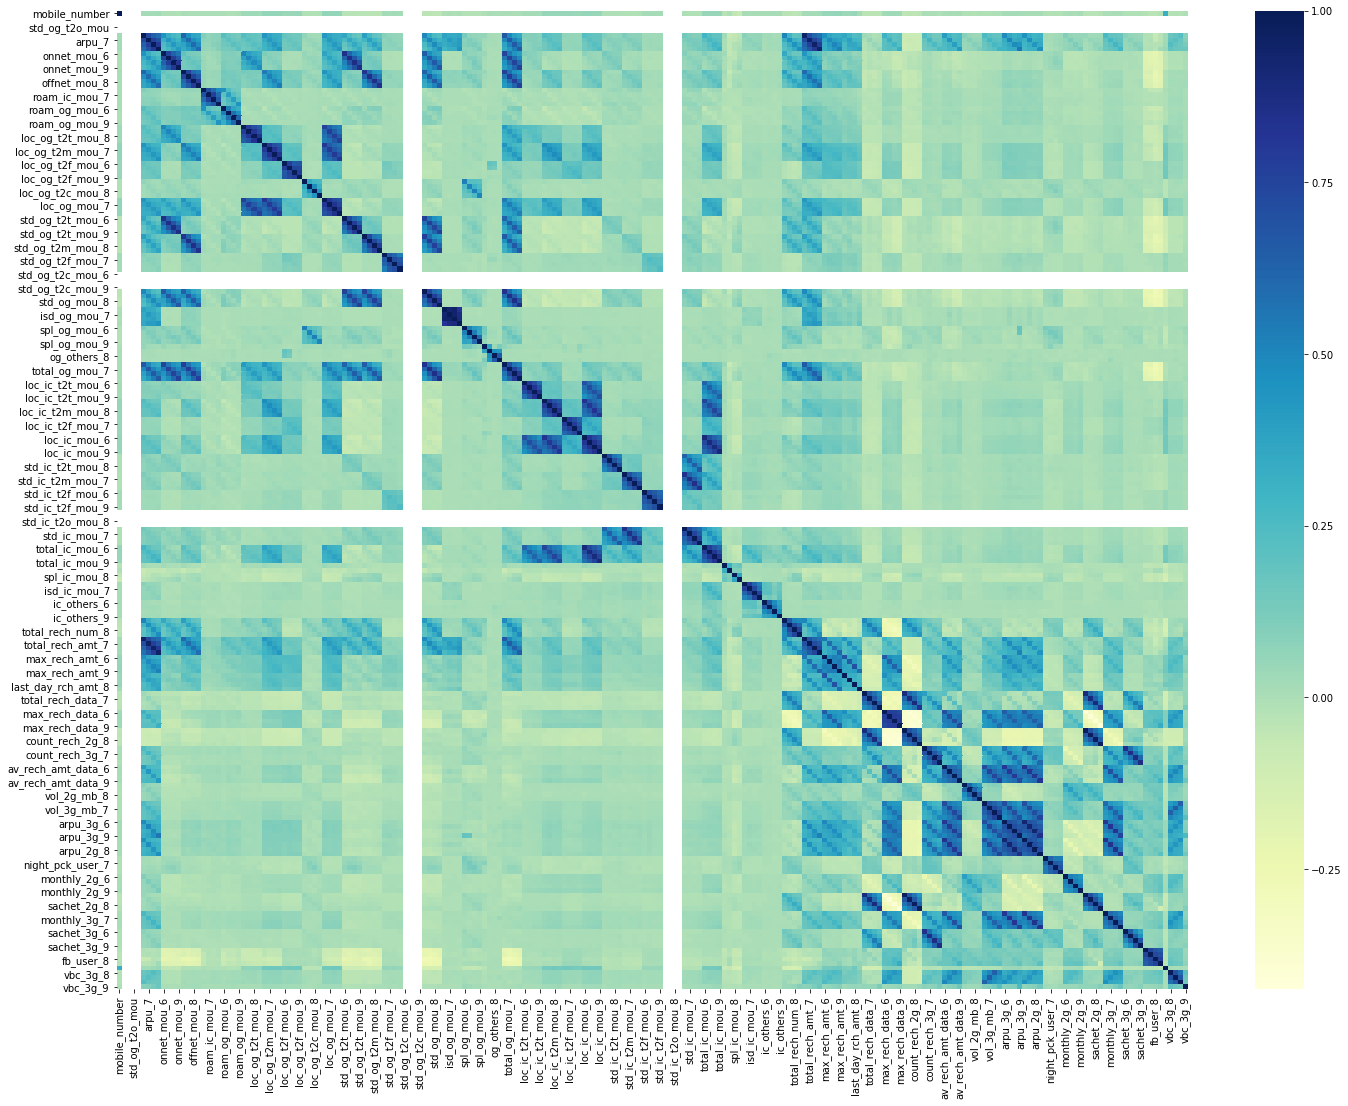

In [11]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=False)
plt.show()


In [12]:
# From the initial correlation, the picture is not clear yet and we will look into the same later.

## Missing Value analysis:

In [13]:
#Finding the null percentage of the data set for all columns:
#(Find the percentage of missing values for all the columns)

# creating a function to identify the missing data in dataset:

def missing_data(data):
    #total = data.isnull().sum().sort_values(ascending = False)
    percent = round((data.isnull().sum()/data.isnull().count()*100),2).sort_values(ascending = False)
    countmissing = data.isnull().sum().sort_values(ascending=False)
    return pd.concat([countmissing, percent], axis=1, keys=['Missing Value Count','Percent Missing'])


In [14]:
missing_data(tel_churn_main_df).head(170)

Missing Value Count  Percent Missing
count_rech_2g_6                         74846            74.85
date_of_last_rech_data_6                74846            74.85
count_rech_3g_6                         74846            74.85
av_rech_amt_data_6                      74846            74.85
max_rech_data_6                         74846            74.85
total_rech_data_6                       74846            74.85
arpu_3g_6                               74846            74.85
arpu_2g_6                               74846            74.85
night_pck_user_6                        74846            74.85
fb_user_6                               74846            74.85
arpu_3g_7                               74428            74.43
count_rech_2g_7                         74428            74.43
fb_user_7                               74428            74.43
count_rech_3g_7                         74428            74.43
arpu_2g_7                               74428            74.43
av_rech_amt_data_7                      74428            74.43
max_rech_data_7                         74428            74.43
night_pck_user_7                        74428            74.43
total_rech_data_7                       74428            74.43
date_of_last_rech_data_7                74428            74.43
night_pck_user_9                        74077            74.08
date_of_last_rech_data_9                74077            74.08
fb_user_9                               74077            74.08
arpu_2g_9                               74077            74.08
max_rech_data_9                         74077            74.08
arpu_3g_9                               74077            74.08
total_rech_data_9                       74077            74.08
av_rech_amt_data_9                      74077            74.08
count_rech_3g_9                         74077            74.08
count_rech_2g_9                         74077            74.08
fb_user_8                               73660            73.66
av_rech_amt_data_8                      73660            73.66
count_rech_3g_8                         73660            73.66
count_rech_2g_8                         73660            73.66
date_of_last_rech_data_8                73660            73.66
total_rech_data_8                       73660            73.66
max_rech_data_8                         73660            73.66
arpu_3g_8                               73660            73.66
arpu_2g_8                               73660            73.66
night_pck_user_8                        73660            73.66
std_ic_t2m_mou_9                         7745             7.75
spl_ic_mou_9                             7745             7.75
loc_ic_mou_9                             7745             7.75
isd_ic_mou_9                             7745             7.75
std_ic_t2o_mou_9                         7745             7.75
loc_ic_t2f_mou_9                         7745             7.75
ic_others_9                              7745             7.75
loc_og_t2f_mou_9                         7745             7.75
loc_ic_t2m_mou_9                         7745             7.75
loc_og_t2c_mou_9                         7745             7.75
loc_og_t2m_mou_9                         7745             7.75
loc_ic_t2t_mou_9                         7745             7.75
loc_og_t2t_mou_9                         7745             7.75
std_ic_mou_9                             7745             7.75
std_og_t2t_mou_9                         7745             7.75
roam_og_mou_9                            7745             7.75
std_ic_t2t_mou_9                         7745             7.75
std_ic_t2f_mou_9                         7745             7.75
loc_og_mou_9                             7745             7.75
offnet_mou_9                             7745             7.75
std_og_t2m_mou_9                         7745             7.75
std_og_t2f_mou_9                         7745             7.75
std_og_t2c_mou_9                         7745            

### So we have 166 columns out of 226 columns where values are missing.

Let's visualise the missing values in the data-set.



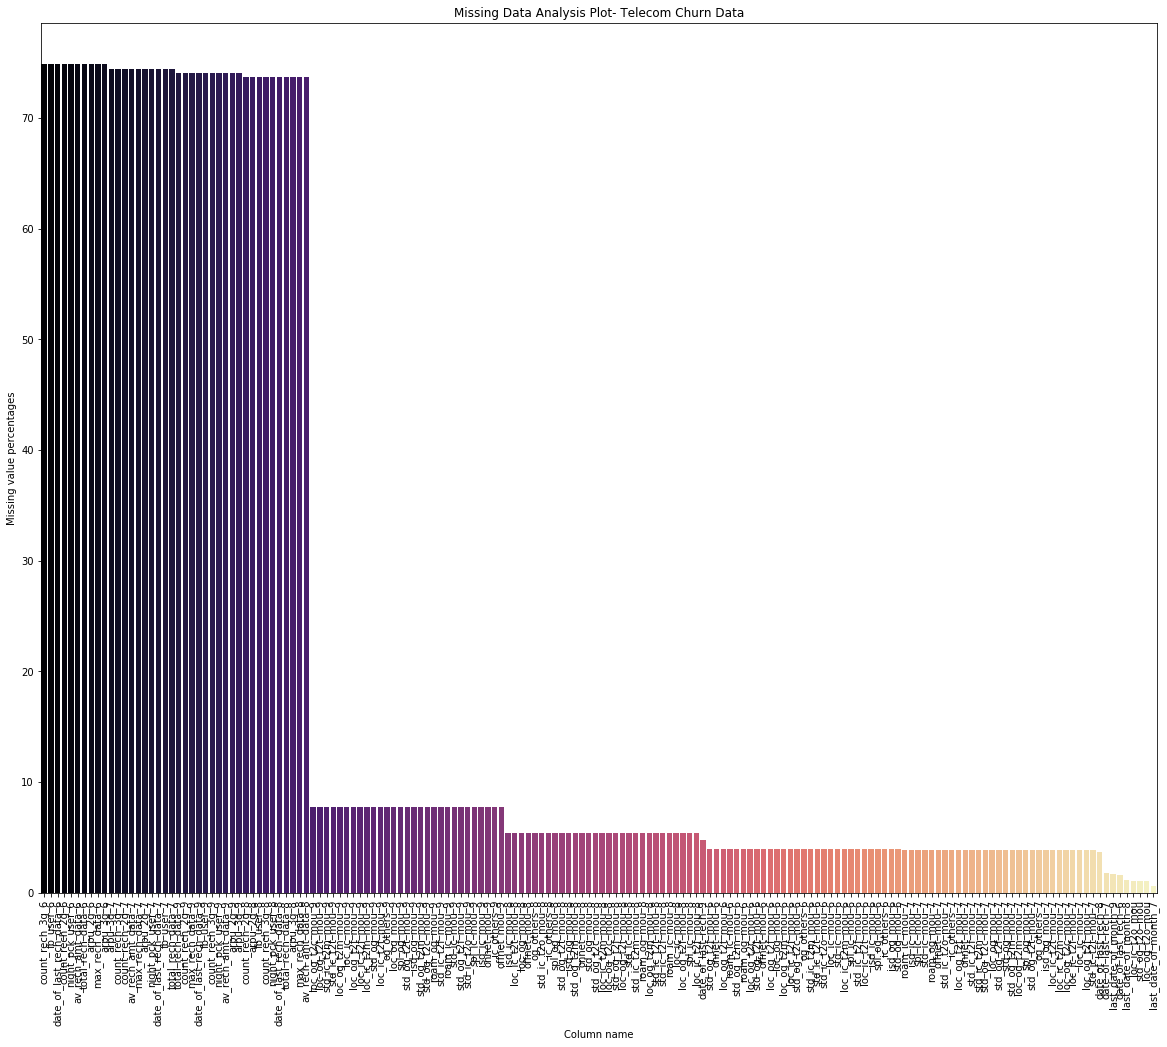

In [15]:
missing_data_df = (tel_churn_main_df.isnull().sum() / len(tel_churn_main_df)) * 100
missing_data_df = missing_data_df.drop(missing_data_df[missing_data_df == 0].index).sort_values(ascending=False)
#plt.title("Missing Values Visualisation")
plt.figure(figsize=(20, 16))
plt.xticks(rotation="90")
plt.title('Missing Data Analysis Plot- Telecom Churn Data')
plt.xlabel("Column name")
plt.ylabel("Missing value percentages")
sns.barplot(x=missing_data_df.index, y=missing_data_df, palette=("magma"))
plt.show()

In [16]:
# Converting the NULL,NA missing values etc. to numpy nan as we will use it for the data cleaning:
tel_churn_main_df = tel_churn_main_df.replace([' ','NULL','NA'],np.nan)


In [17]:
# Lets create functions to deal with null values :

# Looking at categorical values
def feature_exploration(column):
    return tel_churn_main_df[column].value_counts()

# Imputing the missing values
def feature_imputation(column, value):
    tel_churn_main_df.loc[tel_churn_main_df[column].isnull(),column] = value

## Churn definition
Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. In our analysis we are concentrating on high value customers, as approximately 80% of revenue comes from the top 20% customers. Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

Our dataset is divided into 3 phases:
Good phase wherein the customer is happy with the service
Action pase wherein the customer wasn't happy with service or got a better offer from competitor etc. In this phase, the customer usually shows different behaviour than the good phase. Also, it is crucial to identify high-churn-risk customers in this phase, so that some corrective actions can be taken at this point to prevet churn
Churn phase wherein the customer would have churned

High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
After identifying high value customers, we will tag churn customers based on those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase.

Let's first try to find and identify the high-value customers as its our primary goal to retain them.

In [18]:
# There are four fields that define the recharge amount for the high-value customers for initial 2 months, lets have a look at 
# them:

tel_churn_main_df[['total_rech_amt_6','total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7']].head()

total_rech_amt_6  total_rech_amt_7  av_rech_amt_data_6  av_rech_amt_data_7
0               362               252               252.0               252.0
1                74               384                 NaN               154.0
2               168               315                 NaN                 NaN
3               230               310                 NaN                 NaN
4               196               350                56.0                 NaN

In [19]:
# We can see that there are missing values for all these features. Here total_rech_amt should represent if the recharge was 
# done or not and av_rech_amt represent that if the recharge was done, what was the average amount of the recharge.
# Now, since both the fields have same missing percentage, we can impute them with 0 for missing values.

In [20]:
feature_imputation('total_rech_amt_6',0)
feature_imputation('total_rech_amt_7',0)
feature_imputation('av_rech_amt_data_6',0)
feature_imputation('av_rech_amt_data_7',0)

In [21]:
# Lets filter the high value customers from the original set who have recharged with an amount more than or equal to X, 
# where X is the 70th percentile of the average recharge amount in the first two months:

# In other words we want only our top 30 percentage high value customers:

high_val_cust=tel_churn_main_df[tel_churn_main_df[['total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1)>=
                                tel_churn_main_df[['total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1).quantile(0.7)]


high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30015 entries, 0 to 99998
Columns: 226 entries, mobile_number to vbc_3g_9
dtypes: float64(179), int64(35), object(12)
memory usage: 52.0+ MB


In [22]:
# So as per the above filter we have around 30 thousands, high value customers on which we should focus.

## Tag and Identify Churners:

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: 
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.



In [23]:
high_val_cust['churn']=high_val_cust[['vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9']].apply(lambda x: 1 if ((x['vol_3g_mb_9']==0)
                                    & (x['vol_2g_mb_9']==0.0) & (x['total_ic_mou_9']==0)  & (x['total_og_mou_9']==0)) else 0, axis=1)

In [24]:
print(high_val_cust['churn'].value_counts())

target_count = high_val_cust.churn.value_counts()
print('Percentage of the minority target variable (churn) is :', round(target_count[1] / len(high_val_cust) , 2)*100, '%')

0    27555
1     2460
Name: churn, dtype: int64
Percentage of the minority target variable (churn) is : 8.0 %


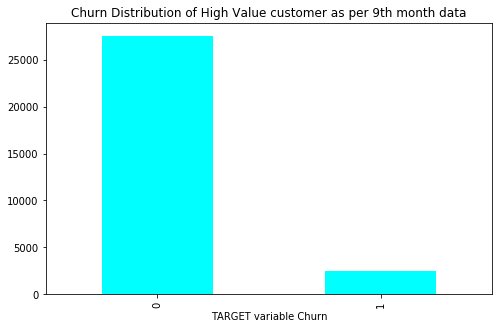

In [25]:
plt.figure(figsize=(8,5))

plt.title('Churn Distribution of High Value customer as per 9th month data')
plt.xlabel("TARGET variable Churn")
high_val_cust["churn"].value_counts().plot('bar',color='cyan')
plt.show()

In [26]:
print('The percentage without churn prediction is ', round(high_val_cust['churn'].value_counts()[0]/len(high_val_cust) * 100,2), '% of the dataset')
print('The percentage with churn prediction is ', round(high_val_cust['churn'].value_counts()[1]/len(high_val_cust) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(high_val_cust['churn'].value_counts()[1]/high_val_cust['churn'].value_counts()[0] * 100,2))

The percentage without churn prediction is  91.8 % of the dataset
The percentage with churn prediction is  8.2 % of the dataset
The ratio of imbalance is 8.93


### So we have 2460 high value customers who are likely to churn out of 30015 high value customers.

Target variable distribution shows that we are dealing with an imbalanced problem as there are many more non-churned as 
churned users. The model would achieve high accuracy as it would mostly predict majority class — users who didn’t churn in our example.
To overcome this we will use metrics for model evaluation such as precision and recall.

In [27]:
# And we know that the churn phase is last month September (_9).
# As per the instruction of the case study we can remove all columns which are of the 9th month i.e removing all the attributes
# corresponding to the churn phase.
high_val_cust = high_val_cust.drop(high_val_cust.filter(regex='_9|sep', axis = 1).columns, axis=1)

In [28]:
high_val_cust.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30015 entries, 0 to 99998
Data columns (total 172 columns):
mobile_number               30015 non-null int64
circle_id                   30015 non-null int64
loc_og_t2o_mou              29791 non-null float64
std_og_t2o_mou              29791 non-null float64
loc_ic_t2o_mou              29791 non-null float64
last_date_of_month_6        30015 non-null object
last_date_of_month_7        29987 non-null object
last_date_of_month_8        29860 non-null object
arpu_6                      30015 non-null float64
arpu_7                      30015 non-null float64
arpu_8                      30015 non-null float64
onnet_mou_6                 29519 non-null float64
onnet_mou_7                 29527 non-null float64
onnet_mou_8                 28926 non-null float64
offnet_mou_6                29519 non-null float64
offnet_mou_7                29527 non-null float64
offnet_mou_8                28926 non-null float64
roam_ic_mou_6               29

In [29]:
#Get number of unique mobile numbers, this is an id column:
len(high_val_cust['mobile_number'].unique())

30015

In [30]:
# So we have all unique customers who are our high-value customers.

In [31]:
high_val_cust.shape

(30015, 172)


So we have 172 columns and 30015 rows present in the dataframe currently.

In [32]:
#Get the string columns in the data frame
str_cols = high_val_cust.select_dtypes(['object'])

#Strip the leading and trailing whitespaces
high_val_cust[str_cols.columns] = str_cols.apply(lambda x: x.str.strip())

#Convert all the string columns to upper case
high_val_cust[str_cols.columns] = str_cols.apply(lambda x: x.str.upper())


In [33]:
# Let's re-check the missing-data:

missing_data(high_val_cust).head(125)

Missing Value Count  Percent Missing
count_rech_2g_8                         15546            51.79
max_rech_data_8                         15546            51.79
night_pck_user_8                        15546            51.79
arpu_3g_8                               15546            51.79
date_of_last_rech_data_8                15546            51.79
av_rech_amt_data_8                      15546            51.79
total_rech_data_8                       15546            51.79
count_rech_3g_8                         15546            51.79
fb_user_8                               15546            51.79
arpu_2g_8                               15546            51.79
max_rech_data_6                         15118            50.37
total_rech_data_6                       15118            50.37
count_rech_2g_6                         15118            50.37
arpu_3g_6                               15118            50.37
date_of_last_rech_data_6                15118            50.37
count_rech_3g_6                         15118            50.37
arpu_2g_6                               15118            50.37
night_pck_user_6                        15118            50.37
fb_user_6                               15118            50.37
max_rech_data_7                         14858            49.50
arpu_2g_7                               14858            49.50
total_rech_data_7                       14858            49.50
arpu_3g_7                               14858            49.50
count_rech_3g_7                         14858            49.50
night_pck_user_7                        14858            49.50
count_rech_2g_7                         14858            49.50
fb_user_7                               14858            49.50
date_of_last_rech_data_7                14858            49.50
loc_og_t2c_mou_8                         1089             3.63
loc_og_mou_8                             1089             3.63
isd_ic_mou_8                             1089             3.63
std_ic_mou_8                             1089             3.63
ic_others_8                              1089             3.63
std_ic_t2o_mou_8                         1089             3.63
std_og_t2m_mou_8                         1089             3.63
loc_og_t2f_mou_8                         1089             3.63
std_ic_t2m_mou_8                         1089             3.63
loc_og_t2m_mou_8                         1089             3.63
std_ic_t2t_mou_8                         1089             3.63
loc_ic_mou_8                             1089             3.63
loc_og_t2t_mou_8                         1089             3.63
std_ic_t2f_mou_8                         1089             3.63
loc_ic_t2f_mou_8                         1089             3.63
spl_ic_mou_8                             1089             3.63
std_og_t2t_mou_8                         1089             3.63
spl_og_mou_8                             1089             3.63
std_og_mou_8                             1089             3.63
roam_og_mou_8                            1089             3.63
og_others_8                              1089             3.63
onnet_mou_8                              1089             3.63
isd_og_mou_8                             1089             3.63
std_og_t2c_mou_8                         1089             3.63
offnet_mou_8                             1089             3.63
loc_ic_t2t_mou_8                         1089             3.63
roam_ic_mou_8                            1089             3.63
loc_ic_t2m_mou_8                         1089             3.63
std_og_t2f_mou_8                         1089             3.63
date_of_last_rech_8                       579             1.93
std_og_t2c_mou_6                          496             1.65
std_ic_mou_6                              496             1.65
std_og_mou_6                              496             1.65
std_og_t2t_mou_6                          496             1.65
isd_og_mou_6                              496            

In [34]:
# So currently we have 123 feature where data is missing.

#### Let us identify features with single or unique value, because they won't have the prediction power.



In [35]:
# Lets create new data frame from existing data to identify these insignificant features:
unique_features = pd.DataFrame(high_val_cust.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(unique_features[unique_features['nunique'] == 1])

print('%d features with a single unique value.\n' % len(unique_features[unique_features['nunique'] == 1]))

                 feature  nunique
1              circle_id        1
2         loc_og_t2o_mou        1
3         std_og_t2o_mou        1
4         loc_ic_t2o_mou        1
5   last_date_of_month_6        1
6   last_date_of_month_7        1
7   last_date_of_month_8        1
47      std_og_t2c_mou_6        1
48      std_og_t2c_mou_7        1
49      std_og_t2c_mou_8        1
86      std_ic_t2o_mou_6        1
87      std_ic_t2o_mou_7        1
88      std_ic_t2o_mou_8        1
13 features with a single unique value.



In [36]:
# Let's drop these insignifcant features:

high_val_cust = high_val_cust.drop(columns = list(unique_features[unique_features['nunique'] == 1]['feature']))

In [37]:
# Convert the date columns from incorrect existing string to date type:

dateColumns = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
high_val_cust[dateColumns]=high_val_cust[dateColumns].apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y', errors='coerce'))
high_val_cust[dateColumns].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0           2014-06-21          2014-07-16          2014-08-08   
7           2014-06-27          2014-07-25          2014-08-26   
8           2014-06-25          2014-07-31          2014-08-30   
16          2014-06-30          2014-07-31          2014-08-14   
21          2014-06-30          2014-07-31          2014-08-31   

   date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  
0                2014-06-21               2014-07-16               2014-08-08  
7                       NaT                      NaT                      NaT  
8                       NaT               2014-07-31               2014-08-23  
16                      NaT                      NaT                      NaT  
21                      NaT                      NaT                      NaT

In [38]:
# MOBILE_NUMBER : Customer phone number

# It does not influence our predicted outcome, we drop the column with the pandas
high_val_cust.drop('mobile_number',axis=1,inplace=True)

In [39]:
# night_pack_user and fb_user are categorical variables where 1 indicates usage of the service and null indicates no usage. 
# Lets impute the missing values with -1 and convert the types to category.

#Impute the missing values and convert the features to category
high_val_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]]=high_val_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']].applymap(lambda x: -1 if pd.isnull(x) else 1)
high_val_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]] = high_val_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']].apply(lambda x: x.astype('category'))


In [40]:
high_val_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]].head()

night_pck_user_6 night_pck_user_7 night_pck_user_8 fb_user_6 fb_user_7  \
0                 1                1                1         1         1   
7                -1               -1               -1        -1        -1   
8                -1                1                1        -1         1   
16               -1               -1               -1        -1        -1   
21               -1               -1               -1        -1        -1   

   fb_user_8  
0          1  
7         -1  
8          1  
16        -1  
21        -1

In [41]:
# arpu_3g_8 : Average revenue per user for 8th month is having most of the missing data (51.79 %):

high_val_cust['arpu_3g_8'].describe()

count    14469.000000
mean       128.556843
std        227.488228
min        -24.490000
25%          0.000000
50%         16.970000
75%        212.170000
max       3716.900000
Name: arpu_3g_8, dtype: float64

We observe that range of values for this field varies a lot . Lets check the relation with numerical fields of 8th
month to see if any insight is available for imputation.

In [42]:
high_val_cust[high_val_cust['arpu_3g_8'].isna()][['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8', 
                            'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8',
                            'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
                            'fb_user_8'
                           ]].nunique()

date_of_last_rech_data_8    0
total_rech_data_8           0
max_rech_data_8             0
count_rech_2g_8             0
count_rech_3g_8             0
av_rech_amt_data_8          0
vol_2g_mb_8                 1
vol_3g_mb_8                 1
arpu_2g_8                   0
night_pck_user_8            1
monthly_2g_8                1
sachet_2g_8                 1
monthly_3g_8                1
sachet_3g_8                 1
fb_user_8                   1
dtype: int64

In [43]:
high_val_cust[high_val_cust['arpu_3g_8'].isna()][['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8', 
                            'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8',
                            'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
                            'fb_user_8'
                           ]].head()

date_of_last_rech_data_8  total_rech_data_8  max_rech_data_8  \
7                       NaT                NaN              NaN   
16                      NaT                NaN              NaN   
21                      NaT                NaN              NaN   
38                      NaT                NaN              NaN   
41                      NaT                NaN              NaN   

    count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  vol_2g_mb_8  \
7               NaN              NaN                 NaN          0.0   
16              NaN              NaN                 NaN          0.0   
21              NaN              NaN                 NaN          0.0   
38              NaN              NaN                 NaN          0.0   
41              NaN              NaN                 NaN          0.0   

    vol_3g_mb_8  arpu_2g_8 night_pck_user_8  monthly_2g_8  sachet_2g_8  \
7           0.0        NaN               -1             0            0   
16          0.0        NaN               -1             0            0   
21          0.0        NaN               -1             0            0   
38          0.0        NaN               -1             0            0   
41          0.0        NaN               -1             0            0   

    monthly_3g_8  sachet_3g_8 fb_user_8  
7              0            0        -1  
16             0            0        -1  
21             0            0        -1  
38             0            0        -1  
41             0            0        -1

####  We can infer that the customers hasn't bought the data at all in the 8th month , hence we can impute it with 0.

In [44]:
high_val_cust['arpu_3g_8'].fillna(0,inplace=True)

In [45]:
# Now let's pickup one of the outgoing call feature after data say "isd_og_mou_8":

high_val_cust['isd_og_mou_8'].describe()

count    28926.000000
mean         2.064721
std         45.597996
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5681.540000
Name: isd_og_mou_8, dtype: float64

In [46]:
# The numerical distribution suggests presence of some outliers, which will be handled later with other features outliers.
# Let's check the all outgoing related features of the action month (8th)


In [47]:
high_val_cust[high_val_cust['isd_og_mou_8'].isna()][['loc_og_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8']].nunique()

loc_og_mou_8      0
std_og_mou_8      0
spl_og_mou_8      0
og_others_8       0
total_og_mou_8    1
dtype: int64

In [48]:
high_val_cust[high_val_cust['isd_og_mou_8'].isna()][['loc_og_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8']].head()

loc_og_mou_8  std_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8
111           NaN           NaN           NaN          NaN             0.0
188           NaN           NaN           NaN          NaN             0.0
358           NaN           NaN           NaN          NaN             0.0
527           NaN           NaN           NaN          NaN             0.0
539           NaN           NaN           NaN          NaN             0.0

In [49]:
# From the above we can impute the missing values of isd_og_mou_8 with 0 and we can conclude that there was no outgoing used 
# for these customers as total outgoing is 0 when any all of the outgoing features are missing.

# Hence, missing values implies that data is not missing due to coincidence but pattern suggests there was no outgoing call 
# made for these customers. 

Since none of the rows exist where all the data and call columns are having null values. So the null values are independent of data and calls and support our earlier assumption that the null values indicate no usage of service rather than having missing values and so can be imputed by zeros

In [50]:
#Exclude the date and category columns from the dataset and impute with 0
high_val_cust[high_val_cust.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = high_val_cust[high_val_cust.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [51]:
# Let's re-check the data-types:

high_val_cust.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30015 entries, 0 to 99998
Data columns (total 158 columns):
arpu_6                      30015 non-null float64
arpu_7                      30015 non-null float64
arpu_8                      30015 non-null float64
onnet_mou_6                 30015 non-null float64
onnet_mou_7                 30015 non-null float64
onnet_mou_8                 30015 non-null float64
offnet_mou_6                30015 non-null float64
offnet_mou_7                30015 non-null float64
offnet_mou_8                30015 non-null float64
roam_ic_mou_6               30015 non-null float64
roam_ic_mou_7               30015 non-null float64
roam_ic_mou_8               30015 non-null float64
roam_og_mou_6               30015 non-null float64
roam_og_mou_7               30015 non-null float64
roam_og_mou_8               30015 non-null float64
loc_og_t2t_mou_6            30015 non-null float64
loc_og_t2t_mou_7            30015 non-null float64
loc_og_t2t_mou_8       

In [52]:
# Let's re-check the missing data :
missing_data(high_val_cust).head(10)

Missing Value Count  Percent Missing
date_of_last_rech_data_8                15546            51.79
date_of_last_rech_data_6                15118            50.37
date_of_last_rech_data_7                14858            49.50
date_of_last_rech_8                       579             1.93
date_of_last_rech_7                        97             0.32
date_of_last_rech_6                        61             0.20
total_og_mou_7                              0             0.00
total_og_mou_6                              0             0.00
og_others_8                                 0             0.00
og_others_7                                 0             0.00

In [53]:
# So we have currently missing data only for the datetime data-types data ( 6 variables ) !!

## Feature Engineering :

Creating derived feature from the data-set for our model

In [54]:
# If the recharge date is missing for the month, we can safely impute the recharge amount for the month as well with 0 value.
# Creating new columns for all 3 months for data and non-data:

#Transform the existing date of last recharge columns with 1 indicating a recharge and 0 indicating no recharge
dateColumnsToTransform = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

high_val_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8' ]] = high_val_cust[dateColumnsToTransform].applymap(lambda x: -1 if pd.isnull(x) else 1)

In [55]:
#Convert the features to category
high_val_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8' ]] = high_val_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8']].apply(lambda x: x.astype('category'))

In [56]:
# Now lets have a glance at new columns that we have created:
high_val_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8' ]].head()

rech_amt_6 rech_amt_7 rech_amt_8 rech_data_6 rech_data_7 rech_data_8
0           1          1          1           1           1           1
7           1          1          1          -1          -1          -1
8           1          1          1          -1           1           1
16          1          1          1          -1          -1          -1
21          1          1          1          -1          -1          -1

In [57]:
#Lets check if any of the rows having all data or call columns with null values 
high_val_cust.drop(['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8'], axis=1).isna().all()

arpu_6                      False
arpu_7                      False
arpu_8                      False
onnet_mou_6                 False
onnet_mou_7                 False
onnet_mou_8                 False
offnet_mou_6                False
offnet_mou_7                False
offnet_mou_8                False
roam_ic_mou_6               False
roam_ic_mou_7               False
roam_ic_mou_8               False
roam_og_mou_6               False
roam_og_mou_7               False
roam_og_mou_8               False
loc_og_t2t_mou_6            False
loc_og_t2t_mou_7            False
loc_og_t2t_mou_8            False
loc_og_t2m_mou_6            False
loc_og_t2m_mou_7            False
loc_og_t2m_mou_8            False
loc_og_t2f_mou_6            False
loc_og_t2f_mou_7            False
loc_og_t2f_mou_8            False
loc_og_t2c_mou_6            False
loc_og_t2c_mou_7            False
loc_og_t2c_mou_8            False
loc_og_mou_6                False
loc_og_mou_7                False
loc_og_mou_8  

In [58]:
# arpu: Average revenue per user
# average revenue per user in a single column and split by average vs first two, three months average :

high_val_cust['arpu_2mths'] = (high_val_cust['arpu_6']+high_val_cust['arpu_7'])/2
high_val_cust['arpu_3mths'] = (high_val_cust['arpu_6']+high_val_cust['arpu_7']+high_val_cust['arpu_8'])/3

In [59]:
# AON : Age on network - number of days the customer is using the operator T network
# Conversion into the number of years:

high_val_cust['aon_years']=high_val_cust['aon']/365
high_val_cust['aon_years'] = high_val_cust['aon_years'].astype(int)

In [60]:
# let's create new features from the datetime columns to identify any pattern related to recharge day, week etc

In [61]:
# Now let's create new features from date column
high_val_cust['date_of_last_rech_day_6'] = high_val_cust['date_of_last_rech_6'].dt.day
high_val_cust['date_of_last_rech_dayofwk_6'] = high_val_cust['date_of_last_rech_6'].dt.dayofweek.astype(str)

high_val_cust['date_of_last_rech_day_7'] = high_val_cust['date_of_last_rech_7'].dt.day
high_val_cust['date_of_last_rech_dayofwk_7'] = high_val_cust['date_of_last_rech_7'].dt.dayofweek.astype(str)

high_val_cust['date_of_last_rech_day_8'] = high_val_cust['date_of_last_rech_8'].dt.day
high_val_cust['date_of_last_rech_dayofwk_8'] = high_val_cust['date_of_last_rech_8'].dt.dayofweek.astype(str)

high_val_cust['date_of_last_rech_data_day_6'] = high_val_cust['date_of_last_rech_data_6'].dt.day
high_val_cust['date_of_last_rech_data_dayofwk_6'] = high_val_cust['date_of_last_rech_data_6'].dt.dayofweek.astype(str)

high_val_cust['date_of_last_rech_data_day_7'] = high_val_cust['date_of_last_rech_data_7'].dt.day
high_val_cust['date_of_last_rech_data_dayofwk_7'] = high_val_cust['date_of_last_rech_data_7'].dt.dayofweek.astype(str)

high_val_cust['date_of_last_rech_data_day_8'] = high_val_cust['date_of_last_rech_data_8'].dt.day
high_val_cust['date_of_last_rech_data_dayofwk_8'] = high_val_cust['date_of_last_rech_data_8'].dt.dayofweek.astype(str)

Let's re-check the correlation between the variables.

In [62]:
pd.options.display.float_format = '{:.2f}'.format
high_val_cust.describe()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
count 30015.00 30015.00 30015.00     30015.00     30015.00     30015.00   
mean    576.41   578.37   524.58       276.33       284.34       248.65   
std     448.98   469.00   496.02       460.85       482.73       462.62   
min   -2258.71 -2014.05  -945.81         0.00         0.00         0.00   
25%     345.43   346.73   266.12        26.38        25.46        16.88   
50%     490.37   488.37   442.86       102.61       100.48        79.61   
75%     702.04   699.96   666.15       319.62       322.93       265.56   
max   27731.09 35145.83 33543.62      7376.71      8157.78     10752.56   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count      30015.00      30015.00      30015.00       30015.00       30015.00   
mean         393.47        398.48        352.51          16.74          13.04   
std          478.55        494.64        480.40          77.95          75.81   
min            0.00          0.00          0.00           0.00           0.00   
25%           98.40         96.13         66.81           0.00           0.00   
50%          250.89        247.34        209.34           0.00           0.00   
75%          507.06        512.30        459.59           0.00           0.00   
max         8362.36       9667.13      14007.34        2613.31        3813.29   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count       30015.00       30015.00       30015.00       30015.00   
mean           12.91          27.81          20.98          20.59   
std            74.46         117.34          96.97         105.20   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max          4169.81        3775.11        2812.04        5337.04   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count          30015.00          30015.00          30015.00          30015.00   
mean              89.26             90.34             82.16            171.49   
std              233.12            245.89            231.53            250.48   
min                0.00              0.00              0.00              0.00   
25%                6.13              6.61              3.94             24.46   
50%               28.34             28.46             24.48             87.34   
75%               84.23             84.78             77.64            222.72   
max             6431.33           7400.66          10752.56           4729.74   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count          30015.00          30015.00          30015.00          30015.00   
mean             171.16            158.90              6.72              6.81   
std              241.36            234.32             22.41             22.32   
min                0.00              0.00              0.00              0.00   
25%               26.84             17.66              0.00              0.00   
50%               89.59             77.84              0.26              0.33   
75%              221.62            209.32              4.83              4.93   
max             4557.14           4961.33           1466.03           1196.43   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
count          30015.00          30015.00          30015.00          30015.00   
mean               6.23              1.54              1.85              1.70   
std               19.90              6.22              9.09              7.22   
min                0.00              0.00              0.00              0.00   
25%                0.00              0.00              0.00              0.00   
50%                0.03           

In [63]:
# Let's find the higher correlation features (>0.5 and <-0.5):

joincorr= high_val_cust.corr()
df_corr_high_val = joincorr.stack().reset_index().sort_values(by = 0, ascending = False)
high_corr = df_corr_high_val[((df_corr_high_val[0] < 1) & (df_corr_high_val[0] >= 0.5)) | ((df_corr_high_val[0] <= -0.5) & (df_corr_high_val[0] > -1))]
high_corr

level_0             level_1    0
23081           aon_years                 aon 0.99
22003                 aon           aon_years 0.99
17184     count_rech_2g_8         sachet_2g_8 0.98
20880         sachet_2g_8     count_rech_2g_8 0.98
20724         sachet_2g_7     count_rech_2g_7 0.98
17028     count_rech_2g_7         sachet_2g_7 0.98
16872     count_rech_2g_6         sachet_2g_6 0.98
20568         sachet_2g_6     count_rech_2g_6 0.98
22777          arpu_2mths          arpu_3mths 0.96
22931          arpu_3mths          arpu_2mths 0.96
405                arpu_8    total_rech_amt_8 0.95
14727    total_rech_amt_8              arpu_8 0.95
93                 arpu_6    total_rech_amt_6 0.94
14415    total_rech_amt_6              arpu_6 0.94
6863         isd_og_mou_8        isd_og_mou_7 0.94
6709         isd_og_mou_7        isd_og_mou_8 0.94
249                arpu_7    total_rech_amt_7 0.94
14571    total_rech_amt_7              arpu_7 0.94
19653           arpu_2g_6           arpu_3g_6 0.94
19191           arpu_3g_6           arpu_2g_6 0.94
19965           arpu_2g_8           arpu_3g_8 0.94
19503           arpu_3g_8           arpu_2g_8 0.94
19809           arpu_2g_7           arpu_3g_7 0.94
19347           arpu_3g_7           arpu_2g_7 0.94
6862         isd_og_mou_8        isd_og_mou_6 0.92
6554         isd_og_mou_6        isd_og_mou_8 0.92
6553         isd_og_mou_6        isd_og_mou_7 0.92
6707         isd_og_mou_7        isd_og_mou_6 0.92
22631          arpu_2mths              arpu_7 0.91
301                arpu_7          arpu_2mths 0.91
22786          arpu_3mths              arpu_7 0.91
302                arpu_7          arpu_3mths 0.91
146                arpu_6          arpu_2mths 0.90
22630          arpu_2mths              arpu_6 0.90
15918   total_rech_data_6     count_rech_2g_6 0.90
16842     count_rech_2g_6   total_rech_data_6 0.90
16074   total_rech_data_7     count_rech_2g_7 0.90
16998     count_rech_2g_7   total_rech_data_7 0.90
16230   total_rech_data_8     count_rech_2g_8 0.90
17154     count_rech_2g_8   total_rech_data_8 0.90
12153      total_ic_mou_6        loc_ic_mou_6 0.89
9843         loc_ic_mou_6      total_ic_mou_6 0.89
12465      total_ic_mou_8        loc_ic_mou_8 0.89
10155        loc_ic_mou_8      total_ic_mou_8 0.89
457                arpu_8          arpu_3mths 0.89
22787          arpu_3mths              arpu_8 0.89
16098   total_rech_data_7         sachet_2g_7 0.89
20718         sachet_2g_7   total_rech_data_7 0.89
16254   total_rech_data_8         sachet_2g_8 0.89
20874         sachet_2g_8   total_rech_data_8 0.89
20562         sachet_2g_6   total_rech_data_6 0.89
15942   total_rech_data_6         sachet_2g_6 0.89
9999         loc_ic_mou_7      total_ic_mou_7 0.88
12309      total_ic_mou_7        loc_ic_mou_7 0.88
22723          arpu_2mths    total_rech_amt_6 0.88
14561    total_rech_amt_6          arpu_2mths 0.88
14717    total_rech_amt_7          arpu_3mths 0.88
22879          arpu_3mths    total_rech_amt_7 0.88
22880          arpu_3mths    total_rech_amt_8 0.87
14872    total_rech_amt_8          arpu_3mths 0.87
14716    total_rech_amt_7          arpu_2mths 0.87
22724          arpu_2mths    total_rech_amt_7 0.87
21813         sachet_3g_8     count_rech_3g_8 0.86
17655     count_rech_3g_8         sachet_3g_8 0.86
19644           arpu_2g_6  av_rech_amt_data_6 0.86
17796  av_rech_amt_data_6           arpu_2g_6 0.86
4965     std_og_t2t_mou_8         onnet_mou_8 0.86
807           onnet_mou_8    std_og_t2t_mou_8 0.86
19977           arpu_2g_8        monthly_3g_8 0.86
21363        monthly_3g_8           arpu_2g_8 0.86
4809     std_og_t2t_mou_7         onnet_mou_7 0.86
651           onnet_mou_7    std_og_t2t_mou_7 0.86
495           onnet_mou_6    std_og_t2t_mou_6 0.86
4653     std_og_t2t_mou_6         onnet_mou_6 0.86
1119         offnet_mou_7    std_og_t2m_mou_7 0.85
5277     std_og_t2m_mou_7        offnet_mou_7 0.85
21207        monthly_3g_7           arpu_2g_7 0.85
19821           arpu_2g_7        monthly

From the above we can notice high correlation between same features and only month differs.
Let's create new features from good month (6,7 month) and compare them with action phase.

In [64]:
high_val_cust['AVG_arpu_6_7'] = high_val_cust[['arpu_6','arpu_7']].mean(axis=1)

high_val_cust['total_ic_mou_8diff7'] = high_val_cust['total_ic_mou_8'] - high_val_cust['total_ic_mou_7']

high_val_cust['loc_ic_mou_8diff7'] = high_val_cust['loc_ic_mou_8'] - high_val_cust['loc_ic_mou_7']

high_val_cust['std_og_mou_8diff7'] = high_val_cust['std_og_mou_8'] - high_val_cust['std_og_mou_7']

high_val_cust['loc_ic_t2t_mou_8diff7'] = high_val_cust['loc_ic_t2t_mou_8'] - high_val_cust['loc_ic_t2t_mou_7']
high_val_cust['loc_ic_t2m_mou_8diff7'] = high_val_cust['loc_ic_t2m_mou_8'] - high_val_cust['loc_ic_t2m_mou_7']
high_val_cust['loc_ic_t2f_mou_8diff7'] = high_val_cust['loc_ic_t2f_mou_8'] - high_val_cust['loc_ic_t2f_mou_7']

high_val_cust['roam_og_mou_7diff6'] = high_val_cust['roam_og_mou_7'] - high_val_cust['roam_og_mou_6']
high_val_cust['roam_og_mou_8diff7'] = high_val_cust['roam_og_mou_8'] - high_val_cust['roam_og_mou_7']

high_val_cust['total_rech_amt_7diff6'] = high_val_cust['total_rech_amt_7'] - high_val_cust['total_rech_amt_6']
high_val_cust['total_rech_amt_8diff7'] = high_val_cust['total_rech_amt_8'] - high_val_cust['total_rech_amt_7']

high_val_cust['date_of_last_rech_7diff6'] = (high_val_cust['date_of_last_rech_7'] - high_val_cust['date_of_last_rech_6']).dt.days
high_val_cust['date_of_last_rech_8diff7'] = (high_val_cust['date_of_last_rech_8'] - high_val_cust['date_of_last_rech_7']).dt.days

In [65]:
# Let's drop date related features as we have already created derived features out of it:

In [66]:
high_val_cust.drop(list(high_val_cust.select_dtypes(include=['datetime64']).columns),axis=1,inplace=True)

In [67]:
# let's drop the features which are highly correlated 

corr_matrix = high_val_cust.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [68]:
high_val_cust.drop(columns=to_drop, axis=1,inplace=True)

In [69]:
high_val_cust.shape

(30015, 171)

In [70]:
list(high_val_cust.select_dtypes(include=[object]).columns)

['date_of_last_rech_dayofwk_6',
 'date_of_last_rech_dayofwk_7',
 'date_of_last_rech_dayofwk_8',
 'date_of_last_rech_data_dayofwk_6',
 'date_of_last_rech_data_dayofwk_7',
 'date_of_last_rech_data_dayofwk_8']

In [71]:
# Ponder over this ?

# high_val_cust.drop(columns = list(high_val_cust.select_dtypes(include=['category']).columns), axis =1, inplace = True)
# high_val_cust.drop(columns = list(high_val_cust.select_dtypes(include=[object]).columns), axis = 1, inplace = True)

In [72]:
# Let's re-check the missing data :
missing_data(high_val_cust).head(10)

Missing Value Count  Percent Missing
date_of_last_rech_data_day_8                15546            51.79
date_of_last_rech_data_day_6                15118            50.37
date_of_last_rech_data_day_7                14858            49.50
date_of_last_rech_8diff7                      621             2.07
date_of_last_rech_day_8                       579             1.93
date_of_last_rech_7diff6                      158             0.53
date_of_last_rech_day_7                        97             0.32
date_of_last_rech_day_6                        61             0.20
std_ic_mou_7                                    0             0.00
total_og_mou_8                                  0             0.00

In [73]:
# Let's re-check the data-types:
high_val_cust.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30015 entries, 0 to 99998
Data columns (total 171 columns):
arpu_6                              30015 non-null float64
arpu_7                              30015 non-null float64
arpu_8                              30015 non-null float64
onnet_mou_6                         30015 non-null float64
onnet_mou_7                         30015 non-null float64
onnet_mou_8                         30015 non-null float64
offnet_mou_6                        30015 non-null float64
offnet_mou_7                        30015 non-null float64
offnet_mou_8                        30015 non-null float64
roam_ic_mou_6                       30015 non-null float64
roam_ic_mou_7                       30015 non-null float64
roam_ic_mou_8                       30015 non-null float64
roam_og_mou_6                       30015 non-null float64
roam_og_mou_7                       30015 non-null float64
roam_og_mou_8                       30015 non-null float64
loc_o

In [74]:
high_val_cust['date_of_last_rech_day_8'].describe()

count   29436.00
mean       26.69
std         5.27
min         1.00
25%        25.00
50%        28.00
75%        30.00
max        31.00
Name: date_of_last_rech_day_8, dtype: float64

In [75]:
high_val_cust['date_of_last_rech_8diff7'].describe()

count   29394.00
mean       30.31
std         5.77
min         1.00
25%        28.00
50%        31.00
75%        33.00
max        61.00
Name: date_of_last_rech_8diff7, dtype: float64

In [76]:
high_val_cust['date_of_last_rech_data_day_8'].describe()

count   14469.00
mean       19.96
std         8.69
min         1.00
25%        13.00
50%        22.00
75%        28.00
max        31.00
Name: date_of_last_rech_data_day_8, dtype: float64

In [77]:
columns_to_impute_mean = ['date_of_last_rech_day_6','date_of_last_rech_day_7','date_of_last_rech_day_8',
                          'date_of_last_rech_8diff7','date_of_last_rech_7diff6','date_of_last_rech_data_day_8','date_of_last_rech_data_day_7','date_of_last_rech_data_day_6']

In [78]:
#Impute the null values with mean for all the above columns

high_val_cust[columns_to_impute_mean] = high_val_cust[columns_to_impute_mean].fillna(value=high_val_cust[columns_to_impute_mean].mean())

In [79]:
high_val_cust[columns_to_impute_mean] = high_val_cust[columns_to_impute_mean].round(3)

In [80]:
high_val_cust.isna().all()

arpu_6                              False
arpu_7                              False
arpu_8                              False
onnet_mou_6                         False
onnet_mou_7                         False
onnet_mou_8                         False
offnet_mou_6                        False
offnet_mou_7                        False
offnet_mou_8                        False
roam_ic_mou_6                       False
roam_ic_mou_7                       False
roam_ic_mou_8                       False
roam_og_mou_6                       False
roam_og_mou_7                       False
roam_og_mou_8                       False
loc_og_t2t_mou_6                    False
loc_og_t2t_mou_7                    False
loc_og_t2t_mou_8                    False
loc_og_t2m_mou_6                    False
loc_og_t2m_mou_7                    False
loc_og_t2m_mou_8                    False
loc_og_t2f_mou_6                    False
loc_og_t2f_mou_7                    False
loc_og_t2f_mou_8                  

In [81]:
# So we have dealt with the missing value treatment in the dataset now.

## Exploratory Data Analysis :

### Outlier Analyis, Detection and Treatment:

Lets find if there are any obvious outliers in our data-set

In [82]:
# Traditional descriptive statistics of the columns:
high_val_cust.describe()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
count 30015.00 30015.00 30015.00     30015.00     30015.00     30015.00   
mean    576.41   578.37   524.58       276.33       284.34       248.65   
std     448.98   469.00   496.02       460.85       482.73       462.62   
min   -2258.71 -2014.05  -945.81         0.00         0.00         0.00   
25%     345.43   346.73   266.12        26.38        25.46        16.88   
50%     490.37   488.37   442.86       102.61       100.48        79.61   
75%     702.04   699.96   666.15       319.62       322.93       265.56   
max   27731.09 35145.83 33543.62      7376.71      8157.78     10752.56   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count      30015.00      30015.00      30015.00       30015.00       30015.00   
mean         393.47        398.48        352.51          16.74          13.04   
std          478.55        494.64        480.40          77.95          75.81   
min            0.00          0.00          0.00           0.00           0.00   
25%           98.40         96.13         66.81           0.00           0.00   
50%          250.89        247.34        209.34           0.00           0.00   
75%          507.06        512.30        459.59           0.00           0.00   
max         8362.36       9667.13      14007.34        2613.31        3813.29   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count       30015.00       30015.00       30015.00       30015.00   
mean           12.91          27.81          20.98          20.59   
std            74.46         117.34          96.97         105.20   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max          4169.81        3775.11        2812.04        5337.04   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count          30015.00          30015.00          30015.00          30015.00   
mean              89.26             90.34             82.16            171.49   
std              233.12            245.89            231.53            250.48   
min                0.00              0.00              0.00              0.00   
25%                6.13              6.61              3.94             24.46   
50%               28.34             28.46             24.48             87.34   
75%               84.23             84.78             77.64            222.72   
max             6431.33           7400.66          10752.56           4729.74   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count          30015.00          30015.00          30015.00          30015.00   
mean             171.16            158.90              6.72              6.81   
std              241.36            234.32             22.41             22.32   
min                0.00              0.00              0.00              0.00   
25%               26.84             17.66              0.00              0.00   
50%               89.59             77.84              0.26              0.33   
75%              221.62            209.32              4.83              4.93   
max             4557.14           4961.33           1466.03           1196.43   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
count          30015.00          30015.00          30015.00          30015.00   
mean               6.23              1.54              1.85              1.70   
std               19.90              6.22              9.09              7.22   
min                0.00              0.00              0.00              0.00   
25%                0.00              0.00              0.00              0.00   
50%                0.03           

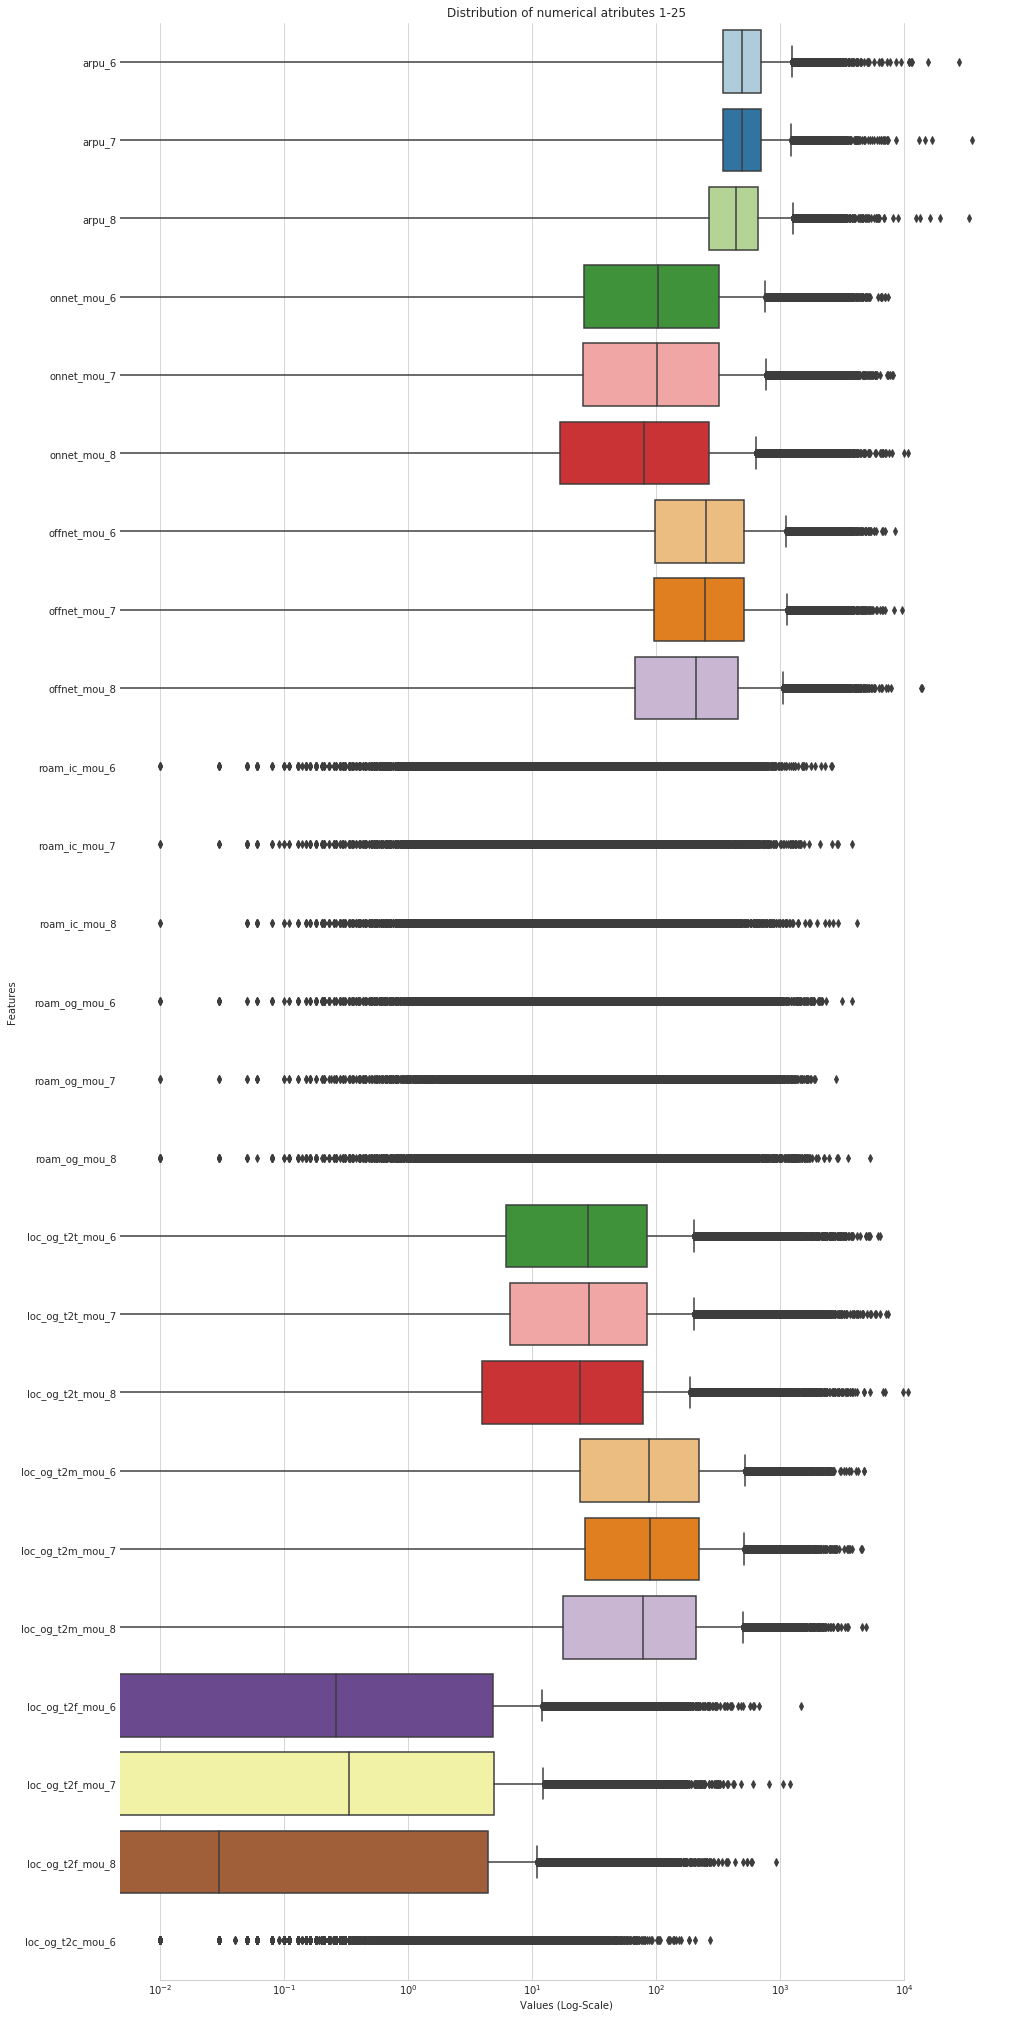

In [83]:
# Another look at the distribution of numerical attribute:

# Creating a list of dataframe columns which are numeric:
num_features = high_val_cust.select_dtypes(include=[np.number]).columns.tolist()

# Excluding the target numerical variable :
li_not_plot = ['churn']
li_plot_num_feats = [c for c in list(num_features) if c not in li_not_plot]


# Boxplot for the numerical features against the target churn variable:

# Since we have more than 150 numerical features, lets take 30 at a time 

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(16,36))
# Using log scale:
ax.set_xscale("log")
ax = sns.boxplot(data=high_val_cust[li_plot_num_feats[:25]] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values (Log-Scale)")
ax.set(title="Distribution of numerical atributes 1-25")
sns.despine(trim=True,left=True)

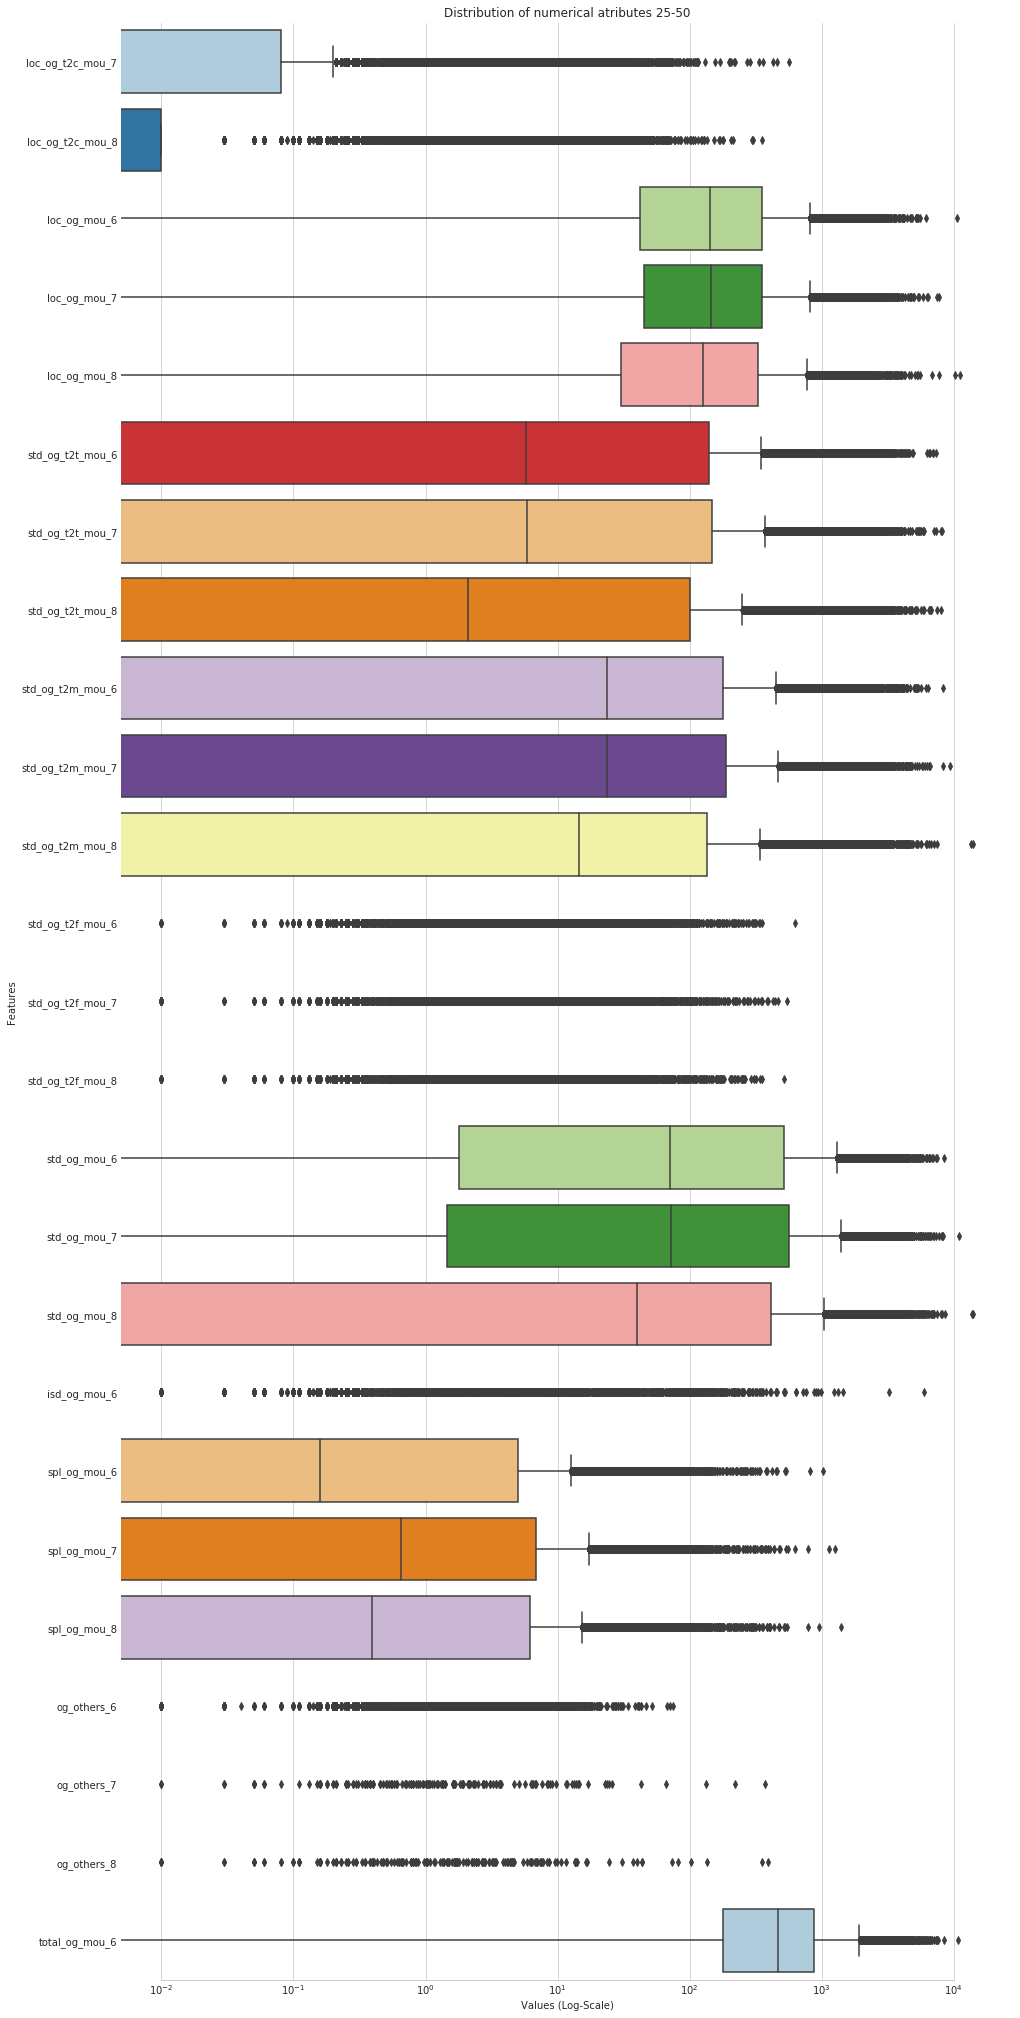

In [84]:
# Boxplot with 25 features at a time:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(16,36))
# Using log scale:
ax.set_xscale("log")
ax = sns.boxplot(data=high_val_cust[li_plot_num_feats[25:50]] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values (Log-Scale)")
ax.set(title="Distribution of numerical atributes 25-50")
sns.despine(trim=True,left=True)

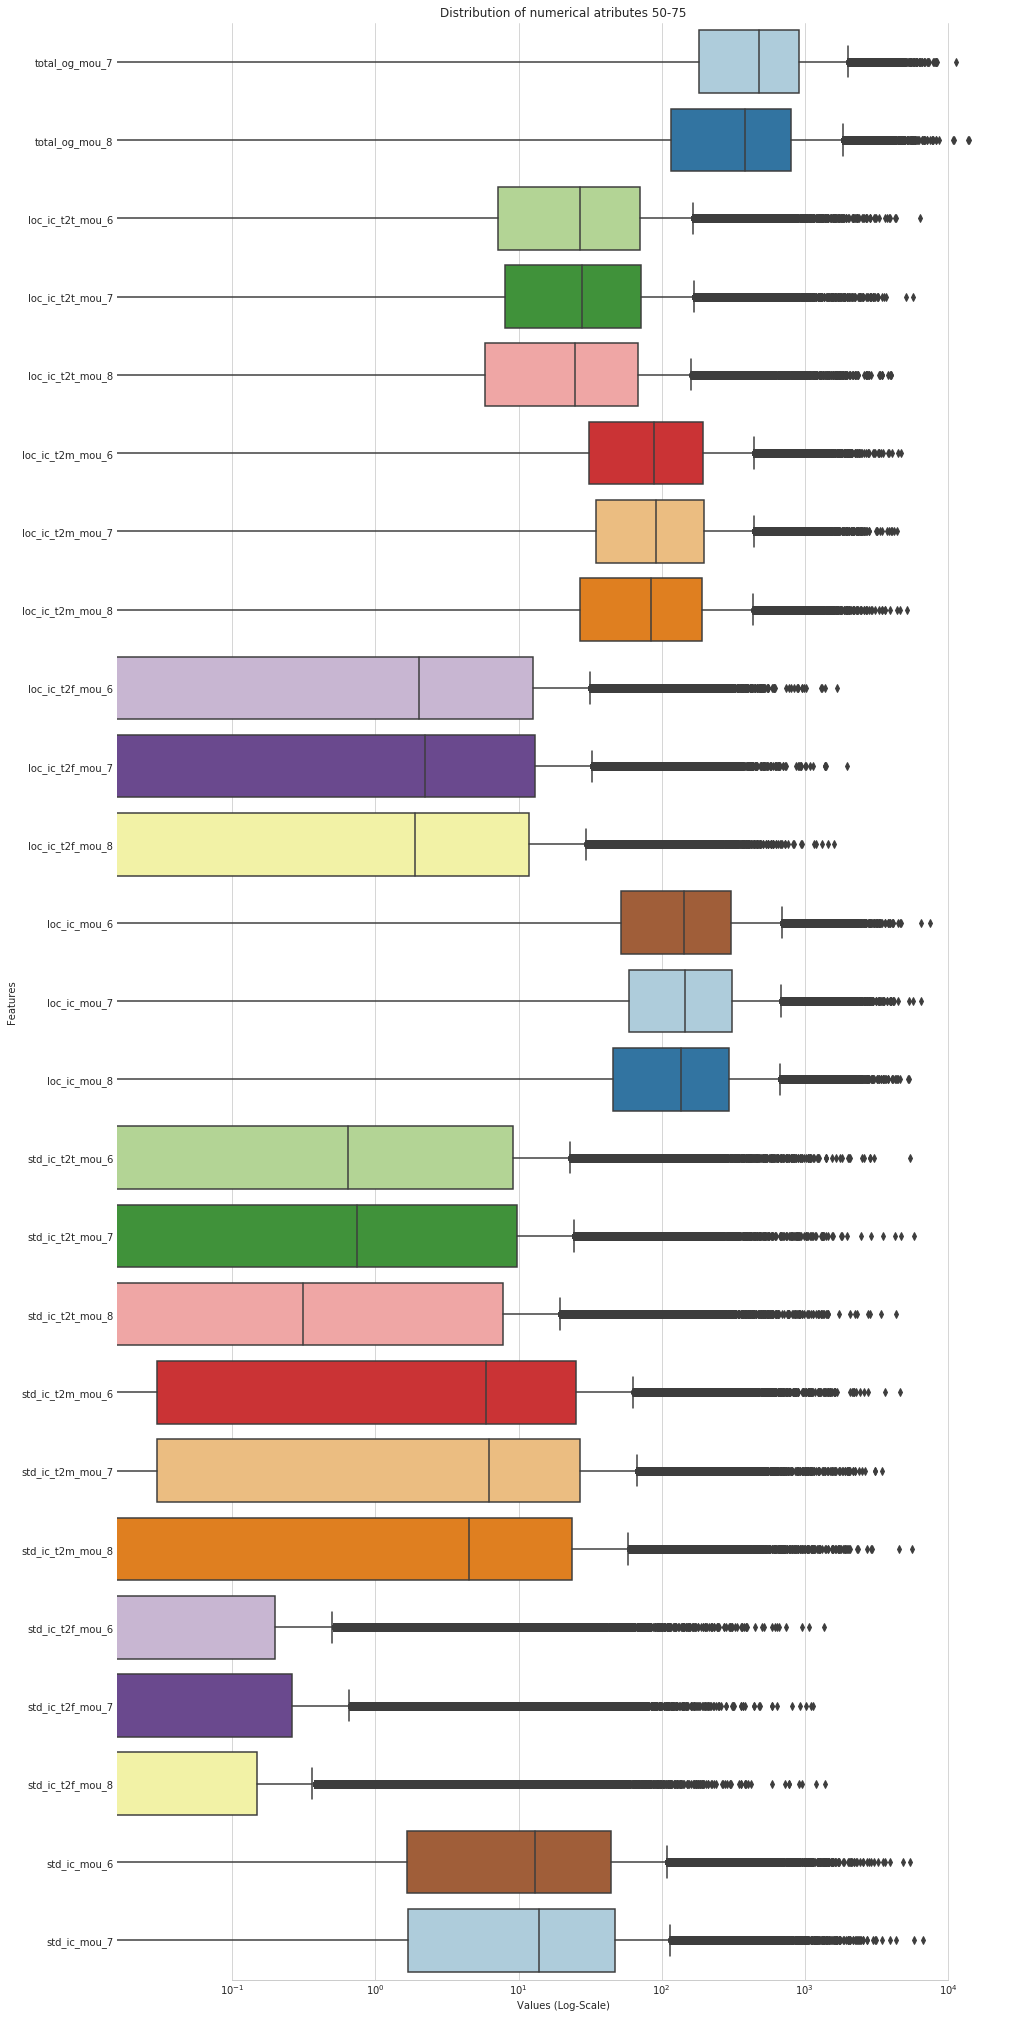

In [85]:
# Boxplot with 25 features at a time:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(16,36))
# Using log scale:
ax.set_xscale("log")
ax = sns.boxplot(data=high_val_cust[li_plot_num_feats[50:75]] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values (Log-Scale)")
ax.set(title="Distribution of numerical atributes 50-75")
sns.despine(trim=True,left=True)

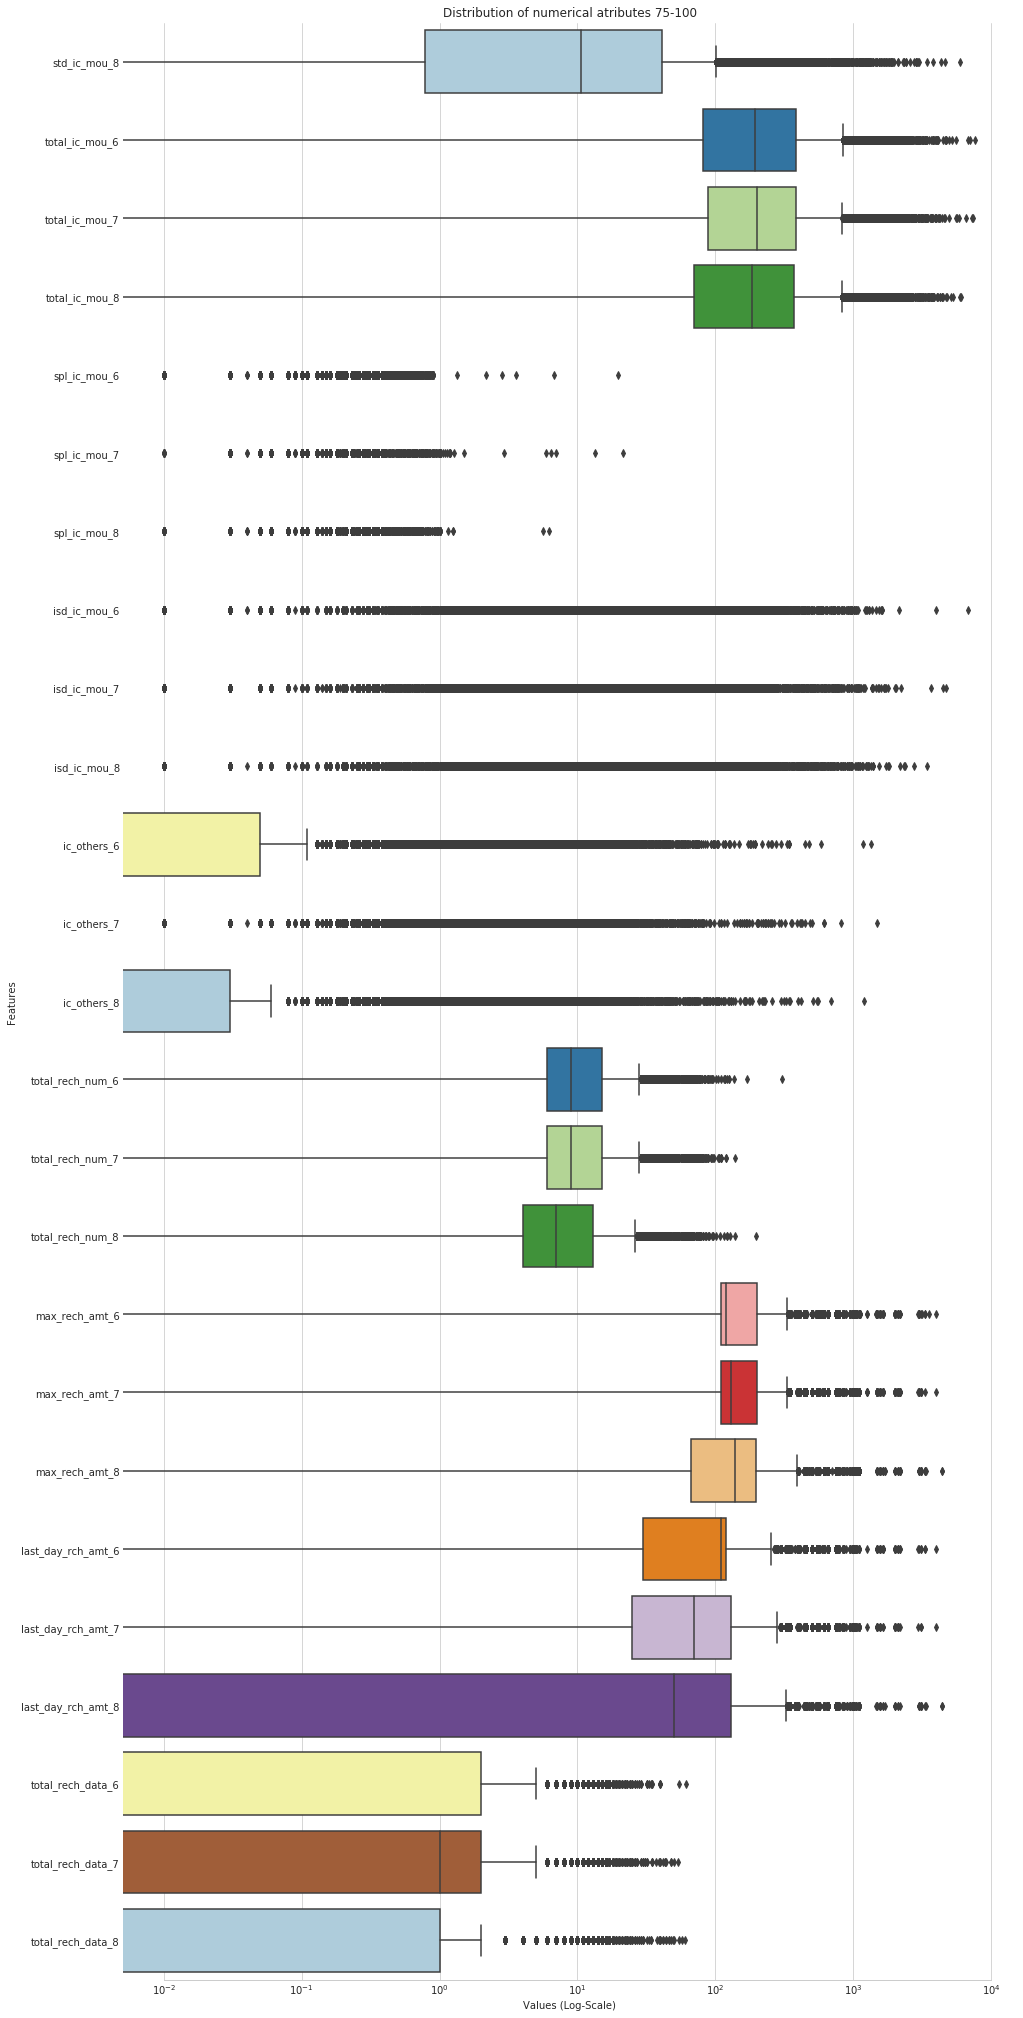

In [86]:
# Boxplot with 25 features at a time:

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(16,36))
# Using log scale:
ax.set_xscale("log")
ax = sns.boxplot(data=high_val_cust[li_plot_num_feats[75:100]] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values (Log-Scale)")
ax.set(title="Distribution of numerical atributes 75-100")
sns.despine(trim=True,left=True)

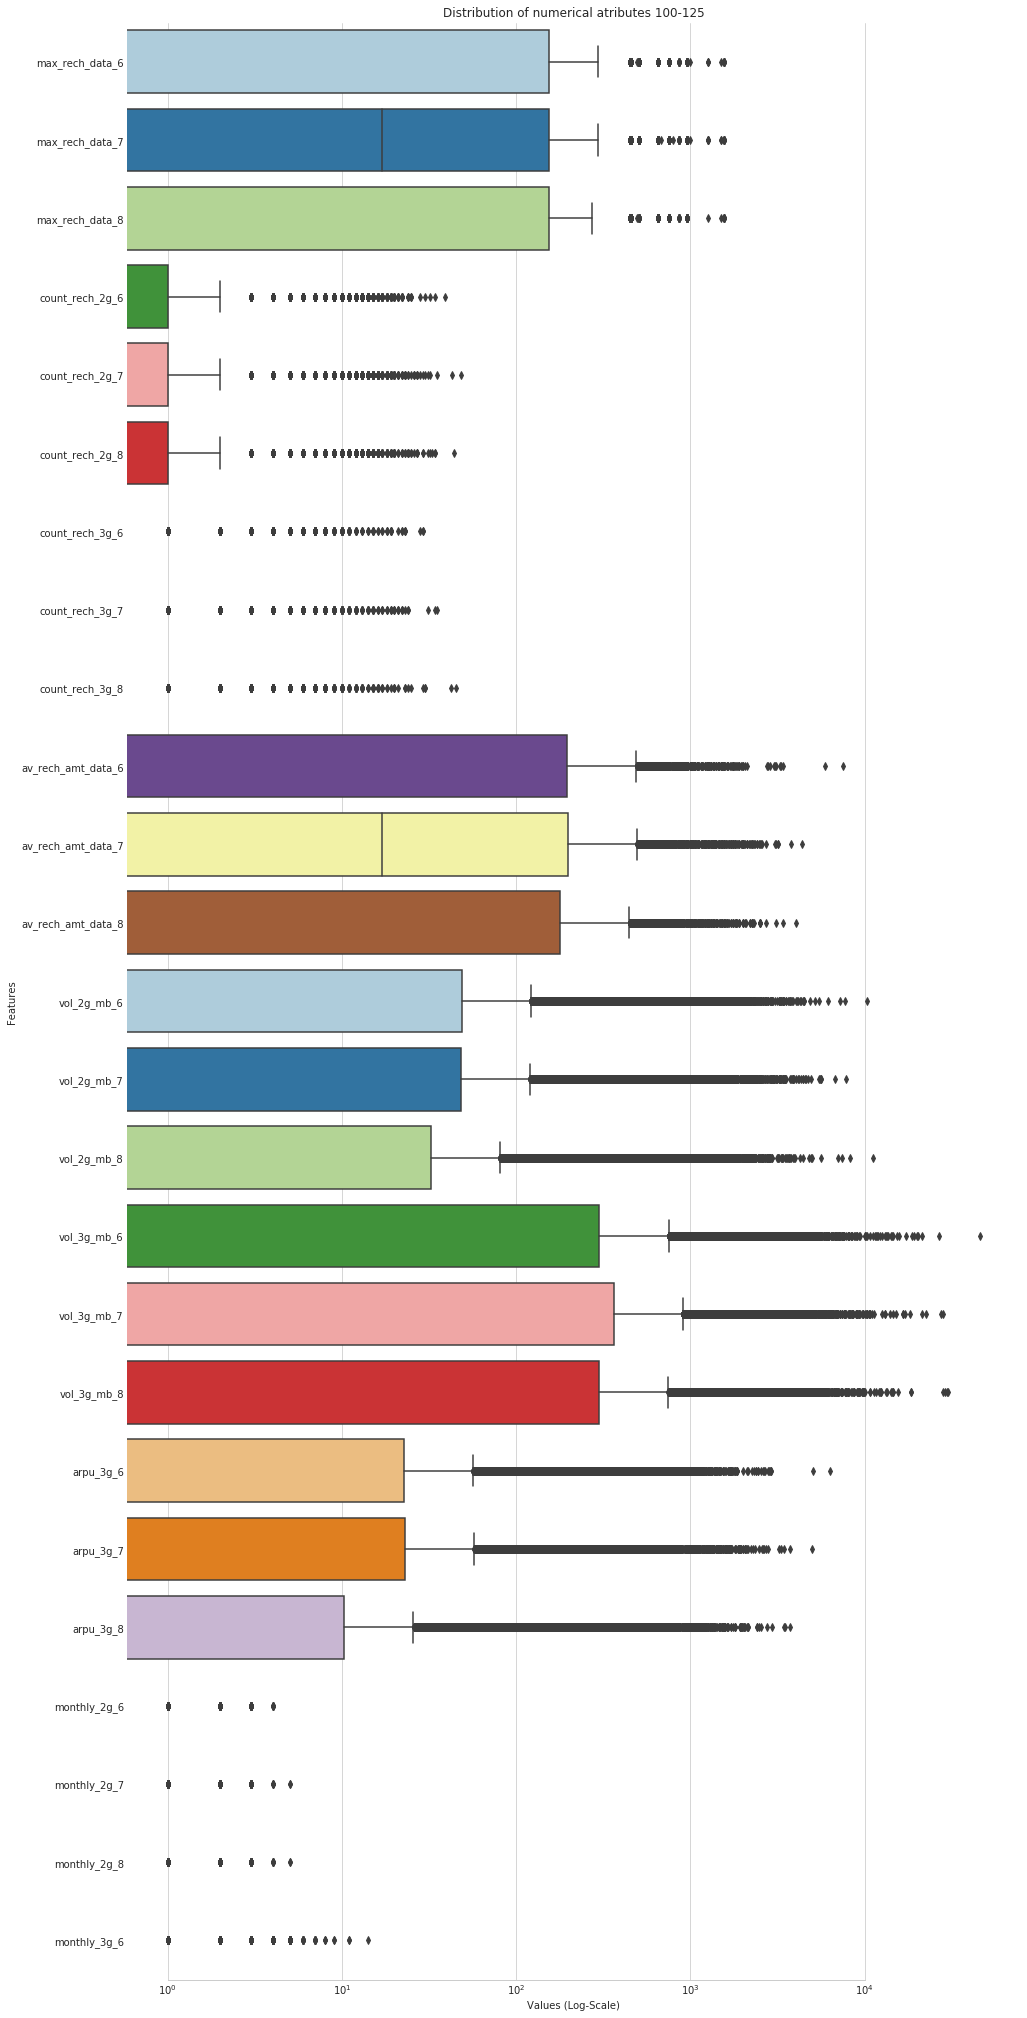

In [87]:
# Boxplot with 25 features at a time:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(16,36))
# Using log scale:
ax.set_xscale("log")
ax = sns.boxplot(data=high_val_cust[li_plot_num_feats[100:125]] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values (Log-Scale)")
ax.set(title="Distribution of numerical atributes 100-125")
sns.despine(trim=True,left=True)

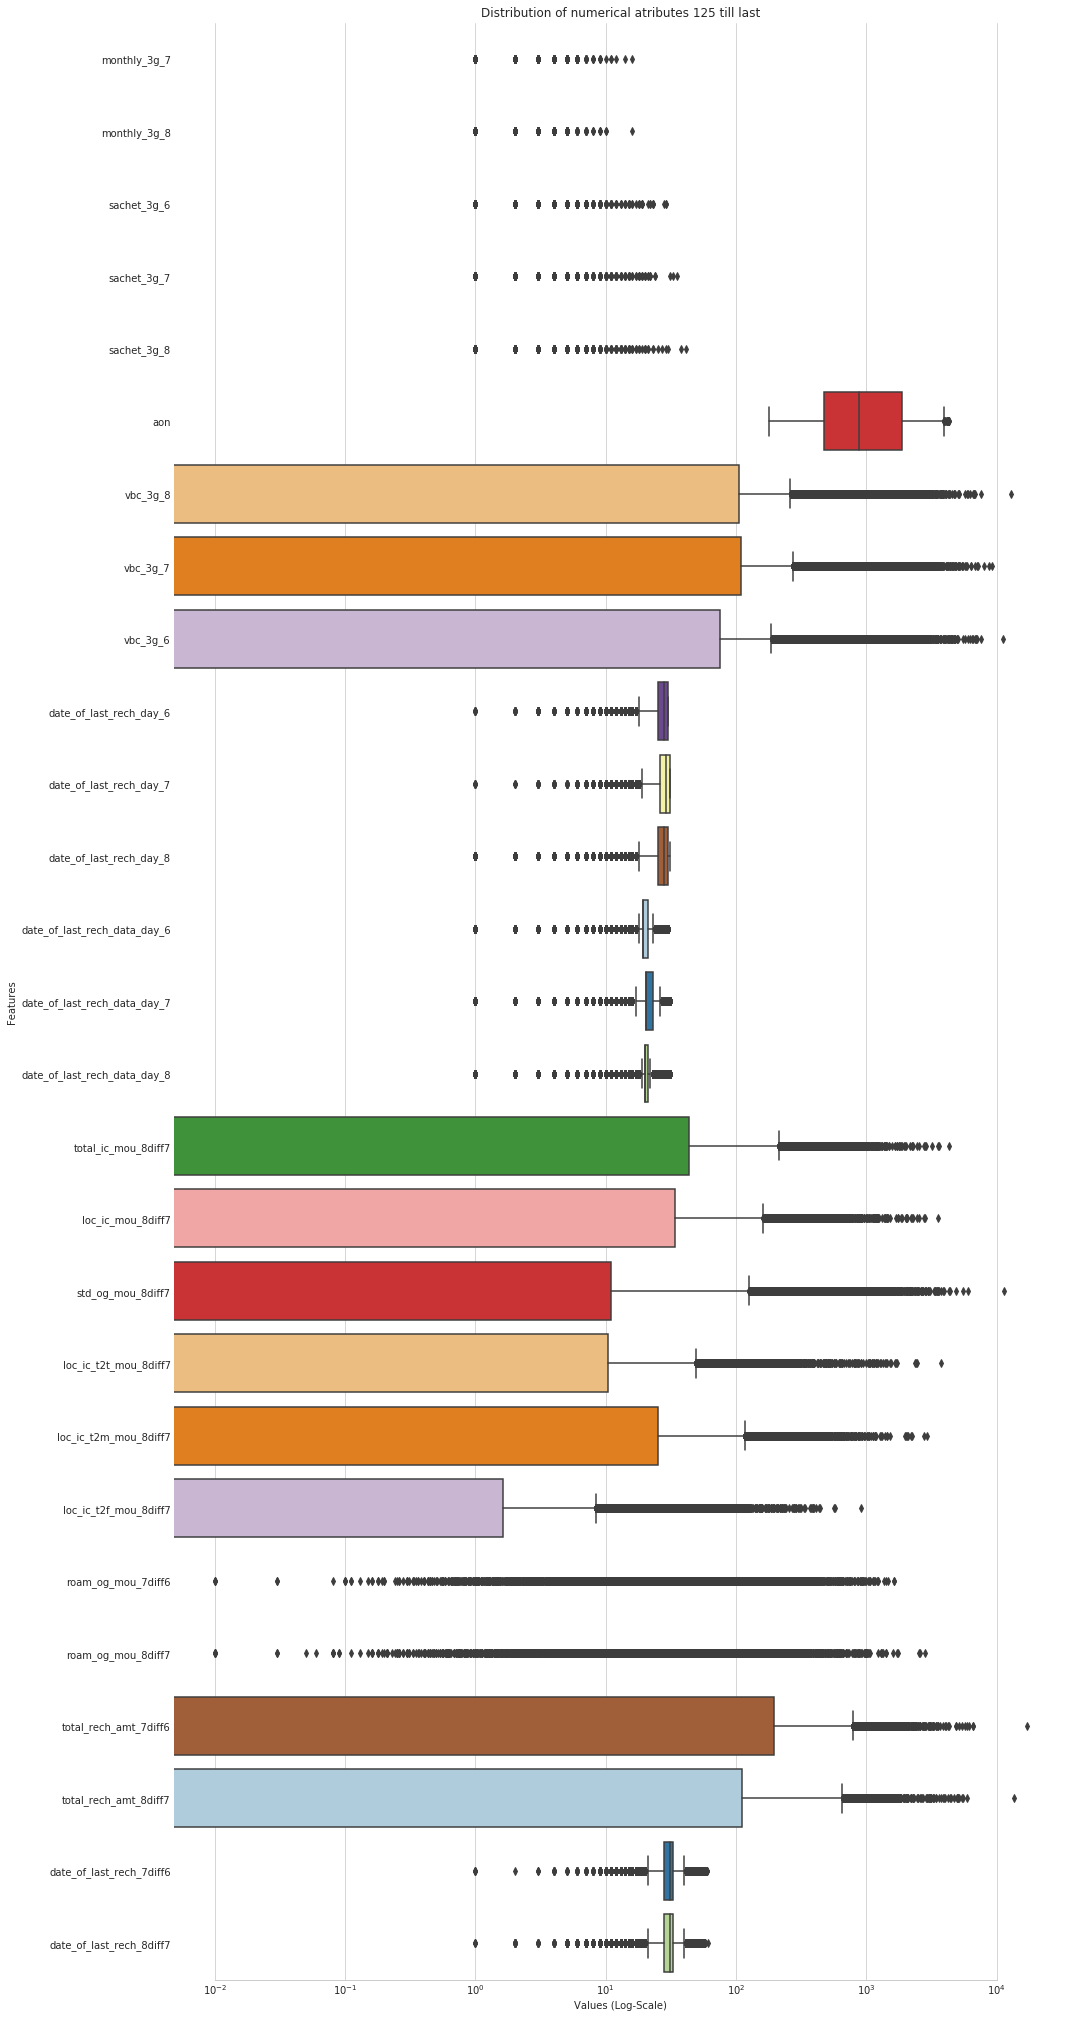

In [88]:
# Boxplot with 25 features at a time:

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(16,36))
# Using log scale:
ax.set_xscale("log")
ax = sns.boxplot(data=high_val_cust[li_plot_num_feats[125:]] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values (Log-Scale)")
ax.set(title="Distribution of numerical atributes 125 till last")
sns.despine(trim=True,left=True)

In [89]:
# There are obviuos outliers in the dataset which will be dealt later if needed.

In [90]:
# Finding the full correlation in the dataset:

# correlation matrix
cor = high_val_cust.corr()
cor

arpu_6  arpu_7  arpu_8  onnet_mou_6  \
arpu_6                          1.00    0.65    0.59         0.32   
arpu_7                          0.65    1.00    0.75         0.18   
arpu_8                          0.59    0.75    1.00         0.12   
onnet_mou_6                     0.32    0.18    0.12         1.00   
onnet_mou_7                     0.18    0.30    0.21         0.74   
onnet_mou_8                     0.15    0.25    0.33         0.61   
offnet_mou_6                    0.49    0.31    0.24         0.06   
offnet_mou_7                    0.30    0.47    0.35         0.00   
offnet_mou_8                    0.25    0.37    0.51         0.01   
roam_ic_mou_6                   0.12    0.08    0.08         0.02   
roam_ic_mou_7                   0.08    0.09    0.07         0.02   
roam_ic_mou_8                   0.08    0.09    0.10         0.04   
roam_og_mou_6                   0.19    0.12    0.12         0.07   
roam_og_mou_7                   0.13    0.17    0.13         0.07   
roam_og_mou_8                   0.12    0.15    0.19         0.07   
loc_og_t2t_mou_6                0.15    0.08    0.08         0.45   
loc_og_t2t_mou_7                0.11    0.14    0.12         0.35   
loc_og_t2t_mou_8                0.10    0.12    0.16         0.31   
loc_og_t2m_mou_6                0.31    0.18    0.18         0.00   
loc_og_t2m_mou_7                0.21    0.27    0.24        -0.03   
loc_og_t2m_mou_8                0.19    0.23    0.33        -0.03   
loc_og_t2f_mou_6                0.12    0.10    0.11        -0.04   
loc_og_t2f_mou_7                0.10    0.12    0.12        -0.05   
loc_og_t2f_mou_8                0.09    0.10    0.15        -0.05   
loc_og_t2c_mou_6                0.05    0.01    0.00         0.06   
loc_og_t2c_mou_7                0.01    0.04    0.02         0.03   
loc_og_t2c_mou_8                0.01    0.03    0.06         0.04   
loc_og_mou_6                    0.30    0.18    0.18         0.28   
loc_og_mou_7                    0.21    0.27    0.24         0.20   
loc_og_mou_8                    0.19    0.23    0.33         0.17   
std_og_t2t_mou_6                0.26    0.14    0.08         0.86   
std_og_t2t_mou_7                0.13    0.24    0.16         0.62   
std_og_t2t_mou_8                0.11    0.20    0.27         0.51   
std_og_t2m_mou_6                0.28    0.18    0.10         0.07   
std_og_t2m_mou_7                0.15    0.29    0.19         0.02   
std_og_t2m_mou_8                0.12    0.22    0.31         0.02   
std_og_t2f_mou_6                0.06    0.04    0.05        -0.03   
std_og_t2f_mou_7                0.05    0.06    0.06        -0.03   
std_og_t2f_mou_8                0.04    0.04    0.06        -0.03   
std_og_mou_6                    0.36    0.22    0.12         0.61   
std_og_mou_7                    0.19    0.36    0.24         0.43   
std_og_mou_8                    0.15    0.28    0.39         0.35   
isd_og_mou_6                    0.48    0.42    0.40        -0.02   
spl_og_mou_6                    0.12    0.06    0.09         0.10   
spl_og_mou_7                    0.06    0.11    0.12         0.07   
spl_og_mou_8                    0.04    0.06    0.10         0.07   
og_others_6                     0.10    0.04    0.02         0.11   
og_others_7                     0.02    0.03    0.02        -0.00   
og_others_8                     0.01    0.02    0.01        -0.00   
total_og_mou_6                  0.53    0.32    0.24         0.71   
total_og_mou_7                  0.32    0.51    0.37         0.50   
total_og_mou_8                  0.26    0.40    0.55         0.40   
loc_ic_t2t_mou_6                0.07    0.04    0.04         0.08   
loc_ic_t2t_mou_7                0.05    0.07    0.06         0.07   
loc_ic_t2t_mou_8                0.05    0.06    0.10         0.06   
loc_ic_t2m_mou_6                0.17    0.09    0.10        -0.04   
loc_ic_t2m_mou_7                0.12    0.15    0.14        -0.06   
loc_ic_t2m_mou_8            

In [91]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable churn")

corr_initial = high_val_cust.corr()['churn']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(10)

Most important features relative to target variable churn


Correlation
churn                    1.00
std_og_mou_6             0.14
std_og_t2m_mou_6         0.11
std_og_t2t_mou_6         0.10
roam_og_mou_7            0.09
total_og_mou_6           0.09
onnet_mou_6              0.07
arpu_6                   0.07
roam_og_mou_8            0.07
roam_ic_mou_7            0.07

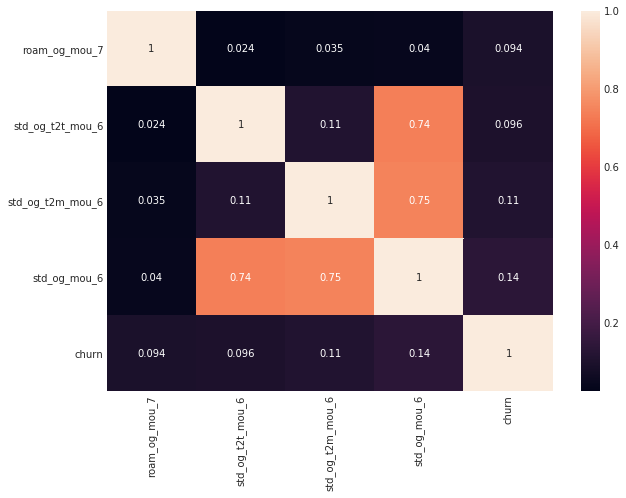

In [92]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:

top_feature = cor.index[abs(cor['churn']>0.09)]
plt.subplots(figsize=(10, 7))
top_corr = high_val_cust[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [93]:
# So we can conclude from above heatmap that we have only weak correlation of features with the target churn variable.

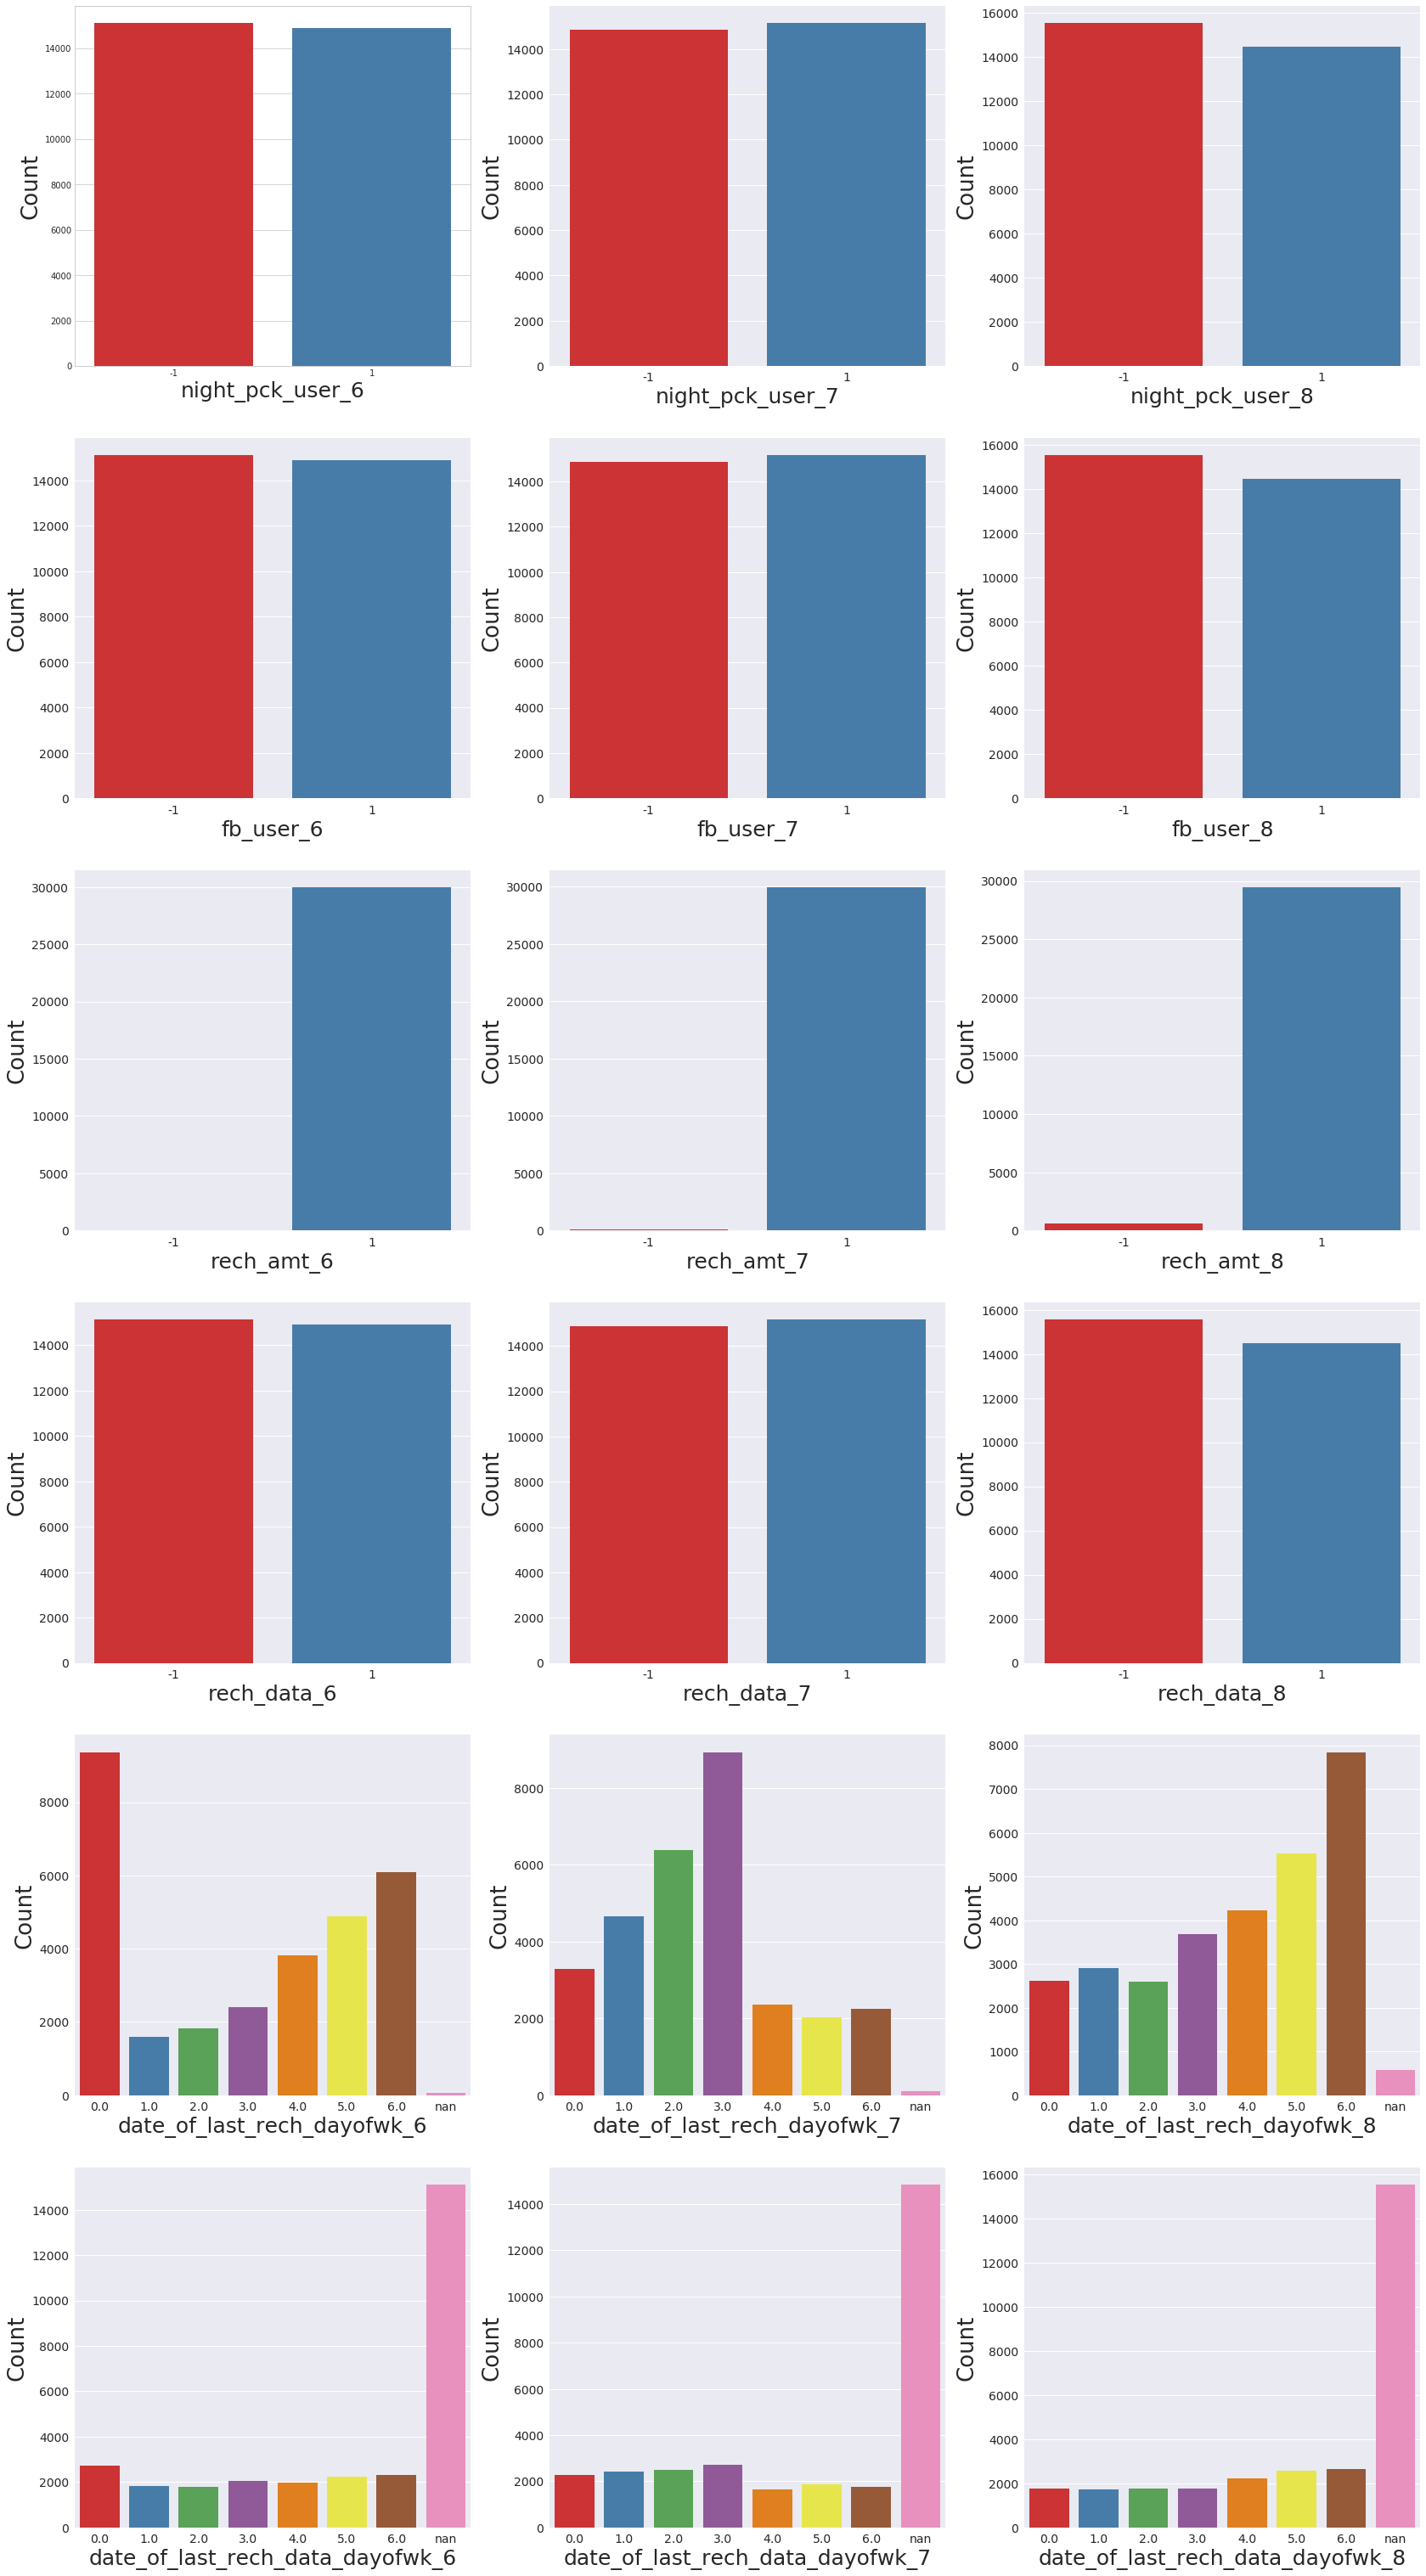

In [94]:
# Plot of the categorical features distribution:

churn_cat_var_list = high_val_cust.select_dtypes(exclude=[np.number]).columns.tolist()

fig, axs = plt.subplots(ncols=3, nrows=6, figsize=(16, 30))
plt.subplots_adjust(right=1.5, top=1.5)

for i, feature in enumerate(churn_cat_var_list, 1):    
    plt.subplot(6, 3, i)
    sns.set(font_scale = 1.4)
    sns.countplot(x=feature, data=high_val_cust, palette='Set1')
        
    plt.xlabel('{}'.format(feature), size=25)
    plt.ylabel('Count', size=26)
            
plt.show()

In [95]:
# lets see the categorical variables that we have in hand now:

#housing_cat_var_df.head()
churn_cat_var_list

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'rech_amt_6',
 'rech_amt_7',
 'rech_amt_8',
 'rech_data_6',
 'rech_data_7',
 'rech_data_8',
 'date_of_last_rech_dayofwk_6',
 'date_of_last_rech_dayofwk_7',
 'date_of_last_rech_dayofwk_8',
 'date_of_last_rech_data_dayofwk_6',
 'date_of_last_rech_data_dayofwk_7',
 'date_of_last_rech_data_dayofwk_8']

In [96]:
# As we can see from above we have missing values for the few categorical variables, so inorder to differentiate them and 
# build the model lets impute them with some value for now:

high_val_cust['date_of_last_rech_data_dayofwk_6'].replace('nan','-1',inplace=True)
high_val_cust['date_of_last_rech_data_dayofwk_7'].replace('nan','-1',inplace=True)
high_val_cust['date_of_last_rech_data_dayofwk_8'].replace('nan','-1',inplace=True)
high_val_cust['date_of_last_rech_dayofwk_6'].replace('nan','-1',inplace=True)
high_val_cust['date_of_last_rech_dayofwk_7'].replace('nan','-1',inplace=True)
high_val_cust['date_of_last_rech_dayofwk_8'].replace('nan','-1',inplace=True)

In [97]:
high_val_cust.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.38  214.82  213.80         0.00         0.00         0.00   
7  1069.18 1349.85 3171.48        57.84        54.68        52.29   
8   378.72  492.22  137.36       413.69       351.03        35.08   
16  430.98  299.87  187.89        50.51        74.01        70.61   
21  514.45  597.75  637.76       102.41       132.11        85.14   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
16        296.29        229.74        162.76           0.00           2.83   
21        757.93        896.68        983.39           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
16           0.00           0.00          17.74           0.00   
21           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
16             42.61             65.16             67.38            273.29   
21              4.48              6.16             23.34             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
16            145.99            128.28              0.00              4.48   
21             87.93            104.81              0.75              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              53.23              0.00              0.00              0.00   
8               0.00              0.00              0.00              7.15   
16             10.26              0.00              0.00              0.00   
21              1.58              0.00              0.00              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
16        315.91        215.64        205.93              7.89   
21         97.04         94.09        129.74             97.93   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
16              2.58              3.23             22.99             64.51   
21            125.94             61.79            665.36            808.74   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
21            876.99              0.00              0.00    

In [98]:
# Let's have final look at any missing value in the data-set:
missing_data(high_val_cust).head()

Missing Value Count  Percent Missing
date_of_last_rech_8diff7                    0             0.00
loc_ic_t2t_mou_7                            0             0.00
loc_ic_mou_6                                0             0.00
loc_ic_t2f_mou_8                            0             0.00
loc_ic_t2f_mou_7                            0             0.00

In [99]:
#Check if any nulls exist in final dataframe
round(100*(high_val_cust.isnull().sum()/len(high_val_cust.index)), 2).sum()

0.0

In [100]:
# So we have dealt with all missing values now!

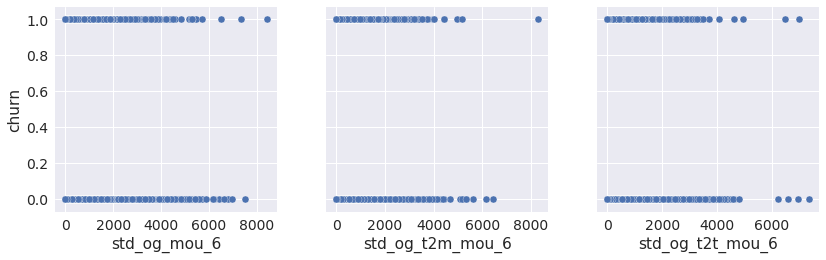

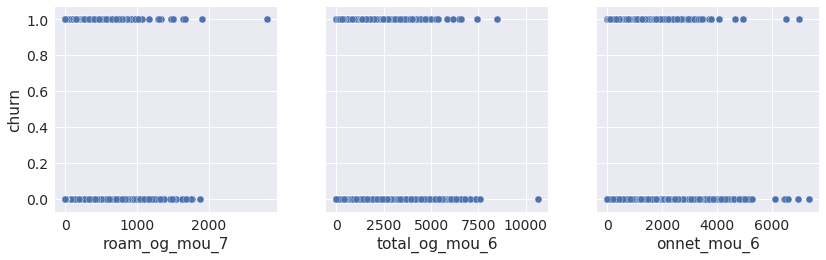

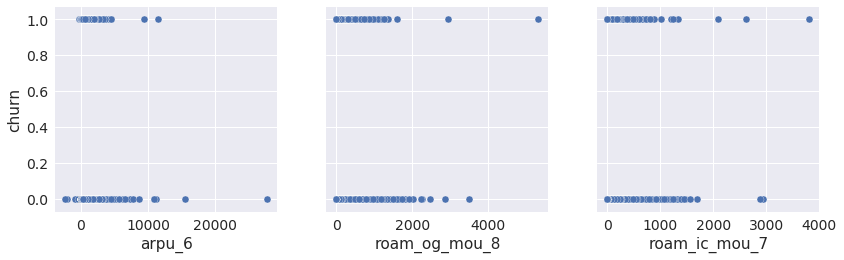

In [101]:
# Let's do bivariate analysis of churn with top 9 continuous correlated variables:

# Using pairplot for analysing numerical variables (Bivariate):

def pairplot(x,y,z):
    sns.pairplot(high_val_cust, x_vars=[x,y,z], y_vars='churn',size=4, aspect=1, kind='scatter')
    plt.show()

pairplot('std_og_mou_6', 'std_og_t2m_mou_6', 'std_og_t2t_mou_6')
pairplot('roam_og_mou_7', 'total_og_mou_6', 'onnet_mou_6')
pairplot('arpu_6', 'roam_og_mou_8', 'roam_ic_mou_7')

In [102]:
high_val_cust.shape

(30015, 171)

In [103]:
# Finding the datatypes of the columns:
print(high_val_cust.dtypes)

arpu_6                               float64
arpu_7                               float64
arpu_8                               float64
onnet_mou_6                          float64
onnet_mou_7                          float64
onnet_mou_8                          float64
offnet_mou_6                         float64
offnet_mou_7                         float64
offnet_mou_8                         float64
roam_ic_mou_6                        float64
roam_ic_mou_7                        float64
roam_ic_mou_8                        float64
roam_og_mou_6                        float64
roam_og_mou_7                        float64
roam_og_mou_8                        float64
loc_og_t2t_mou_6                     float64
loc_og_t2t_mou_7                     float64
loc_og_t2t_mou_8                     float64
loc_og_t2m_mou_6                     float64
loc_og_t2m_mou_7                     float64
loc_og_t2m_mou_8                     float64
loc_og_t2f_mou_6                     float64
loc_og_t2f

In [104]:
list(high_val_cust.select_dtypes(include=['object','category']).columns)

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'rech_amt_6',
 'rech_amt_7',
 'rech_amt_8',
 'rech_data_6',
 'rech_data_7',
 'rech_data_8',
 'date_of_last_rech_dayofwk_6',
 'date_of_last_rech_dayofwk_7',
 'date_of_last_rech_dayofwk_8',
 'date_of_last_rech_data_dayofwk_6',
 'date_of_last_rech_data_dayofwk_7',
 'date_of_last_rech_data_dayofwk_8']

In [105]:
high_val_cust.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.38  214.82  213.80         0.00         0.00         0.00   
7  1069.18 1349.85 3171.48        57.84        54.68        52.29   
8   378.72  492.22  137.36       413.69       351.03        35.08   
16  430.98  299.87  187.89        50.51        74.01        70.61   
21  514.45  597.75  637.76       102.41       132.11        85.14   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
16        296.29        229.74        162.76           0.00           2.83   
21        757.93        896.68        983.39           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
16           0.00           0.00          17.74           0.00   
21           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
16             42.61             65.16             67.38            273.29   
21              4.48              6.16             23.34             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
16            145.99            128.28              0.00              4.48   
21             87.93            104.81              0.75              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              53.23              0.00              0.00              0.00   
8               0.00              0.00              0.00              7.15   
16             10.26              0.00              0.00              0.00   
21              1.58              0.00              0.00              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
16        315.91        215.64        205.93              7.89   
21         97.04         94.09        129.74             97.93   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
16              2.58              3.23             22.99             64.51   
21            125.94             61.79            665.36            808.74   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
21            876.99              0.00              0.00    

In [106]:
# So we have 171 features right now which is huge !

# Let's take backup of the data-frame :
churn_cust_main = high_val_cust

In [107]:
# Converting from categorical to float data type as these features already have numerical values:
high_val_cust = high_val_cust.astype({'night_pck_user_6':'float64', 'night_pck_user_7':'float64', 'night_pck_user_8':'float64', 'fb_user_6':'float64', 'fb_user_7':'float64', 'fb_user_8':'float64', 'rech_amt_6':'float64', 'rech_amt_7':'float64', 'rech_amt_8':'float64', 'rech_data_6':'float64', 'rech_data_7':'float64', 'rech_data_8':'float64', 'date_of_last_rech_dayofwk_6':'float64', 'date_of_last_rech_dayofwk_7':'float64', 'date_of_last_rech_dayofwk_8':'float64', 'date_of_last_rech_data_dayofwk_6':'float64', 'date_of_last_rech_data_dayofwk_7':'float64', 'date_of_last_rech_data_dayofwk_8':'float64'}) 


# Model Building:

We will now train different models on this dataset.

### Splitting Data into Training and Test Sets

In [108]:
# Putting feature variable to X
X = high_val_cust.drop(['churn'],axis=1)

# Putting response variable to y
y = high_val_cust['churn']

y.head()

0     1
7     1
8     0
16    0
21    0
Name: churn, dtype: int64

In [109]:
X.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.38  214.82  213.80         0.00         0.00         0.00   
7  1069.18 1349.85 3171.48        57.84        54.68        52.29   
8   378.72  492.22  137.36       413.69       351.03        35.08   
16  430.98  299.87  187.89        50.51        74.01        70.61   
21  514.45  597.75  637.76       102.41       132.11        85.14   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
16        296.29        229.74        162.76           0.00           2.83   
21        757.93        896.68        983.39           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
16           0.00           0.00          17.74           0.00   
21           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
16             42.61             65.16             67.38            273.29   
21              4.48              6.16             23.34             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
16            145.99            128.28              0.00              4.48   
21             87.93            104.81              0.75              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              53.23              0.00              0.00              0.00   
8               0.00              0.00              0.00              7.15   
16             10.26              0.00              0.00              0.00   
21              1.58              0.00              0.00              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
16        315.91        215.64        205.93              7.89   
21         97.04         94.09        129.74             97.93   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
16              2.58              3.23             22.99             64.51   
21            125.94             61.79            665.36            808.74   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
21            876.99              0.00              0.00    

### Scaling:
Scaling all values will reduce the distortion due to exceptionally high values and make algorithms converge faster.
We need to scale the continuous variables(features) as they may be of the different magnitude:


In [110]:
# Instantiate standard scalar:
scaler = StandardScaler()

# Perform fit transform on the X :
X_std = scaler.fit_transform(X)

In [111]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_std,y, train_size=0.7,test_size=0.3,random_state=100)

In [112]:
print("Training dataset size is",X_train.shape)
print("Training dataset size is",y_train.shape)
print("Test dataset size is",X_test.shape)
print("Test dataset size is",y_test.shape)

Training dataset size is (21010, 170)
Training dataset size is (21010,)
Test dataset size is (9005, 170)
Test dataset size is (9005,)


## PCA and Feature reduction:

Using PCA on our data will decrease the amount of operations during training and testing.
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [113]:
# Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [114]:
# Doing the PCA on the train data:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [115]:
#List of PCA components:
pca.components_

array([[-3.00186239e-02, -2.87058327e-02, -1.37872635e-02, ...,
         2.13107998e-02,  1.68481197e-02,  3.91315326e-03],
       [ 1.13452314e-01,  1.25301214e-01,  1.36564374e-01, ...,
         2.43319992e-02,  6.34738661e-03,  4.09201429e-03],
       [ 1.23547189e-01,  1.59959578e-01,  1.54528471e-01, ...,
         9.74982962e-03,  1.15122068e-02,  2.07244490e-02],
       ...,
       [-0.00000000e+00, -1.18306734e-17,  3.99096456e-18, ...,
        -8.94882241e-19,  6.89399663e-18,  6.92296186e-19],
       [-0.00000000e+00, -4.75001735e-18, -1.18900272e-17, ...,
         4.14623838e-17,  2.00331361e-17, -3.97114703e-17],
       [ 0.00000000e+00,  1.24103802e-17,  8.07079734e-19, ...,
        -1.97539584e-17,  3.38080735e-18,  3.75577361e-18]])

In [116]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

PC1  PC2      Feature
0 -0.03 0.11       arpu_6
1 -0.03 0.13       arpu_7
2 -0.01 0.14       arpu_8
3 -0.09 0.03  onnet_mou_6
4 -0.09 0.04  onnet_mou_7

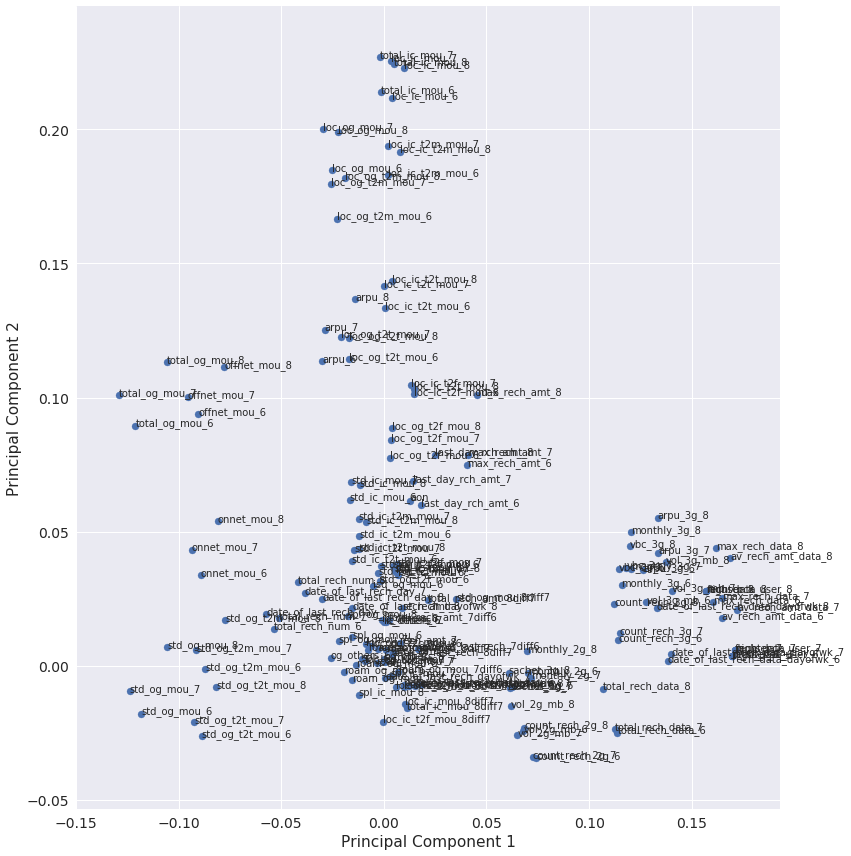

In [117]:
# PLotting for first 2 principal components:

%matplotlib inline
fig = plt.figure(figsize = (12,12))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [118]:
#Let's check the variance ratios:
pca.explained_variance_ratio_

array([1.15613209e-01, 7.28235582e-02, 5.69030379e-02, 4.43809129e-02,
       3.52855236e-02, 2.98577160e-02, 2.78592611e-02, 2.57854626e-02,
       2.22599890e-02, 2.07712607e-02, 2.00574778e-02, 1.95170155e-02,
       1.73962907e-02, 1.66960999e-02, 1.63566406e-02, 1.60313547e-02,
       1.51719507e-02, 1.43437905e-02, 1.41862091e-02, 1.34718737e-02,
       1.22126934e-02, 1.16473628e-02, 1.15798384e-02, 1.12335634e-02,
       1.06868187e-02, 1.00217111e-02, 9.95204526e-03, 9.56616177e-03,
       9.37238995e-03, 9.00388483e-03, 8.65624033e-03, 8.57166228e-03,
       7.99093981e-03, 7.73625568e-03, 7.70681015e-03, 7.47582380e-03,
       7.34557605e-03, 7.18086654e-03, 7.13898877e-03, 6.67512491e-03,
       6.32385083e-03, 6.27229150e-03, 6.02844615e-03, 5.79911979e-03,
       5.75120229e-03, 5.47896462e-03, 5.34909135e-03, 5.31410361e-03,
       5.25887622e-03, 5.20612530e-03, 4.98227839e-03, 4.83908543e-03,
       4.77246935e-03, 4.70032857e-03, 4.42542776e-03, 4.41191624e-03,
      

In [119]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [11.6  7.3  5.7  4.4  3.5  3.   2.8  2.6  2.2  2.1  2.   2.   1.7  1.7
  1.6  1.6  1.5  1.4  1.4  1.3  1.2  1.2  1.2  1.1  1.1  1.   1.   1.
  0.9  0.9  0.9  0.9  0.8  0.8  0.8  0.7  0.7  0.7  0.7  0.7  0.6  0.6
  0.6  0.6  0.6  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.4  0.4
  0.4  0.4  0.4  0.4  0.4  0.4  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3
  0.3  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
  0.2  0.2  0.2  0.2  0.2  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0. ]


In [120]:
print (pca.explained_variance_ratio_.cumsum())

[0.11561321 0.18843677 0.24533981 0.28972072 0.32500624 0.35486396
 0.38272322 0.40850868 0.43076867 0.45153993 0.47159741 0.49111442
 0.50851072 0.52520682 0.54156346 0.55759481 0.57276676 0.58711055
 0.60129676 0.61476863 0.62698133 0.63862869 0.65020853 0.66144209
 0.67212891 0.68215062 0.69210267 0.70166883 0.71104122 0.7200451
 0.72870134 0.73727301 0.74526395 0.7530002  0.76070701 0.76818284
 0.77552841 0.78270928 0.78984827 0.79652339 0.80284724 0.80911953
 0.81514798 0.8209471  0.8266983  0.83217727 0.83752636 0.84284046
 0.84809934 0.85330546 0.85828774 0.86312683 0.8678993  0.87259963
 0.87702505 0.88143697 0.88576781 0.88975777 0.89368836 0.89753501
 0.90126249 0.90488052 0.90822891 0.91153695 0.91474254 0.91781766
 0.92083973 0.92372393 0.92649966 0.92911322 0.93161393 0.93407539
 0.93641867 0.93872923 0.94098459 0.94320265 0.94537446 0.94754195
 0.94965641 0.95175148 0.95373943 0.95570906 0.95764609 0.95954261
 0.96135301 0.96304029 0.96470928 0.96632911 0.96791925 0.96943

In [121]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 11.56,  18.84,  24.53,  28.97,  32.5 ,  35.49,  38.28,  40.86,
        43.09,  45.17,  47.18,  49.13,  50.87,  52.54,  54.18,  55.78,
        57.3 ,  58.73,  60.15,  61.5 ,  62.72,  63.88,  65.04,  66.16,
        67.23,  68.23,  69.23,  70.19,  71.13,  72.03,  72.9 ,  73.76,
        74.56,  75.33,  76.1 ,  76.85,  77.58,  78.3 ,  79.01,  79.68,
        80.31,  80.94,  81.54,  82.12,  82.7 ,  83.25,  83.78,  84.31,
        84.84,  85.36,  85.86,  86.34,  86.82,  87.29,  87.73,  88.17,
        88.6 ,  89.  ,  89.39,  89.77,  90.14,  90.5 ,  90.83,  91.16,
        91.48,  91.79,  92.09,  92.38,  92.66,  92.92,  93.17,  93.42,
        93.65,  93.88,  94.11,  94.33,  94.55,  94.77,  94.98,  95.19,
        95.39,  95.59,  95.78,  95.97,  96.15,  96.32,  96.49,  96.65,
        96.81,  96.96,  97.11,  97.26,  97.41,  97.55,  97.69,  97.83,
        97.96,  98.09,  98.21,  98.33,  98.45,  98.56,  98.67,  98.78,
        98.89,  98.99,  99.08,  99.17,  99.25,  99.33,  99.41,  99.48,
      

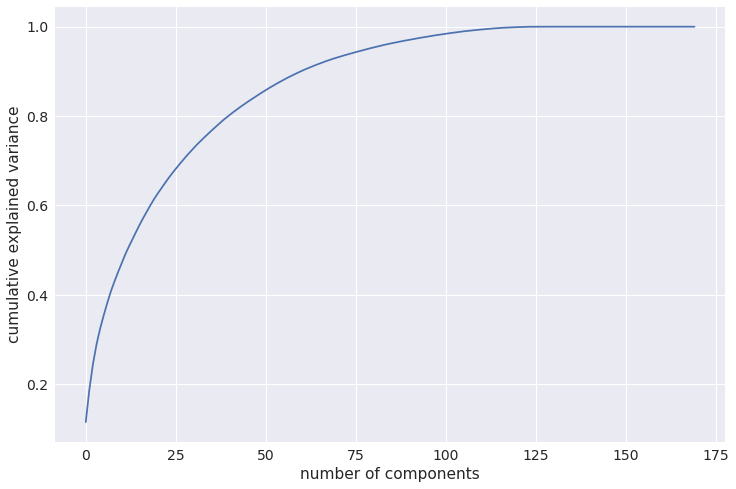

In [122]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Looks like 75 components themselves can explain 94 % of the variance in the data according to PCA
- We'll choose 75 components for our modeling


In [123]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets

# Importing the library:
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=75)

In [124]:
# Basis transformation - getting the data onto our PCs

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21010, 75)

###  Creating correlation matrix for the principal components - we expect little to no correlation

In [125]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

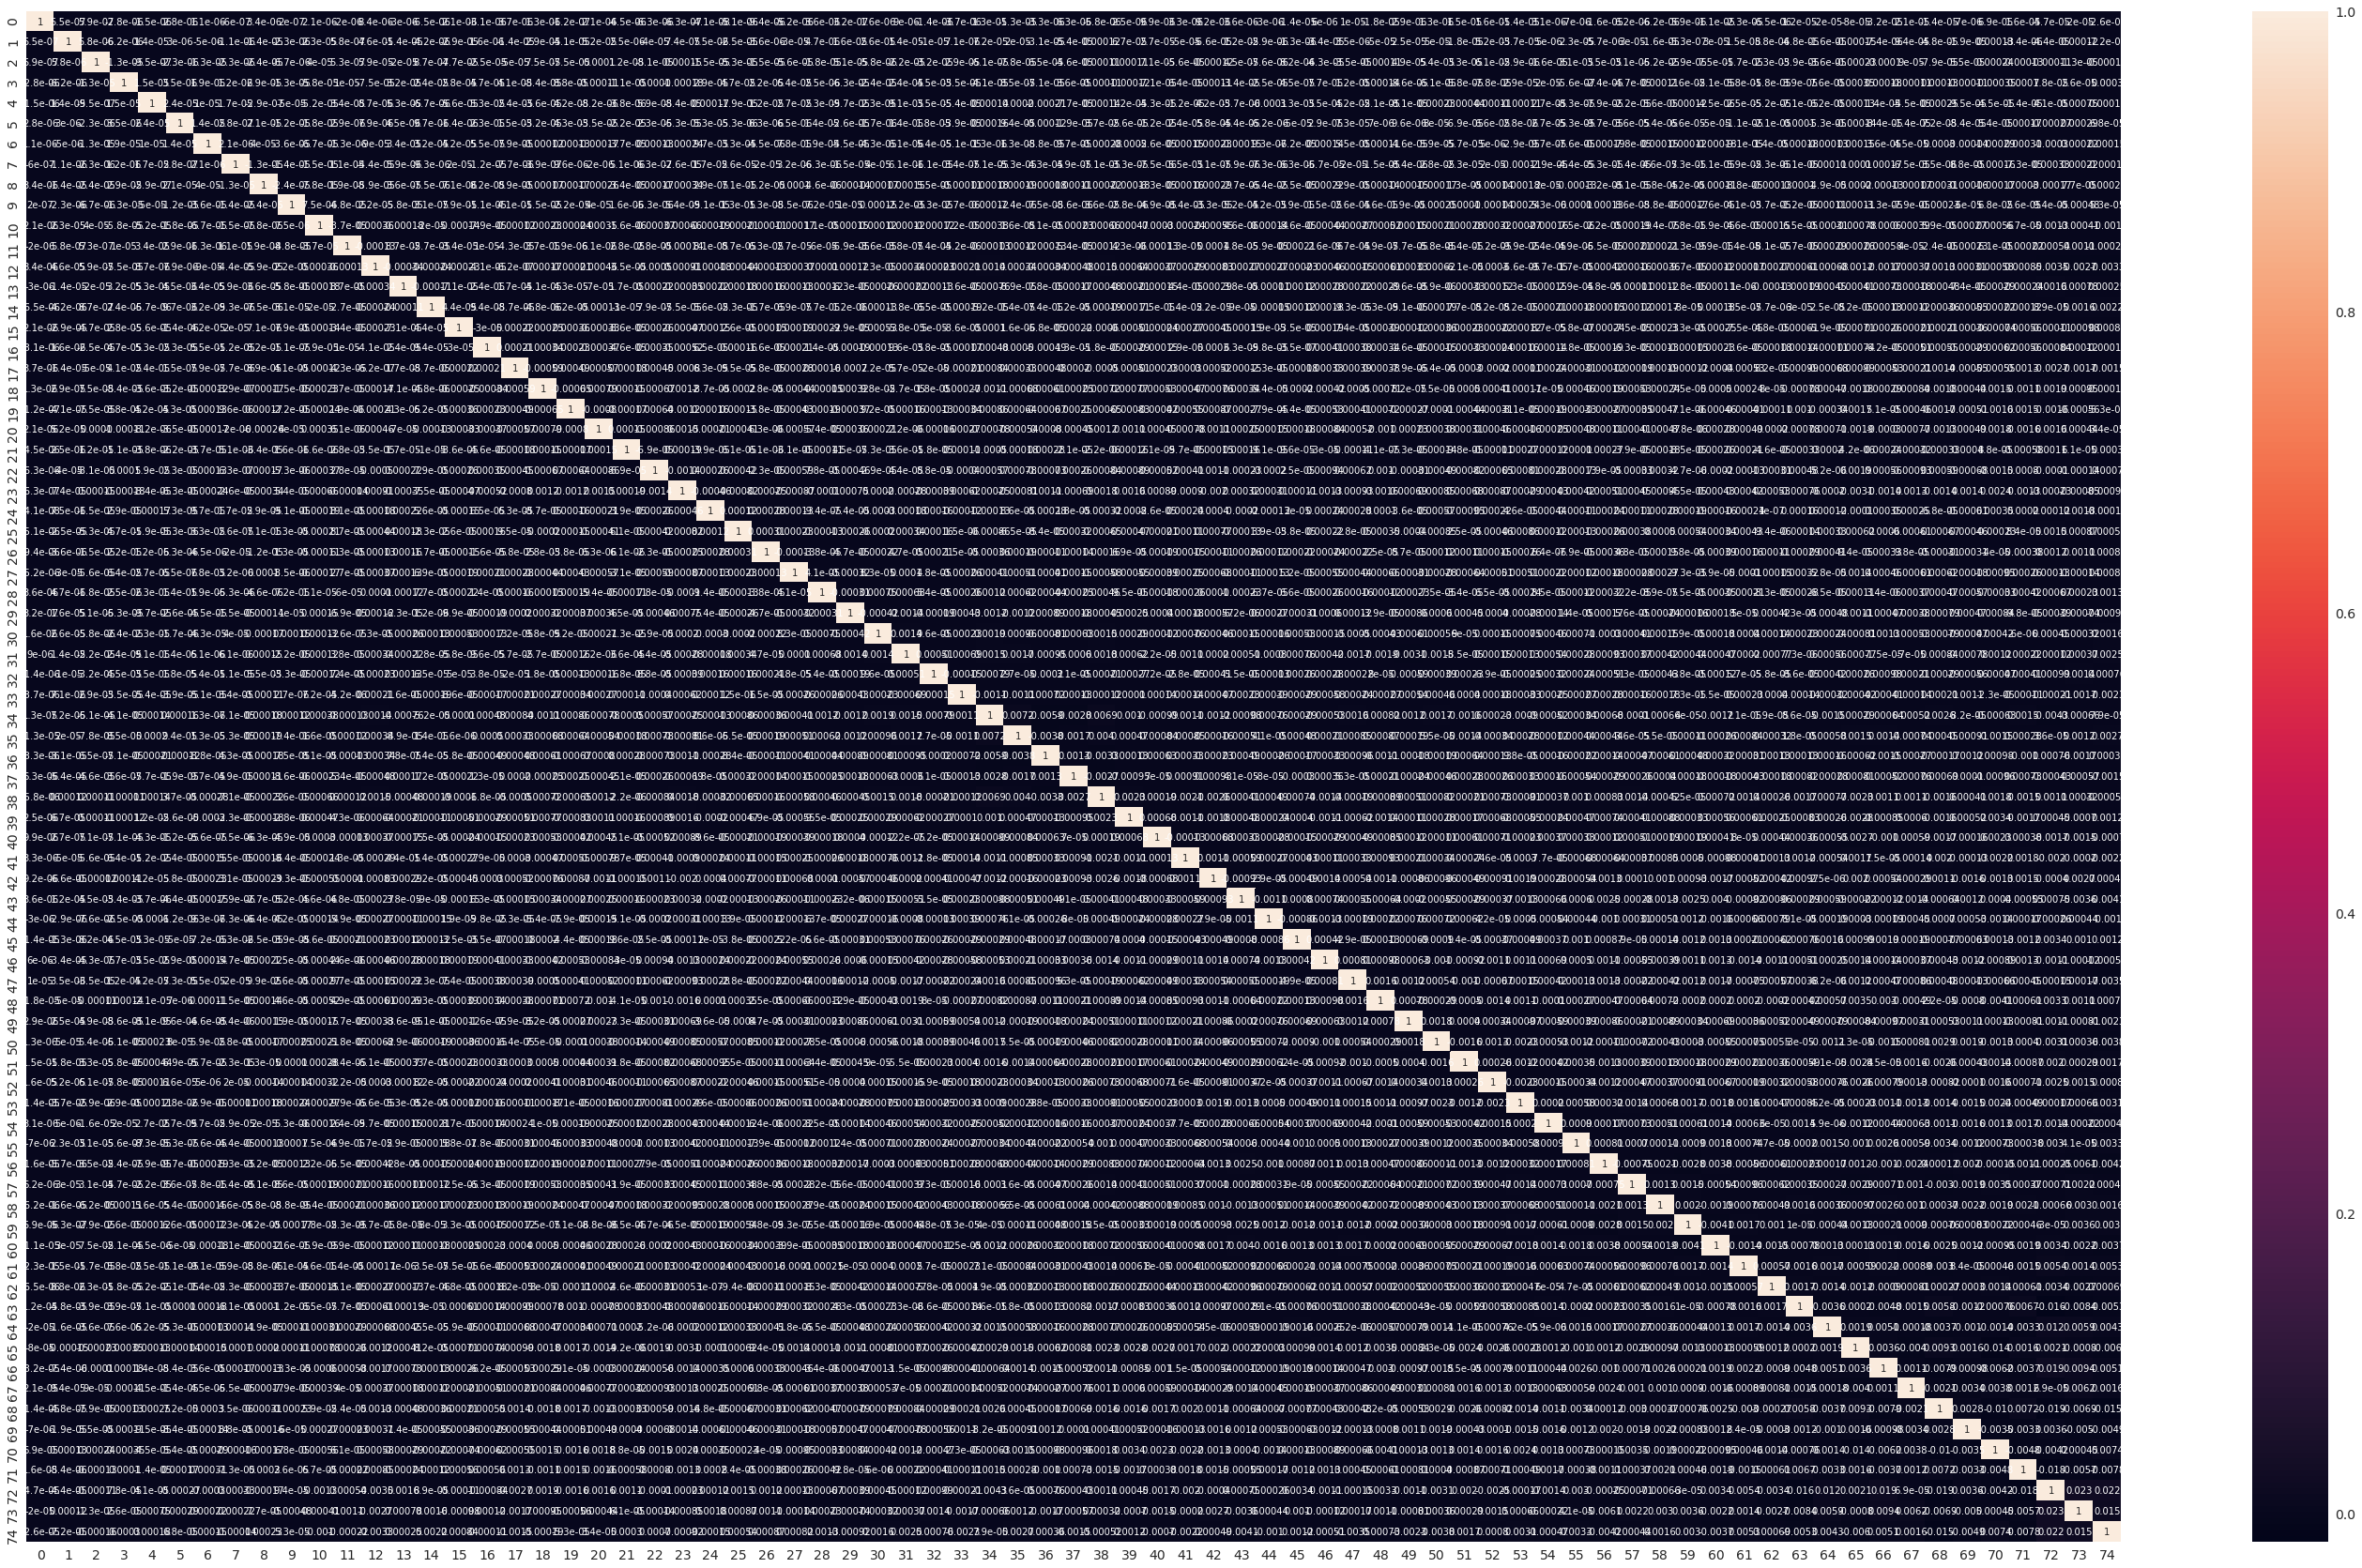

In [126]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (50,30))
sns.heatmap(corrmat,annot = True)

In [127]:
corrmat

array([[ 1.00000000e+00,  5.50290348e-07,  5.85963036e-07, ...,
        -4.70225436e-05, -1.97789919e-05, -2.63552504e-05],
       [ 5.50290348e-07,  1.00000000e+00,  5.80488872e-06, ...,
        -4.41161085e-05,  1.21242879e-04, -7.15736364e-05],
       [ 5.85963036e-07,  5.80488872e-06,  1.00000000e+00, ...,
        -1.07498380e-04, -1.27908332e-05, -1.59777042e-04],
       ...,
       [-4.70225436e-05, -4.41161085e-05, -1.07498380e-04, ...,
         1.00000000e+00,  2.32261131e-02,  2.21658547e-02],
       [-1.97789919e-05,  1.21242879e-04, -1.27908332e-05, ...,
         2.32261131e-02,  1.00000000e+00,  1.45506493e-02],
       [-2.63552504e-05, -7.15736364e-05, -1.59777042e-04, ...,
         2.21658547e-02,  1.45506493e-02,  1.00000000e+00]])

In [128]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.02322611311128665 , min corr:  -0.018553868915987946


#### Indeed - there is no correlation between any two components!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [129]:
#Applying selected components to the test data - 75 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9005, 75)

#### Applying a logistic regression on our Principal Components
- We expect to get similar model performance with significantly lower features
- If we can do so, we would have done effective dimensionality reduction without losing any import information

### Logistic Regression

Logistic Regression is a classification algorithm. In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function.

Let's first fit a model with default hyperparameters.

In [130]:
#Training the model on the train data:

# Create logistic regression object:
learner_pca = LogisticRegression()

model_pca = learner_pca.fit(df_train_pca,y_train)

In [131]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

In [132]:
def plotLiftChart(actual, predicted,title_str):
    df_dict = {'actual': list (actual), 'pred': list(predicted)}
    df = pd.DataFrame(df_dict)
    pred_ranks = pd.qcut(df['pred'].rank(method='first'), 100, labels=False)
    actual_ranks = pd.qcut(df['actual'].rank(method='first'), 100, labels=False)
    pred_percentiles = df.groupby(pred_ranks).mean()
    actual_percentiles = df.groupby(actual_ranks).mean()
    plt.title(title_str)
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['pred']),
             color='darkorange', lw=2, label='Prediction')
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['actual']),
             color='navy', lw=2, linestyle='--', label='Actual')
    plt.ylabel('Target Percentile')
    plt.xlabel('Population Percentile')
    plt.xlim([0.0, 1.0])
    plt.ylim([-0.05, 1.05])
    from pylab import rcParams
    rcParams['figure.figsize'] = 10, 4

    plt.legend(loc="best")
    plt.show()

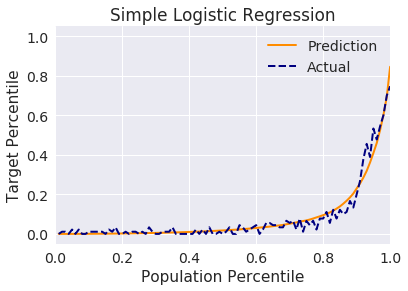

In [133]:
plotLiftChart(y_test.values,pred_probs_test,"Simple Logistic Regression")

In [134]:
# In this case we were able to predict the test data correctly with 89 % Area Under Curve (AUC) and also 75 variables was able
# to explain 94 % data variance , which is good.

# Lets build another logistic regression model with less number of components to see if result changes.

In [135]:
pca_last1 = PCA(n_components= 25)
df_train_pca1 = pca_last1.fit_transform(X_train)
df_test_pca1 = pca_last1.transform(X_test)
df_test_pca1.shape

(9005, 25)

In [136]:
#training the regression model
learner_pca1 = LogisticRegression()
model_pca1 = learner_pca1.fit(df_train_pca1,y_train)
#Making prediction on the test data
pred_probs_test1 = model_pca1.predict_proba(df_test_pca1)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test1))

'0.88'

In [137]:
pca_last2 = PCA(n_components=5)
df_train_pca2 = pca_last2.fit_transform(X_train)
df_test_pca2 = pca_last2.transform(X_test)
df_test_pca2.shape

(9005, 5)

In [138]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.78'

In [139]:
pca_last3 = PCA(n_components=120)
df_train_pca3 = pca_last3.fit_transform(X_train)
df_test_pca3 = pca_last3.transform(X_test)
df_test_pca3.shape

(9005, 120)

In [140]:
#training the regression model
learner_pca3 = LogisticRegression()
model_pca3 = learner_pca3.fit(df_train_pca3,y_train)
#Making prediction on the test data
pred_probs_test3 = model_pca3.predict_proba(df_test_pca3)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test3))

'0.89'

In [141]:
# The AUC drops if we reduce the number of components of PCA but it does not increase even if we are increasing the components
# so 75 looks to be decent number of components which is selected by us by PCA initially.
# Also, the number of components have been considerably reduced from 170 to 75 by PCA !!

### Logistic Regression model with dealing class imbalance and penalising after PCA:

In [142]:
# Using balanced class weight and penalty parameter:
logmodel_bal1 = LogisticRegression(class_weight='balanced',penalty='l2',random_state=9999,solver='newton-cg',
                                      C=1000000,n_jobs=-1)

In [143]:
logmodel_bal1.fit(df_train_pca,y_train)

LogisticRegression(C=1000000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=9999,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

             precision    recall  f1-score   support

          0       0.98      0.84      0.90      8293
          1       0.30      0.81      0.44       712

avg / total       0.93      0.83      0.87      9005

Accuracy for the test dataset 83.4%
ROC for the test dataset 82.4%


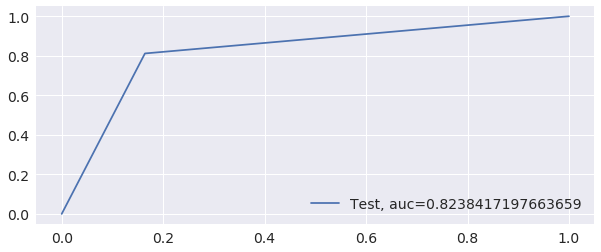

In [144]:
predictions = logmodel_bal1.predict(df_test_pca)
prediction_probs = logmodel_bal1.predict_proba(df_test_pca)[:,1]
print(classification_report(y_test, predictions))
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [145]:
#Making prediction on the test data
pred_probs_test= logmodel_bal1.predict_proba(df_test_pca)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

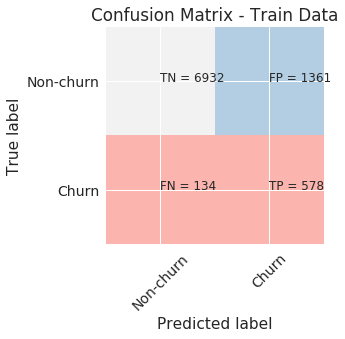

In [146]:
cm = confusion_matrix(y_test, predictions)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

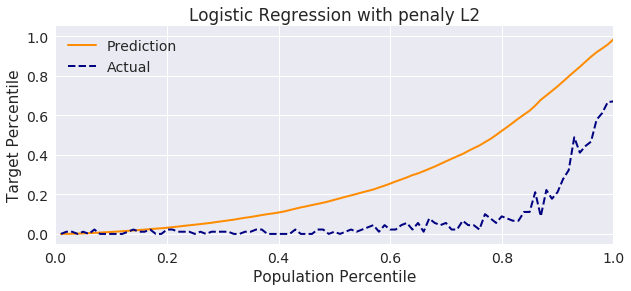

In [147]:
plotLiftChart(y_test.values,prediction_probs,"Logistic Regression with penaly L2")

In [148]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_probs_test)
y_pred_df.head()

0
0 0.48
1 0.19
2 0.23
3 0.24
4 0.04

In [149]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[0]]
y_pred_1.head()

0
0 0.48
1 0.19
2 0.23
3 0.24
4 0.04

In [150]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
56614      1
83708      0
20895      0
91475      0
1993       0

In [151]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [152]:
y_pred_1.head()

0
0 0.48
1 0.19
2 0.23
3 0.24
4 0.04

In [153]:
y_test_df.head()

churn
0      1
1      0
2      0
3      0
4      0

In [154]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final.head()

churn    0
0      1 0.48
1      0 0.19
2      0 0.23
3      0 0.24
4      0 0.04

In [155]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['churn','Churn_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

churn  Churn_Prob
0      1        0.48
1      0        0.19
2      0        0.23
3      0        0.24
4      0        0.04

In [156]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_pred_final.head(10)

churn  Churn_Prob  predicted
0      1        0.48          0
1      0        0.19          0
2      0        0.23          0
3      0        0.24          0
4      0        0.04          0
5      1        0.78          1
6      1        0.95          1
7      0        0.00          0
8      0        0.18          0
9      0        0.23          0

In [157]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[6932, 1361],
       [ 134,  578]])

In [158]:
# Predicted     not_churn    churn
# Actual
# not_churn        6932      1361
# churn            134       578

In [159]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.churn, y_pred_final.predicted)

0.8339811215991116

In [160]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(TP)
print(TN)
print(FP)
print(FN)

6932
578
1361
134


In [161]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      1        0.48          0    1    1    1    1    1    0    0    0    0   
1      0        0.19          0    1    1    0    0    0    0    0    0    0   
2      0        0.23          0    1    1    1    0    0    0    0    0    0   
3      0        0.24          0    1    1    1    0    0    0    0    0    0   
4      0        0.04          0    1    0    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [162]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.08   0.00   1.00
0.10  0.10      0.45   0.40   0.96
0.20  0.20      0.60   0.57   0.94
0.30  0.30      0.70   0.68   0.90
0.40  0.40      0.78   0.77   0.86
0.50  0.50      0.83   0.84   0.81
0.60  0.60      0.87   0.88   0.76
0.70  0.70      0.90   0.92   0.69
0.80  0.80      0.93   0.96   0.56
0.90  0.90      0.93   0.98   0.34


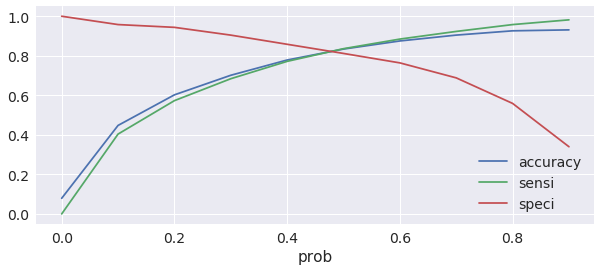

In [163]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [164]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.47 else 0)

In [165]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.churn, y_pred_final.final_predicted)

0.819988895058301

In [166]:
confusion_new = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.final_predicted )
confusion_new

array([[6796, 1497],
       [ 124,  588]])

In [167]:
TP = confusion_new[0,0] # true positive 
TN = confusion_new[1,1] # true negatives
FP = confusion_new[0,1] # false positives
FN = confusion_new[1,0] # false negatives
print(TP)
print(TN)
print(FP)
print(FN)

6796
588
1497
124


## Inference:
So we were able to reduce the False Negative from 134 to 124 here. This is actual churn but not predicted as Churn.
Although, there is drop in the accuracy score marginally but that is not major concern for us.

This is important from the problem point of view to identify such churn customers correctly !


### Create Stratefied Kfold Samples and Use GridSearch with penalty on Logistic Regression:

The dataset in the problem statement is highly imbalanced.
The regular K-Fold cross validation may not be applicable for an imbalanced dataset. As the folds created may not retain class proportions, even if they did, most classifiers need some manipulation of the dataset to balance it (oversampling of positive class or under sampling of negative class).
To Cross validate an imbalanced dataset, we might have to apply stratified cross validation. Stratification seeks to ensure that each fold is representative of all classes of the data. 

Random Sampling: The given dataset is highly imbalanced. Churn classes is only 8% of the entire dataset. With such a dataset random sampling might not be able to pick up enough data of both the classes
Stratified Sampling: Stratified sampling will be able to sample enough data of both the classes. But, considering that the churn class is only 8% of the entire dataset, stratified sampling might significantly reduce the number of cases, so it should ideally be coupled with a resampling technique to ensure balance in data.

In [168]:
# Importing stratified K-Fold :
from sklearn.model_selection  import StratifiedKFold
stratefied_Kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=9999)

In [169]:
# Importing Logistic Regression Cross Validation:
from sklearn.linear_model import LogisticRegressionCV

LRsearchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=stratefied_Kfold
        ,random_state=777
        ,max_iter=100
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=1
        ,verbose = 2
        ,n_jobs = -1
    
    )

In [170]:
# Fitting the grod search:
LRsearchCV.fit(df_train_pca,y_train)

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.1s finished


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0, 100000000.0, 1000000000.0],
           class_weight=None,
           cv=StratifiedKFold(n_splits=4, random_state=9999, shuffle=True),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=-1, penalty='l2',
           random_state=777, refit=True, scoring='roc_auc',
           solver='newton-cg', tol=1, verbose=2)

In [171]:
print("final selected 1/lambda is ", LRsearchCV.C_)
print("final selected lambda is ", 1/LRsearchCV.C_)

final selected 1/lambda is  [1.]
final selected lambda is  [1.]


             precision    recall  f1-score   support

          0       0.94      0.99      0.96      8293
          1       0.65      0.31      0.42       712

avg / total       0.92      0.93      0.92      9005

Accuracy for the test dataset 93.2%
ROC for the test dataset 89.3%


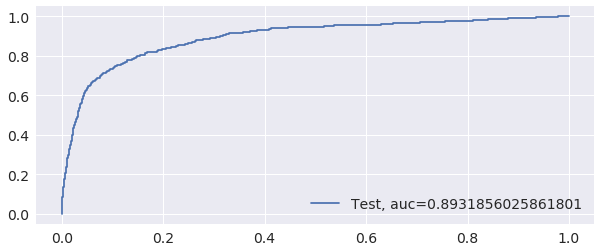

In [172]:
#train data on test:
preds_L2Search = LRsearchCV.predict(df_test_pca)
preds_L2Search_probs = LRsearchCV.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_L2Search))
accuracy = metrics.accuracy_score(y_test, preds_L2Search)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_L2Search_probs)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

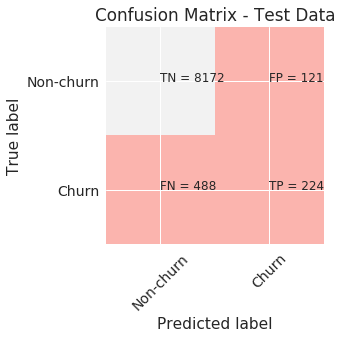

In [173]:
cm = confusion_matrix(y_test, preds_L2Search)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

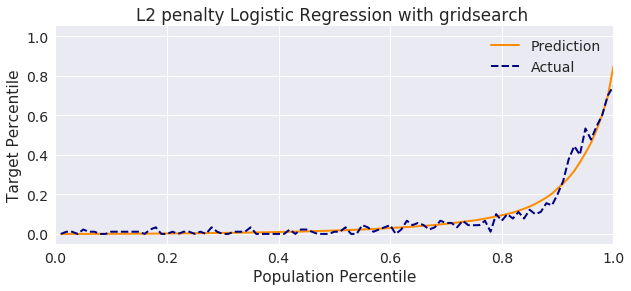

In [174]:
plotLiftChart(y_test.values,preds_L2Search_probs,"L2 penalty Logistic Regression with gridsearch ")

## Random Forest Model:

Lets build random forest model with default parameteres first

### Random Forest with balanced class and default parameter:

In [175]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameter and balanced subsample to tackle class imbalance.
rfc = RandomForestClassifier(class_weight='balanced_subsample')

In [176]:
# fit:
TrainedRFC= rfc.fit(df_train_pca,y_train)

             precision    recall  f1-score   support

          0       0.93      0.99      0.96      8293
          1       0.62      0.15      0.24       712

avg / total       0.91      0.93      0.90      9005

Accuracy for the test dataset 92.5%
ROC for the test dataset 81.3%


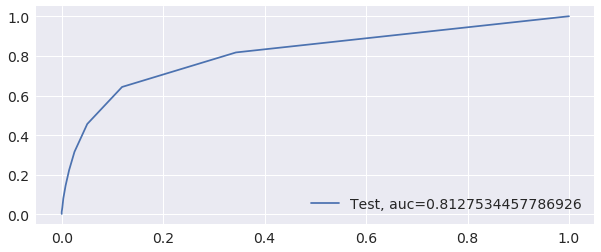

In [177]:
preds_RFC=TrainedRFC.predict(df_test_pca)
preds_probs_RFC=TrainedRFC.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

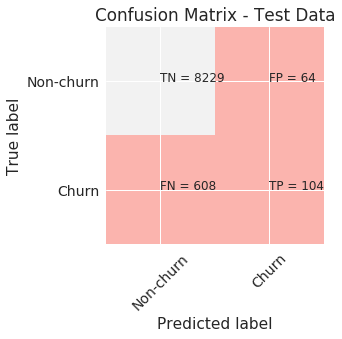

In [178]:
cm = confusion_matrix(y_test, preds_RFC)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

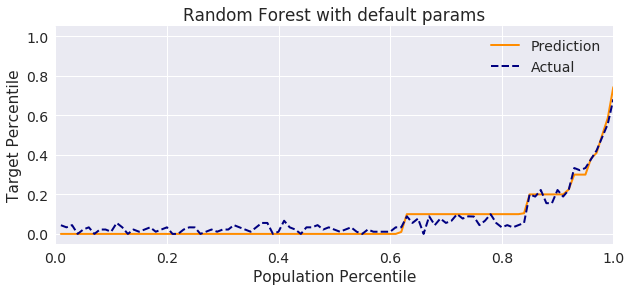

In [179]:
plotLiftChart(y_test.values,preds_probs_RFC,"Random Forest with default params")

In [180]:
importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

value           colName
0    0.07            arpu_7
1    0.06      offnet_mou_7
2    0.05       onnet_mou_8
3    0.04      offnet_mou_8
4    0.04            arpu_6
5    0.03     roam_og_mou_7
6    0.02       onnet_mou_6
7    0.02       onnet_mou_7
8    0.02      loc_ic_mou_7
9    0.02     roam_ic_mou_8
10   0.02      offnet_mou_6
11   0.02     roam_ic_mou_7
12   0.02  std_og_t2t_mou_8
13   0.02     roam_ic_mou_6
14   0.02  loc_og_t2f_mou_6
15   0.02     roam_og_mou_6
16   0.01  std_og_t2m_mou_6
17   0.01            arpu_8
18   0.01  loc_og_t2m_mou_6
19   0.01  loc_og_t2f_mou_7
20   0.01      std_og_mou_6
21   0.01    total_og_mou_7
22   0.01    total_og_mou_6
23   0.01  loc_og_t2f_mou_8
24   0.01  std_og_t2m_mou_8
25   0.01    total_og_mou_8
26   0.01  loc_og_t2t_mou_6
27   0.01      loc_og_mou_8
28   0.01  loc_ic_t2m_mou_8
29   0.01  std_og_t2f_mou_7
30   0.01  loc_og_t2c_mou_7
31   0.01  std_ic_t2f_mou_8
32   0.01  loc_og_t2t_mou_7
33   0.01  loc_ic_t2f_mou_8
34   0.01  loc_ic_t2m_mou_6
35   0.01  std_og_t2t_mou_6
36   0.01  loc_ic_t2t_mou_6
37   0.01  loc_og_t2c_mou_8
38   0.01  std_ic_t2t_mou_8
39   0.01      spl_og_mou_7
40   0.01      isd_og_mou_6
41   0.01  loc_og_t2m_mou_7
42   0.01  loc_ic_t2t_mou_8
43   0.01      loc_og_mou_6
44   0.01  std_ic_t2f_mou_6
45   0.01  std_ic_t2t_mou_7
46   0.01  loc_ic_t2m_mou_7
47   0.01     roam_og_mou_8
48   0.01      loc_ic_mou_6
49   0.01      loc_og_mou_7
50   0.01  loc_og_t2t_mou_8
51   0.01  std_og_t2t_mou_7
52   0.01  loc_og_t2m_mou_8
53   0.01  loc_ic_t2f_mou_6
54   0.01      spl_og_mou_8
55   0.01       og_others_8
56   0.01       og_others_7
57   0.01  std_ic_t2t_mou_6
58   0.01  std_ic_t2m_mou_7
59   0.01  std_ic_t2m_mou_6
60   0.01  std_og_t2f_mou_8
61   0.01      loc_ic_mou_8
62   0.01       og_others_6
63   0.01  loc_og_t2c_mou_6
64   0.01      std_ic_mou_7
65   0.01  std_og_t2m_mou_7
66   0.01  std_ic_t2m_mou_8
67   0.01      std_og_mou_8
68   0.01  loc_ic_t2f_mou_7
69   0.01  std_og_t2f_mou_6
70   0.01  std_ic_t2f_mou_7
71   0.01      std_og_mou_7
72   0.01      spl_og_mou_6
73   0.01  loc_ic_t2t_mou_7
74   0.00      std_ic_mou_6

#### The above graph suggest that there is overfitting. Also the F1 score is almost 1.
We will use GridSearch on each parameter to check the optimal range. Since it is classification we use auc_score for our scoring metric

### Random Forest with tuned hyperparameters:

In [181]:
# Since it is a classification problem, we will take the metric as auc instead of accuracy for the model:

# GridSearchCV to find optimal n_estimators and max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
scoring = {'AUC': 'roc_auc'}

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 1)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample')


# fit tree on training data
grid_search = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',verbose=1,
                          return_train_score=True)
grid_search.fit(df_train_pca, y_train)
train_results = grid_search.cv_results_


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.3min finished


In [182]:
#Add the results to dataframe
pd.DataFrame(train_results).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           0.29          0.00             0.01            0.00   
1           0.39          0.00             0.01            0.00   
2           0.49          0.00             0.01            0.00   
3           0.59          0.00             0.01            0.00   
4           0.67          0.01             0.01            0.00   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               2  {'max_depth': 2}               0.84               0.79   
1               3  {'max_depth': 3}               0.86               0.84   
2               4  {'max_depth': 4}               0.87               0.86   
3               5  {'max_depth': 5}               0.87               0.85   
4               6  {'max_depth': 6}               0.89               0.85   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0               0.83               0.86               0.84             0.83   
1               0.84               0.87               0.85             0.85   
2               0.85               0.88               0.85             0.86   
3               0.87               0.88               0.88             0.87   
4               0.87               0.88               0.89             0.88   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0            0.02               18                0.85                0.84   
1            0.01               11                0.87                0.88   
2            0.01                6                0.88                0.89   
3            0.01                4                0.90                0.91   
4            0.01                1                0.93                0.93   

   split2_train_score  split3_train_score  split4_train_score  \
0                0.84                0.85                0.84   
1                0.86                0.88                0.86   
2                0.89                0.89                0.88   
3                0.91                0.91                0.91   
4                0.92                0.92                0.93   

   mean_train_score  std_train_score  
0              0.84             0.01  
1              0.87             0.01  
2              0.89             0.00  
3              0.91             0.01  
4              0.93             0.00

Text(0, 0.5, 'AUC Score')

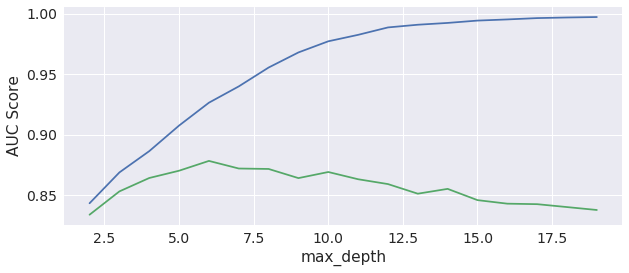

In [183]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(train_results["param_max_depth"], 
         train_results["mean_train_score"], 
         label="train auc score")
plt.plot(train_results["param_max_depth"], 
         train_results["mean_test_score"], 
         label="test auc score")
plt.xlabel("max_depth")
plt.ylabel("AUC Score")

In [184]:
# From above plot the max_depth can be taken as 6 as the test score is maximum for this.

#Fit the range of features
parameters = {'n_estimators': range(400, 1000, 200)}

# instantiate the model ()
rf = RandomForestClassifier(class_weight='balanced_subsample')

# fit tree on training data
grid_search = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',n_jobs=-1,verbose=10,return_train_score=True)
grid_search.fit(df_train_pca, y_train)
train_results = grid_search.cv_results_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=400 ................................................
[CV] n_estimators=400 ................................................
[CV] n_estimators=400 ................................................
[CV] n_estimators=400 ................................................
[CV] ....... n_estimators=400, score=0.9127740733798093, total= 1.1min
[CV] n_estimators=400 ................................................
[CV] ....... n_estimators=400, score=0.8847310073782952, total= 1.1min
[CV] n_estimators=600 ................................................
[CV] ....... n_estimators=400, score=0.8943940068239132, total= 1.1min
[CV] n_estimators=600 ................................................
[CV] .......... n_estimators=400, score=0.9075503318379, total= 1.1min
[CV] n_estimators=600 ................................................
[CV] ....... n_estimators=400, score=0.9041301061927417, total= 1.1min
[CV] n_estimators

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.3min


[CV] ........ n_estimators=600, score=0.886968225130696, total= 1.7min
[CV] n_estimators=600 ................................................
[CV] ....... n_estimators=600, score=0.8964934727785195, total= 1.7min
[CV] n_estimators=800 ................................................
[CV] ........ n_estimators=600, score=0.905185569685959, total= 1.7min
[CV] n_estimators=800 ................................................
[CV] ....... n_estimators=600, score=0.9134695778176485, total= 1.7min
[CV] n_estimators=800 ................................................
[CV] ....... n_estimators=600, score=0.9029336154031545, total= 1.7min
[CV] n_estimators=800 ................................................


[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  4.7min remaining:  2.3min


[CV] ....... n_estimators=800, score=0.8877082792629121, total= 2.3min
[CV] n_estimators=800 ................................................
[CV] ....... n_estimators=800, score=0.9084676133625005, total= 2.3min


[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  5.3min remaining:  1.3min


[CV] ....... n_estimators=800, score=0.8997589378430499, total= 2.3min
[CV] ....... n_estimators=800, score=0.9138340667743767, total= 2.0min
[CV] ....... n_estimators=800, score=0.9045526158405413, total= 1.7min


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.9min finished


In [185]:
pd.DataFrame(train_results).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          67.78          0.55             0.38            0.01   
1         103.05          0.96             0.56            0.01   
2         126.39         15.28             0.67            0.09   

  param_n_estimators                 params  split0_test_score  \
0                400  {'n_estimators': 400}               0.91   
1                600  {'n_estimators': 600}               0.91   
2                800  {'n_estimators': 800}               0.91   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0               0.88               0.89               0.91               0.90   
1               0.89               0.90               0.91               0.90   
2               0.89               0.90               0.91               0.90   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0             0.90            0.01                3                1.00   
1             0.90            0.01                2                1.00   
2             0.90            0.01                1                1.00   

   split1_train_score  split2_train_score  split3_train_score  \
0                1.00                1.00                1.00   
1                1.00                1.00                1.00   
2                1.00                1.00                1.00   

   split4_train_score  mean_train_score  std_train_score  
0                1.00              1.00             0.00  
1                1.00              1.00             0.00  
2                1.00              1.00             0.00

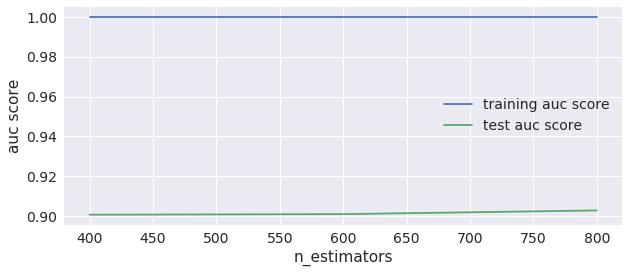

In [186]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(train_results["param_n_estimators"], 
         train_results["mean_train_score"], 
         label="training auc score")
plt.plot(train_results["param_n_estimators"], 
         train_results["mean_test_score"], 
         label="test auc score")

plt.xlabel("n_estimators")
plt.ylabel("auc score")
plt.legend()
plt.show()

In [187]:
# The ideal value looks between 200 and 1000 for n_estimators as test score is higher

In [188]:
# parameters to build the model on max_features
parameters = {'max_features':range(30, 75, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample')


# fit tree on training data
grid_search = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',n_jobs=-1, verbose=10,return_train_score=True)
grid_search.fit(df_train_pca, y_train)
train_results = grid_search.cv_results_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_features=30 .................................................
[CV] max_features=30 .................................................
[CV] max_features=30 .................................................
[CV] max_features=30 .................................................
[CV] ........ max_features=30, score=0.8046108783508213, total=   6.2s
[CV] max_features=30 .................................................
[CV] ........ max_features=30, score=0.8293135291499778, total=   6.2s
[CV] max_features=35 .................................................
[CV] ........ max_features=30, score=0.8353361629578056, total=   6.3s
[CV] max_features=35 .................................................
[CV] ........ max_features=30, score=0.8355352044788846, total=   6.5s
[CV] max_features=35 .................................................
[CV] ........ max_features=30, score=0.8445305828550347, total=   6.3s
[CV] max_features

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   12.7s


[CV] ........ max_features=35, score=0.8078469467205517, total=   7.1s
[CV] ........ max_features=35, score=0.8312179748618886, total=   7.3s
[CV] max_features=35 .................................................
[CV] max_features=40 .................................................
[CV] ........ max_features=35, score=0.8130885625278148, total=   7.2s
[CV] max_features=40 .................................................
[CV] ......... max_features=35, score=0.828798049314612, total=   7.0s
[CV] max_features=40 .................................................
[CV] ........ max_features=35, score=0.8397587529419466, total=   7.1s
[CV] max_features=40 .................................................


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   20.8s


[CV] ........ max_features=40, score=0.7993678395313484, total=   8.5s
[CV] max_features=40 .................................................
[CV] ........ max_features=40, score=0.8386652330280673, total=   8.8s
[CV] max_features=45 .................................................
[CV] ........ max_features=40, score=0.8450300400534045, total=   8.3s
[CV] max_features=45 .................................................
[CV] ........ max_features=40, score=0.8389066670237169, total=   8.3s
[CV] max_features=45 .................................................
[CV] ........ max_features=40, score=0.8478225132183036, total=   8.8s
[CV] max_features=45 .................................................
[CV] ........ max_features=45, score=0.8399948092395536, total=  10.0s
[CV] max_features=45 .................................................
[CV] ......... max_features=45, score=0.821351451559082, total=   9.5s
[CV] max_features=50 .................................................


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   37.6s


[CV] ........ max_features=45, score=0.8172426197893488, total=   9.4s
[CV] max_features=50 .................................................
[CV] ........ max_features=45, score=0.8464850619036143, total=   9.0s
[CV] max_features=50 .................................................
[CV] ........ max_features=45, score=0.8394723687616599, total=   9.6s
[CV] max_features=50 .................................................
[CV] ........ max_features=50, score=0.8369048236995291, total=  11.1s
[CV] max_features=50 .................................................
[CV] ........ max_features=50, score=0.8147699380816433, total=  10.7s
[CV] max_features=55 .................................................
[CV] ........ max_features=50, score=0.8130778074469664, total=  11.0s
[CV] max_features=55 .................................................
[CV] ........ max_features=50, score=0.8377588987375293, total=  11.2s
[CV] max_features=55 .................................................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   53.6s


[CV] ........ max_features=50, score=0.8374204447062814, total=  11.0s
[CV] max_features=55 .................................................
[CV] ........ max_features=55, score=0.8399610692966522, total=  11.9s
[CV] max_features=55 .................................................
[CV] ........ max_features=55, score=0.8125931556115829, total=  11.7s
[CV] max_features=60 .................................................
[CV] ........ max_features=55, score=0.8167245215843347, total=  11.9s
[CV] max_features=60 .................................................
[CV] ........ max_features=55, score=0.8351356940316048, total=  11.5s
[CV] max_features=60 .................................................
[CV] ........ max_features=55, score=0.8445540142879671, total=  11.4s
[CV] max_features=60 .................................................
[CV] ........ max_features=60, score=0.8293641318453154, total=  13.6s
[CV] max_features=60 .................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min


[CV] ........ max_features=60, score=0.8297118751989812, total=  13.3s
[CV] max_features=65 .................................................
[CV] ........ max_features=60, score=0.8373319259596473, total=  13.7s
[CV] max_features=65 .................................................
[CV] ........ max_features=65, score=0.8481687738682289, total=  15.2s
[CV] max_features=65 .................................................
[CV] ........ max_features=65, score=0.8124448481702569, total=  14.0s
[CV] max_features=70 .................................................
[CV] ........ max_features=65, score=0.8123160510310043, total=  13.7s
[CV] max_features=70 .................................................
[CV] ........ max_features=65, score=0.8242765266136447, total=  14.0s
[CV] max_features=70 .................................................
[CV] ........ max_features=65, score=0.8341869069615904, total=  14.3s
[CV] max_features=70 .................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:  2.0min remaining:    5.6s


[CV] ........ max_features=70, score=0.8286198960388232, total=  13.7s
[CV] ........ max_features=70, score=0.8394150919256027, total=  11.9s


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.1min finished


In [189]:
pd.DataFrame(train_results).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           6.29          0.13             0.01            0.00   
1           7.13          0.11             0.01            0.00   
2           8.54          0.23             0.01            0.00   
3           9.48          0.30             0.01            0.00   
4          10.99          0.17             0.01            0.00   

  param_max_features                params  split0_test_score  \
0                 30  {'max_features': 30}               0.84   
1                 35  {'max_features': 35}               0.83   
2                 40  {'max_features': 40}               0.84   
3                 45  {'max_features': 45}               0.84   
4                 50  {'max_features': 50}               0.84   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0               0.80               0.83               0.84               0.84   
1               0.81               0.81               0.83               0.84   
2               0.80               0.85               0.84               0.85   
3               0.82               0.82               0.85               0.84   
4               0.81               0.81               0.84               0.84   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0             0.83            0.01                4                1.00   
1             0.82            0.01                9                1.00   
2             0.83            0.02                1                1.00   
3             0.83            0.01                3                1.00   
4             0.83            0.01                6                1.00   

   split1_train_score  split2_train_score  split3_train_score  \
0                1.00                1.00                1.00   
1                1.00                1.00                1.00   
2                1.00                1.00                1.00   
3                1.00                1.00                1.00   
4                1.00                1.00                1.00   

   split4_train_score  mean_train_score  std_train_score  
0                1.00              1.00             0.00  
1                1.00              1.00             0.00  
2                1.00              1.00             0.00  
3                1.00              1.00             0.00  
4                1.00              1.00             0.00

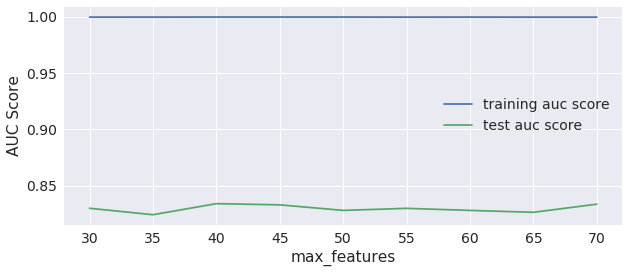

In [190]:
# plotting accuracies with param_max_features
plt.figure()
plt.plot(train_results["param_max_features"], 
         train_results["mean_train_score"], 
         label="training auc score")
plt.plot(train_results["param_max_features"], 
         train_results["mean_test_score"], 
         label="test auc score")
plt.xlabel("max_features")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [191]:
# So , we can take the parameter max_features between as the test score is higher in this range.

In [192]:
# Random Forest model with the best hyperparameters:

# Create a best model 
rfc_best = RandomForestClassifier(class_weight='balanced_subsample',bootstrap=True,
                                 max_features=45, n_estimators=800, criterion= 'entropy', max_depth=6) 

In [193]:
# fit
# This is expected to run longer , please be patient:
rfc_best.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=6, max_features=45,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=800, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [194]:
# Let's check the report of our optimal model on training data
predictions_train = rfc_best.predict(df_train_pca)
print(classification_report(y_train, predictions_train))
predictions = rfc_best.predict(df_test_pca)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.98      0.90      0.94     19262
          1       0.42      0.82      0.55      1748

avg / total       0.94      0.89      0.91     21010

             precision    recall  f1-score   support

          0       0.97      0.90      0.93      8293
          1       0.37      0.71      0.49       712

avg / total       0.92      0.88      0.90      9005



In [195]:
# Printing confusion matrix
print(confusion_matrix(y_train,rfc_best.predict(df_train_pca)))

# Printing confusion matrix
print(confusion_matrix(y_test,rfc_best.predict(df_test_pca)))

[[17276  1986]
 [  316  1432]]
[[7435  858]
 [ 209  503]]


In [196]:
preds_probs_RFC= rfc_best.predict_proba(df_test_pca)[:,1]

In [197]:
def Performance(Model,Y,X):
    # Perforamnce of the model
    fpr, tpr, _ = roc_curve(Y, Model.predict_proba(X)[:,1])
    AUC  = auc(fpr, tpr)
    print ('the AUC is : %0.4f' %  AUC)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

the AUC is : 0.8942


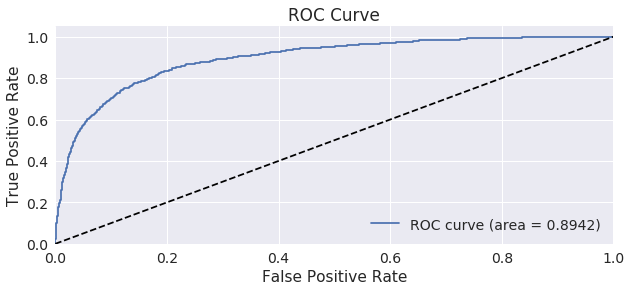

In [198]:
Performance(Model=rfc_best,Y=y_test,X=df_test_pca)

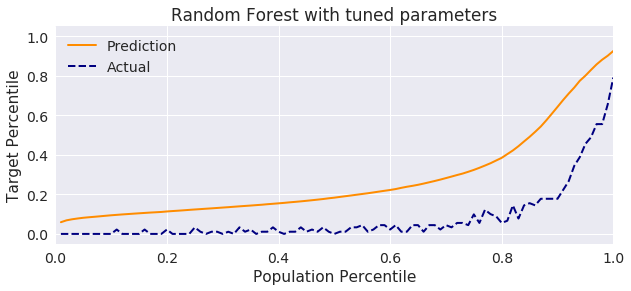

In [199]:
plotLiftChart(y_test.values,preds_probs_RFC,"Random Forest with tuned parameters")

In [200]:
# Let's find the important features selected by the model:

importances = rfc_best.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

value           colName
0    0.26            arpu_7
1    0.20      offnet_mou_7
2    0.11       onnet_mou_8
3    0.09      offnet_mou_8
4    0.05            arpu_6
5    0.04       onnet_mou_6
6    0.03     roam_og_mou_7
7    0.02     roam_ic_mou_8
8    0.01       onnet_mou_7
9    0.01     roam_og_mou_6
10   0.01      loc_ic_mou_7
11   0.01     roam_ic_mou_6
12   0.01            arpu_8
13   0.01     roam_ic_mou_7
14   0.01  std_og_t2t_mou_8
15   0.01      offnet_mou_6
16   0.01      loc_og_mou_6
17   0.01  loc_og_t2f_mou_6
18   0.00      loc_og_mou_8
19   0.00  loc_og_t2m_mou_6
20   0.00  loc_og_t2t_mou_6
21   0.00    total_og_mou_7
22   0.00    total_og_mou_8
23   0.00  loc_og_t2f_mou_8
24   0.00  loc_og_t2f_mou_7
25   0.00  std_ic_t2f_mou_8
26   0.00  loc_og_t2c_mou_7
27   0.00  loc_og_t2m_mou_8
28   0.00  loc_ic_t2m_mou_8
29   0.00     roam_og_mou_8
30   0.00    total_og_mou_6
31   0.00  loc_ic_t2t_mou_6
32   0.00      loc_og_mou_7
33   0.00       og_others_8
34   0.00  loc_ic_t2f_mou_8
35   0.00      spl_og_mou_7
36   0.00  std_ic_t2t_mou_6
37   0.00      std_og_mou_6
38   0.00  std_og_t2m_mou_6
39   0.00       og_others_7
40   0.00  loc_og_t2m_mou_7
41   0.00  loc_og_t2c_mou_8
42   0.00  loc_og_t2t_mou_7
43   0.00  std_og_t2f_mou_7
44   0.00  std_ic_t2t_mou_8
45   0.00      spl_og_mou_6
46   0.00  std_ic_t2f_mou_7
47   0.00  loc_og_t2c_mou_6
48   0.00  loc_ic_t2f_mou_6
49   0.00      loc_ic_mou_8
50   0.00  loc_ic_t2t_mou_8
51   0.00  loc_ic_t2m_mou_6
52   0.00      std_ic_mou_7
53   0.00       og_others_6
54   0.00  std_og_t2t_mou_7
55   0.00      isd_og_mou_6
56   0.00  std_og_t2f_mou_6
57   0.00  std_og_t2m_mou_7
58   0.00  std_og_t2m_mou_8
59   0.00  std_ic_t2m_mou_7
60   0.00      loc_ic_mou_6
61   0.00  loc_ic_t2t_mou_7
62   0.00  std_og_t2t_mou_6
63   0.00      std_og_mou_8
64   0.00  std_ic_t2m_mou_8
65   0.00  loc_og_t2t_mou_8
66   0.00  std_ic_t2t_mou_7
67   0.00  std_ic_t2m_mou_6
68   0.00      std_ic_mou_6
69   0.00      std_og_mou_7
70   0.00      spl_og_mou_8
71   0.00  std_ic_t2f_mou_6
72   0.00  loc_ic_t2f_mou_7
73   0.00  loc_ic_t2m_mou_7
74   0.00  std_og_t2f_mou_8

In [201]:
print(max(rfc_best.feature_importances_))

0.2594253766947265


In [202]:
#Making prediction on the test data
pred_probs_test= rfc_best.predict_proba(df_test_pca)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

In [203]:
y_pred_df = pd.DataFrame(pred_probs_test)
y_pred_df.head()

0
0 0.76
1 0.17
2 0.19
3 0.25
4 0.14

In [204]:
y_pred_1 = y_pred_df.iloc[:,[0]]
y_pred_1.head()

0
0 0.76
1 0.17
2 0.19
3 0.25
4 0.14

In [205]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
56614      1
83708      0
20895      0
91475      0
1993       0

In [206]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [207]:
y_pred_1.head()

0
0 0.76
1 0.17
2 0.19
3 0.25
4 0.14

In [208]:
y_test_df.head()

churn
0      1
1      0
2      0
3      0
4      0

In [209]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final.head()

churn    0
0      1 0.76
1      0 0.17
2      0 0.19
3      0 0.25
4      0 0.14

In [210]:

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})


# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['churn','Churn_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

churn  Churn_Prob
0      1        0.76
1      0        0.17
2      0        0.19
3      0        0.25
4      0        0.14

In [211]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

churn  Churn_Prob  predicted
0      1        0.76          1
1      0        0.17          0
2      0        0.19          0
3      0        0.25          0
4      0        0.14          0

In [212]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[7435,  858],
       [ 209,  503]])

In [213]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.churn, y_pred_final.predicted)

0.8815102720710716

In [214]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      1        0.76          1    1    1    1    1    1    1    1    1    0   
1      0        0.17          0    1    1    0    0    0    0    0    0    0   
2      0        0.19          0    1    1    0    0    0    0    0    0    0   
3      0        0.25          0    1    1    1    0    0    0    0    0    0   
4      0        0.14          0    1    1    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [215]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.08   0.00   1.00
0.10  0.10      0.20   0.13   1.00
0.20  0.20      0.61   0.58   0.94
0.30  0.30      0.78   0.77   0.86
0.40  0.40      0.85   0.85   0.78
0.50  0.50      0.88   0.90   0.71
0.60  0.60      0.90   0.93   0.63
0.70  0.70      0.92   0.95   0.56
0.80  0.80      0.93   0.98   0.42
0.90  0.90      0.93   1.00   0.15


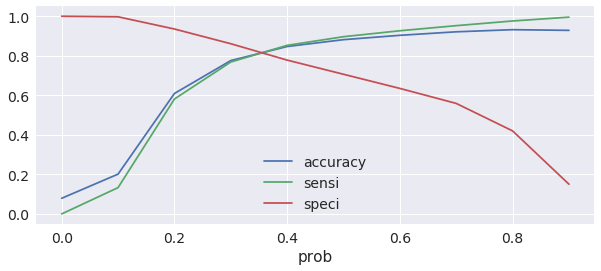

In [216]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [217]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)

In [218]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.churn, y_pred_final.final_predicted)

0.8468628539700167

In [219]:
metrics.confusion_matrix( y_pred_final.churn, y_pred_final.final_predicted )

array([[7072, 1221],
       [ 158,  554]])

## XGBoost model :

In [220]:
import sys
!{sys.executable} -m pip install xgboost

    100% |████████████████████████████████| 109.8MB 425kB/s eta 0:00:01
You are using pip version 19.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [221]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [222]:
# Create a copy of the main dataframe for xgboost:

xgboost_df = churn_cust_main

In [223]:
churn_cat_var_list = xgboost_df.select_dtypes(exclude=[np.number]).columns.tolist()
churn_cat_var_list

# As xgboost can not handle object type data:
for c in churn_cat_var_list:
    xgboost_df[churn_cat_var_list] = xgboost_df[churn_cat_var_list].astype('category')

In [224]:
# Converting from categorical to float data type as these features already have numerical values:
xgboost_df = xgboost_df.astype({'night_pck_user_6':'float64', 'night_pck_user_7':'float64', 'night_pck_user_8':'float64', 'fb_user_6':'float64', 'fb_user_7':'float64', 'fb_user_8':'float64', 'rech_amt_6':'float64', 'rech_amt_7':'float64', 'rech_amt_8':'float64', 'rech_data_6':'float64', 'rech_data_7':'float64', 'rech_data_8':'float64', 'date_of_last_rech_dayofwk_6':'float64', 'date_of_last_rech_dayofwk_7':'float64', 'date_of_last_rech_dayofwk_8':'float64', 'date_of_last_rech_data_dayofwk_6':'float64', 'date_of_last_rech_data_dayofwk_7':'float64', 'date_of_last_rech_data_dayofwk_8':'float64'}) 

In [225]:
# Verifying that no non-numeric data exists:
churn_cat_var_list = xgboost_df.select_dtypes(exclude=[np.number]).columns.tolist()
churn_cat_var_list

[]

In [226]:
# Putting feature variable to X
X = xgboost_df.drop(['churn'],axis=1)

# Putting response variable to y
y = xgboost_df['churn']

y.head()

0     1
7     1
8     0
16    0
21    0
Name: churn, dtype: int64

In [227]:
X.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.38  214.82  213.80         0.00         0.00         0.00   
7  1069.18 1349.85 3171.48        57.84        54.68        52.29   
8   378.72  492.22  137.36       413.69       351.03        35.08   
16  430.98  299.87  187.89        50.51        74.01        70.61   
21  514.45  597.75  637.76       102.41       132.11        85.14   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
16        296.29        229.74        162.76           0.00           2.83   
21        757.93        896.68        983.39           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
16           0.00           0.00          17.74           0.00   
21           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
16             42.61             65.16             67.38            273.29   
21              4.48              6.16             23.34             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
16            145.99            128.28              0.00              4.48   
21             87.93            104.81              0.75              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              53.23              0.00              0.00              0.00   
8               0.00              0.00              0.00              7.15   
16             10.26              0.00              0.00              0.00   
21              1.58              0.00              0.00              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
16        315.91        215.64        205.93              7.89   
21         97.04         94.09        129.74             97.93   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
16              2.58              3.23             22.99             64.51   
21            125.94             61.79            665.36            808.74   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
21            876.99              0.00              0.00    

In [228]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [229]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [230]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[9.8411334e-01, 1.5886646e-02],
       [9.9866873e-01, 1.3312788e-03],
       [9.9735111e-01, 2.6488740e-03],
       [9.9996322e-01, 3.6764879e-05],
       [9.9993521e-01, 6.4773485e-05],
       [5.6498873e-01, 4.3501130e-01],
       [6.1686814e-02, 9.3831319e-01],
       [9.9991876e-01, 8.1224229e-05],
       [9.9975532e-01, 2.4469479e-04],
       [9.5442587e-01, 4.5574140e-02]], dtype=float32)

In [231]:
predictions_train = model.predict(X_train)
print(classification_report(y_train, predictions_train))
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19262
          1       1.00      1.00      1.00      1748

avg / total       1.00      1.00      1.00     21010

             precision    recall  f1-score   support

          0       0.96      0.98      0.97      8293
          1       0.70      0.50      0.58       712

avg / total       0.94      0.94      0.94      9005



In [232]:
# evaluate predictions
import sklearn.metrics as metrics
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("Area under the curve: %.2f%%" % (roc * 100.0))

Area under the curve: 94.02%


In [233]:
# hyperparameter tuning with XGBoost
from sklearn.model_selection import GridSearchCV
# creating 3 Fold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.05,0.2,0.6], 
             'subsample': [0.3, 0.6, 0.9],
             'max_depth': [2,5,8],
             'n_estimators': [200,250]}          


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'f1_weighted', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

In [234]:
# This step might take time, be patient:

In [ ]:
# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.05,0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    plt.subplot(1,len(param_grid['subsample']), n+1)
    plot_df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(plot_df["param_learning_rate"], plot_df["mean_test_score"])
    plt.plot(plot_df["param_learning_rate"], plot_df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='lower left')
    plt.xscale('log')

In [ ]:
# chosen hyperparameters
# from the above graph it is evident that learning_rate = 0.1 and subsample=0.9  produces a model with higher AUC without overfitting.
#so using those parameters for the final model.

params = {'learning_rate': 0.1,
          'max_depth': 8, 
          'n_estimators':250,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

In [ ]:
# predict
#y_pred_actual was for the predictions interms of churns
#y_pred is for probabilistic predictions used for AUC.
y_pred_actual = model.predict(X_test)
y_pred = model.predict_proba(X_test)
y_pred[:10]

In [ ]:
predictions_train = model.predict(X_train)
print(classification_report(y_train, predictions_train))
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

In [ ]:
# roc_auc
import sklearn
auc = sklearn.metrics.roc_auc_score(y_test, y_pred[:, 1])
auc

### AUC is 0.942

In [ ]:
# Accuracy, specificity and sensitivity for train data (with Confusion matrix):

y_pred_train = model.predict(X_train)

# Confusion matrix sensitivity and specificity for training data
confusion_matrix_trainData = confusion_matrix(y_train,y_pred_train)
print(confusion_matrix_trainData)
total2=sum(sum(confusion_matrix_trainData))
accuracy2=(confusion_matrix_trainData[0,0]+confusion_matrix_trainData[1,1])/total2
print ('Accuracy : ', accuracy2)

sensitivity2 = confusion_matrix_trainData[0,0]/(confusion_matrix_trainData[0,0]+confusion_matrix_trainData[0,1])
print('Sensitivity : ', sensitivity2 )

specificity2 = confusion_matrix_trainData[1,1]/(confusion_matrix_trainData[1,0]+confusion_matrix_trainData[1,1])
print('Specificity : ', specificity2)

In [ ]:
# Accuracy, specificity and sensitivity for test data (with Confusion matrix):

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

confusion_matrix_testData = confusion_matrix(y_test,y_pred_actual)
print(confusion_matrix(y_test,y_pred_actual))
total1=sum(sum(confusion_matrix_testData))
accuracy1=(confusion_matrix_testData[0,0]+confusion_matrix_testData[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = confusion_matrix_testData[0,0]/(confusion_matrix_testData[0,0]+confusion_matrix_testData[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = confusion_matrix_testData[1,1]/(confusion_matrix_testData[1,0]+confusion_matrix_testData[1,1])
print('Specificity : ', specificity1)

In [ ]:
plotLiftChart(y_test.values,model.predict_proba(X_test)[:,1],"XGBoost with tuned parameters")

In [ ]:
# feature importance from XGBoost hyperparmeters tuning :
feature_importance = dict(zip(X_train.columns, model.feature_importances_))
feature_importance

In [ ]:
import operator
columns_sorted_descending_importance = sorted(feature_importance.items(), key=operator.itemgetter(1),reverse=True)

In [ ]:
columns_sorted_descending_importance

## Ada Boost (Adaptive Boost) Classifier Model:

### Ada Boost with Decision Tree Classifier:

In [ ]:
# Import:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)
# fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)
# test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

In [ ]:
# adaboost with the tree as base estimator:

estimators = list(range(50, 100, 3))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)

In [ ]:
abc_scores

In [ ]:
#after seseing the above score we can say that adaboost is providing better results when estimate is 1
ABC = AdaBoostClassifier(
base_estimator=shallow_tree, 
    n_estimators = 1)
    
ABC.fit(X_train, y_train)
predictions = ABC.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
accuracy = metrics.accuracy_score(y_test, predictions)
print("Classification Report:")
print(classification_report(y_test,predictions))
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Let's test on 100 trees
ABC = AdaBoostClassifier(
base_estimator=shallow_tree, 
    n_estimators = 100)
    
ABC.fit(X_train, y_train)
predictions = ABC.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
print(classification_report(y_test,predictions))
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Let's check the report of our default model on test data
print(confusion_matrix(y_test,ABC.predict(X_test)))

### Ada Boost with Random Forest Classifier:

In [ ]:
# parameter grid
param_grid = {"learning_rate": [0.005, 0.01, 0.05, 0.1, 0.5, 1]}

rfc_base = RandomForestClassifier(bootstrap=True,
                             max_depth=1,
                             class_weight='balanced_subsample')

# adaboost with the default tree as base estimator and SAMMME.R for faster convergence
ABC = AdaBoostClassifier(
    base_estimator=rfc_base,
    algorithm="SAMME.R", random_state=10, n_estimators=600)
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 5, n_jobs=-1)
# fit 
grid_search_ABC.fit(X_train, y_train)

In [ ]:
pd.DataFrame(grid_search_ABC.cv_results_).sort_values('rank_test_score')

In [ ]:
# plotting accuracies with param_min_samples_split
plt.figure()
plt.plot(pd.DataFrame(grid_search_ABC.cv_results_)["param_learning_rate"], 
         pd.DataFrame(grid_search_ABC.cv_results_)["mean_train_score"], 
         label="training auc score")
plt.plot(pd.DataFrame(grid_search_ABC.cv_results_)["param_learning_rate"], 
         pd.DataFrame(grid_search_ABC.cv_results_)["mean_test_score"], 
         label="test auc score")
plt.xlabel("learning rate")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [ ]:
# printing the optimal auc score and hyperparameters
print('We can get auc score of',grid_search_ABC.best_score_,'using',grid_search_ABC.best_params_)

In [ ]:
#Fit the optimal learning parameter on base tree
ABC_Optimal = AdaBoostClassifier(
base_estimator=rfc_base,
algorithm="SAMME.R", learning_rate=0.1)

ABC_Optimal.fit(X_train,y_train)

In [ ]:
# Let's check the report of our default model on training data
print(classification_report(y_train,ABC_Optimal.predict(X_train)))

In [ ]:
# Let's check the report of our default model on test data
print(classification_report(y_test,ABC_Optimal.predict(X_test)))

In [ ]:
# Let's check the report of our default model on test data
print(confusion_matrix(y_test,ABC_Optimal.predict(X_test)))

In [ ]:
# feature importance from Adaboost with Random Forest classifier :
feature_importance = dict(zip(X_train.columns, ABC_Optimal.feature_importances_))
feature_importance


In [ ]:
import operator
columns_sorted_descending_importance = sorted(feature_importance.items(), key=operator.itemgetter(1),reverse=True)
columns_sorted_descending_importance

## Applying other resampling techniques:

### Synthetic Minority Over sampling Technique (SMOTE)

In [ ]:
# Till now we have used the other techniques such as balanced weight paramater in model and stratified cross validation for 
# handling the class imbalance problem in our dataset, lets proceed with the advanced technique using Random Over Sampling now.

In [ ]:
from imblearn.over_sampling import SMOTE

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = "minority",random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

In [ ]:
# So we have handled with the class imbalance by SMOTE correctly now.

## Logistic Regression with SMOTE and penalty:

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

searchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=stratefied_Kfold
        ,random_state=777
        ,max_iter=100
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=1
        ,verbose = 2
        ,n_jobs = -1
    
    )

In [ ]:
# fit:
searchCV.fit(X_train_res,y_train_res)

In [ ]:
#train data
preds_L2Search = searchCV.predict(X_test)
preds_L2Search_probs = searchCV.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_L2Search))
accuracy = metrics.accuracy_score(y_test, preds_L2Search)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_L2Search_probs)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [ ]:
cm = confusion_matrix(y_test, preds_L2Search)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

In [ ]:
plotLiftChart(y_test.values,preds_L2Search_probs,"Logistic Regression with SMOTE")

## Random Forest with SMOTE:


In [ ]:
# Random Forest with default parameter:
RFC_balanced = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=500, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_split=1e-07,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample")

In [ ]:
TrainedRFC= RFC_balanced.fit(X_train_res,y_train_res)

In [ ]:

preds_RFC=TrainedRFC.predict(X_test)
preds_probs_RFC=TrainedRFC.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [ ]:
cm = confusion_matrix(y_test, preds_RFC)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

In [ ]:
plotLiftChart(y_test.values,preds_probs_RFC,"Random Forest with SMOTE")

In [ ]:
# Finding important features:
importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

In [ ]:
plt.clf()
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5
sorted_feature_importance[0:50].plot(x='colName', y='value' , kind='bar', title='Random Forest Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Name')

plt.show()

## XGBoost with SMOTE:

In [ ]:
# Taking the model on resampled data with the tuned hyperparameter :

#xgb_model = XGBClassifier()
params = {'learning_rate': 0.1,
          'max_depth': 8, 
          'n_estimators':250,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_model = XGBClassifier(params = params)

XGB_model1 = xgb_model.fit(X_train_res,y_train_res)

In [ ]:
# This is to handle bug with the Xgbosst:
# https://github.com/dmlc/xgboost/issues/1238

X_train = X_train.as_matrix()
X_test = X_test.as_matrix()

In [ ]:
predictions_train = XGB_model1.predict(X_train_res)
print(classification_report(y_train_res, predictions_train))
predictions = XGB_model1.predict(X_test)
print(classification_report(y_test, predictions))

In [ ]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,fbeta_score
accuracy = accuracy_score(y_test, predictions)
precision_recall_fscore_support(y_test, predictions, average='macro')
precision, recall, f1score,blah  = precision_recall_fscore_support(y_test, predictions, average='macro')
fbetascore = fbeta_score(y_test, predictions, average='weighted', beta=0.8)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision*100))
print("Recall: %.2f%%" % (recall*100))
print("F1 Score: %.2f%%" % (f1score*100))
print("F Beta score: %.2f%%" % (fbetascore*100))
print("Specificity: %.2f%%" % (specificity*100))
print("Sensitivty: %.2f%%" % (sensitivity*100))

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))

In [ ]:
cm = confusion_matrix(y_test, predictions)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

In [ ]:
plotLiftChart(y_test.values,XGB_model1.predict_proba(X_test)[:,1],"XGBoost on SMOTE")

In [ ]:

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': XGB_model1.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

In [ ]:
plt.clf()
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5
importances[0:50].plot( kind='bar', title='XGBoost Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Name')

plt.show()

# Summary about model and model results:



## 1. The top performing model on the given data set is XGBoost model with tuned hyperparameters.

We have built and train different machine learning models to solve this classification problem of telecom customer churn.
We have started with plain logistic regression and then logistic regression with penalty and PCA. Post this we have built other models including Random Forest, AdaBoost, XGbosst with and without hyperparameter tuning and with/without using SMOTE for handling class imbalance.


## 2. Various techniques were used to handle class imbalance in case study:

The Algorithmic Ensemble Techniques was able to provide the same performance of the models using the resampling techniques data like SMOTE (the performance is almost the same). So, with balanced class(changing weight) option & stratified K-fold Cross Validation we can still get the same scores without increasing the dataset size.


## 3. Choice of the Evaluation metrics: 

### Since this is imbalanced data problem the preferred metric of evaluation choosen here is F1-score in conjunction with ROC-AUC to identify best performing model. Below are brief information about various evaluation mertrics:


### - F1 Score = 2 Precision Recall/ (Precision * Recall): 
F1-score metric is the harmonic average of the precision and recall and this metric is a good choice for the imbalanced classification scenario. The range of F1 is in [0, 1], where 1 is perfect classification and 0 is total failure. 
It provides the ability to balance the need between having a better true positive rate and not too high a false positive rate.

### - Area under the Curve: (TPR + TNR /2)
AUC or in the classification world – AUC ROC – Area under the curve for Receiver Operating Characteristic curve is generally used to compare two different models. It used two metrics from the confusion matrix the true positive rate and false positive rate.
The ROC-AUC metrics can vary in range of [0, 1], where 1 score tells that the classifier has perfect prediction ability .
True positive rate (TPR), recall as described above is proportion of positive data points correctly identified as positive by the model False positive rate (FPR), which is defined as FP/(FP+TN) is all the negative data points that are mistakenly identified as positive as a proportion of all negative data points.
The TPR and FPR metrics are calculated for several threshold values and a curve is plotted with these. The resulting curve is called ROC. AUC is the computation of the area under ROC curve. For a model selection, we always look for maximizing the AUC for the classifier. As this value is comparable across models.

### - Accuracy = correct predictions / total predictions = (TP + TN)/ (all) 
For a data set which is balanced, this might make a good measure. For an imbalanced dataset like the current one, where the negative class is heavier, this measure may show a high accuracy but fail to serve the purpose of the modeling exercise. We need to be able to predict non-churn i.e.; positive outcomes correctly to help business. So Accuracy may not be the best measure here.

### - Recall(sensitivity) = ability to identify Positives as true = TP/(TP + FN) 
Considering that we wish to clearly identify customers who might churn vs non-churn, recall as a metric with its ability to identify true positives might be more apt. But this does not capture models ability to mis-classify negative class as positive i.e.; False positive rate. So, if we choose a model purely based on recall, we might be blind sighted by a huge number of false positive.

### - Precision = TP/ (TP + FP) = Positive predictive value: I
It is important to not only understand the rate of identifying positives as true but also identify False positives. If business is to make a decision on marketing spend to retain customers to all positive output of the model, it becomes important that the false positive rate should not be too high. So Precision as a metric - which provides the rate of true positive /total predicted positives is an apt metric to look at here.



# Driver variable selection :

## Top selected features:

We have selected below top features which were choosen by our top 2 performing models and which were Top Driver variables identified from these 2 models:

- total_ic_mou_8
- loc_ic_mou_8
- loc_ic_t2m_mou_8
- av_rech_amt_data_8
- loc_og_t2m_mou_8
- max_rech_amt_8
- last_day_rch_amt_8
- loc_ic_mou_8diff7

This is arranged in the order of their importance , with first being most important feature.

# Recommendation to Business from case study:

- We can clearly infer that calls related incoming & outgoing within a circle is key for identifying churn customers
- Mostly if there is a reduction in incoming and outgoing calls usage and the pattern of recharges tend to reduce in action phase compared to good are major predictors in identifying a potential churn customer. We can offer additional/full talk time with extra validity if we onserver this pattern for the customer.
- The other key factor is if the recharge amount shows a dip in the action phase is sign of churn. We can offer additional data on data pack recharges (for 7th action month).